<a href="https://colab.research.google.com/github/slunara/ratDetectorComputerVision/blob/main/train_yolov10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Step 2: Rat Detection using YOLOv10 and YOLOv11

---


Let's make sure that we have access to GPU.

In [1]:
!nvidia-smi

Wed Feb 12 06:25:59 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [14]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install libraries

In [15]:
!pip install -q ultralytics

from ultralytics import YOLO

In [16]:
!pip install -q supervision roboflow

from roboflow import Roboflow

## Download the dataset from roboflow

In [17]:
os.listdir(HOME)

['.config', 'sample_data']

In [18]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

#!pip install -q roboflow

rf = Roboflow(api_key="1bZDjhBKBgnisv5Hf2VR")
project = rf.workspace("computer-vision-ps2op").project("ratsdetectionv3-ynqzy")
version = project.version(3)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ratsDetectionV3-3 in yolov8:: 100%|██████████| 898/898 [00:00<00:00, 6852.91it/s]


In [19]:
 !sed -i '$d' {dataset.location}/data.yaml
 !sed -i '$d' {dataset.location}/data.yaml
 !sed -i '$d' {dataset.location}/data.yaml
 !sed -i '$d' {dataset.location}/data.yaml
 !echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

## YOLOv10 Nano - Epochs = 10

In [20]:
%cd {HOME}

# Load a model
model = YOLO("yolov10n.pt")
modelName="yolov10_nano"

# Train the model
results = model.train(data=f"{dataset.location}/data.yaml", epochs=10, imgsz=640, project="runs/detect", name=modelName)

/content


100%|██████████| 5.59M/5.59M [00:00<00:00, 99.0MB/s]


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/datasets/ratsDetectionV3-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=yolov10_nano, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 5.35M/5.35M [00:00<00:00, 109MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/ratsDetectionV3-3/train/labels... 353 images, 6 backgrounds, 0 corrupt: 100%|██████████| 353/353 [00:00<00:00, 2168.63it/s]

train: New cache created: /content/datasets/ratsDetectionV3-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: '2.0.4' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/datasets/ratsDetectionV3-3/valid/labels... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<00:00, 874.82it/s]

val: New cache created: /content/datasets/ratsDetectionV3-3/valid/labels.cache


Plotting labels to runs/detect/yolov10_nano/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov10_nano
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       3.1G      3.003      11.09      3.762          1        640: 100%|██████████| 23/23 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         45         53     0.0037      0.943     0.0931     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.03G      2.991      10.09       3.83          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         45         53    0.00393          1     0.0785     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.04G      3.293        9.7      4.106          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         45         53       0.31      0.113      0.197      0.074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.04G      3.222      8.864      4.102          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         45         53      0.146      0.245     0.0959     0.0355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.04G      3.168      8.109      3.879          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         45         53      0.408      0.364       0.34      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.04G      3.005       7.32      3.808          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         45         53      0.311      0.358      0.292      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.03G      3.073      7.039      3.854          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         45         53      0.267      0.302       0.25      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.06G      2.885      6.428      3.644          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         45         53      0.397       0.36      0.334      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.04G      2.931       6.09      3.583          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         45         53      0.478      0.586      0.496      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.06G      2.662      5.804      3.396          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         45         53      0.448      0.585      0.481      0.281



10 epochs completed in 0.038 hours.
Optimizer stripped from runs/detect/yolov10_nano/weights/last.pt, 5.7MB
Optimizer stripped from runs/detect/yolov10_nano/weights/best.pt, 5.7MB

Validating runs/detect/yolov10_nano/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]


                   all         45         53      0.447      0.585      0.483      0.282
Speed: 0.2ms preprocess, 3.5ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/yolov10_nano


/content


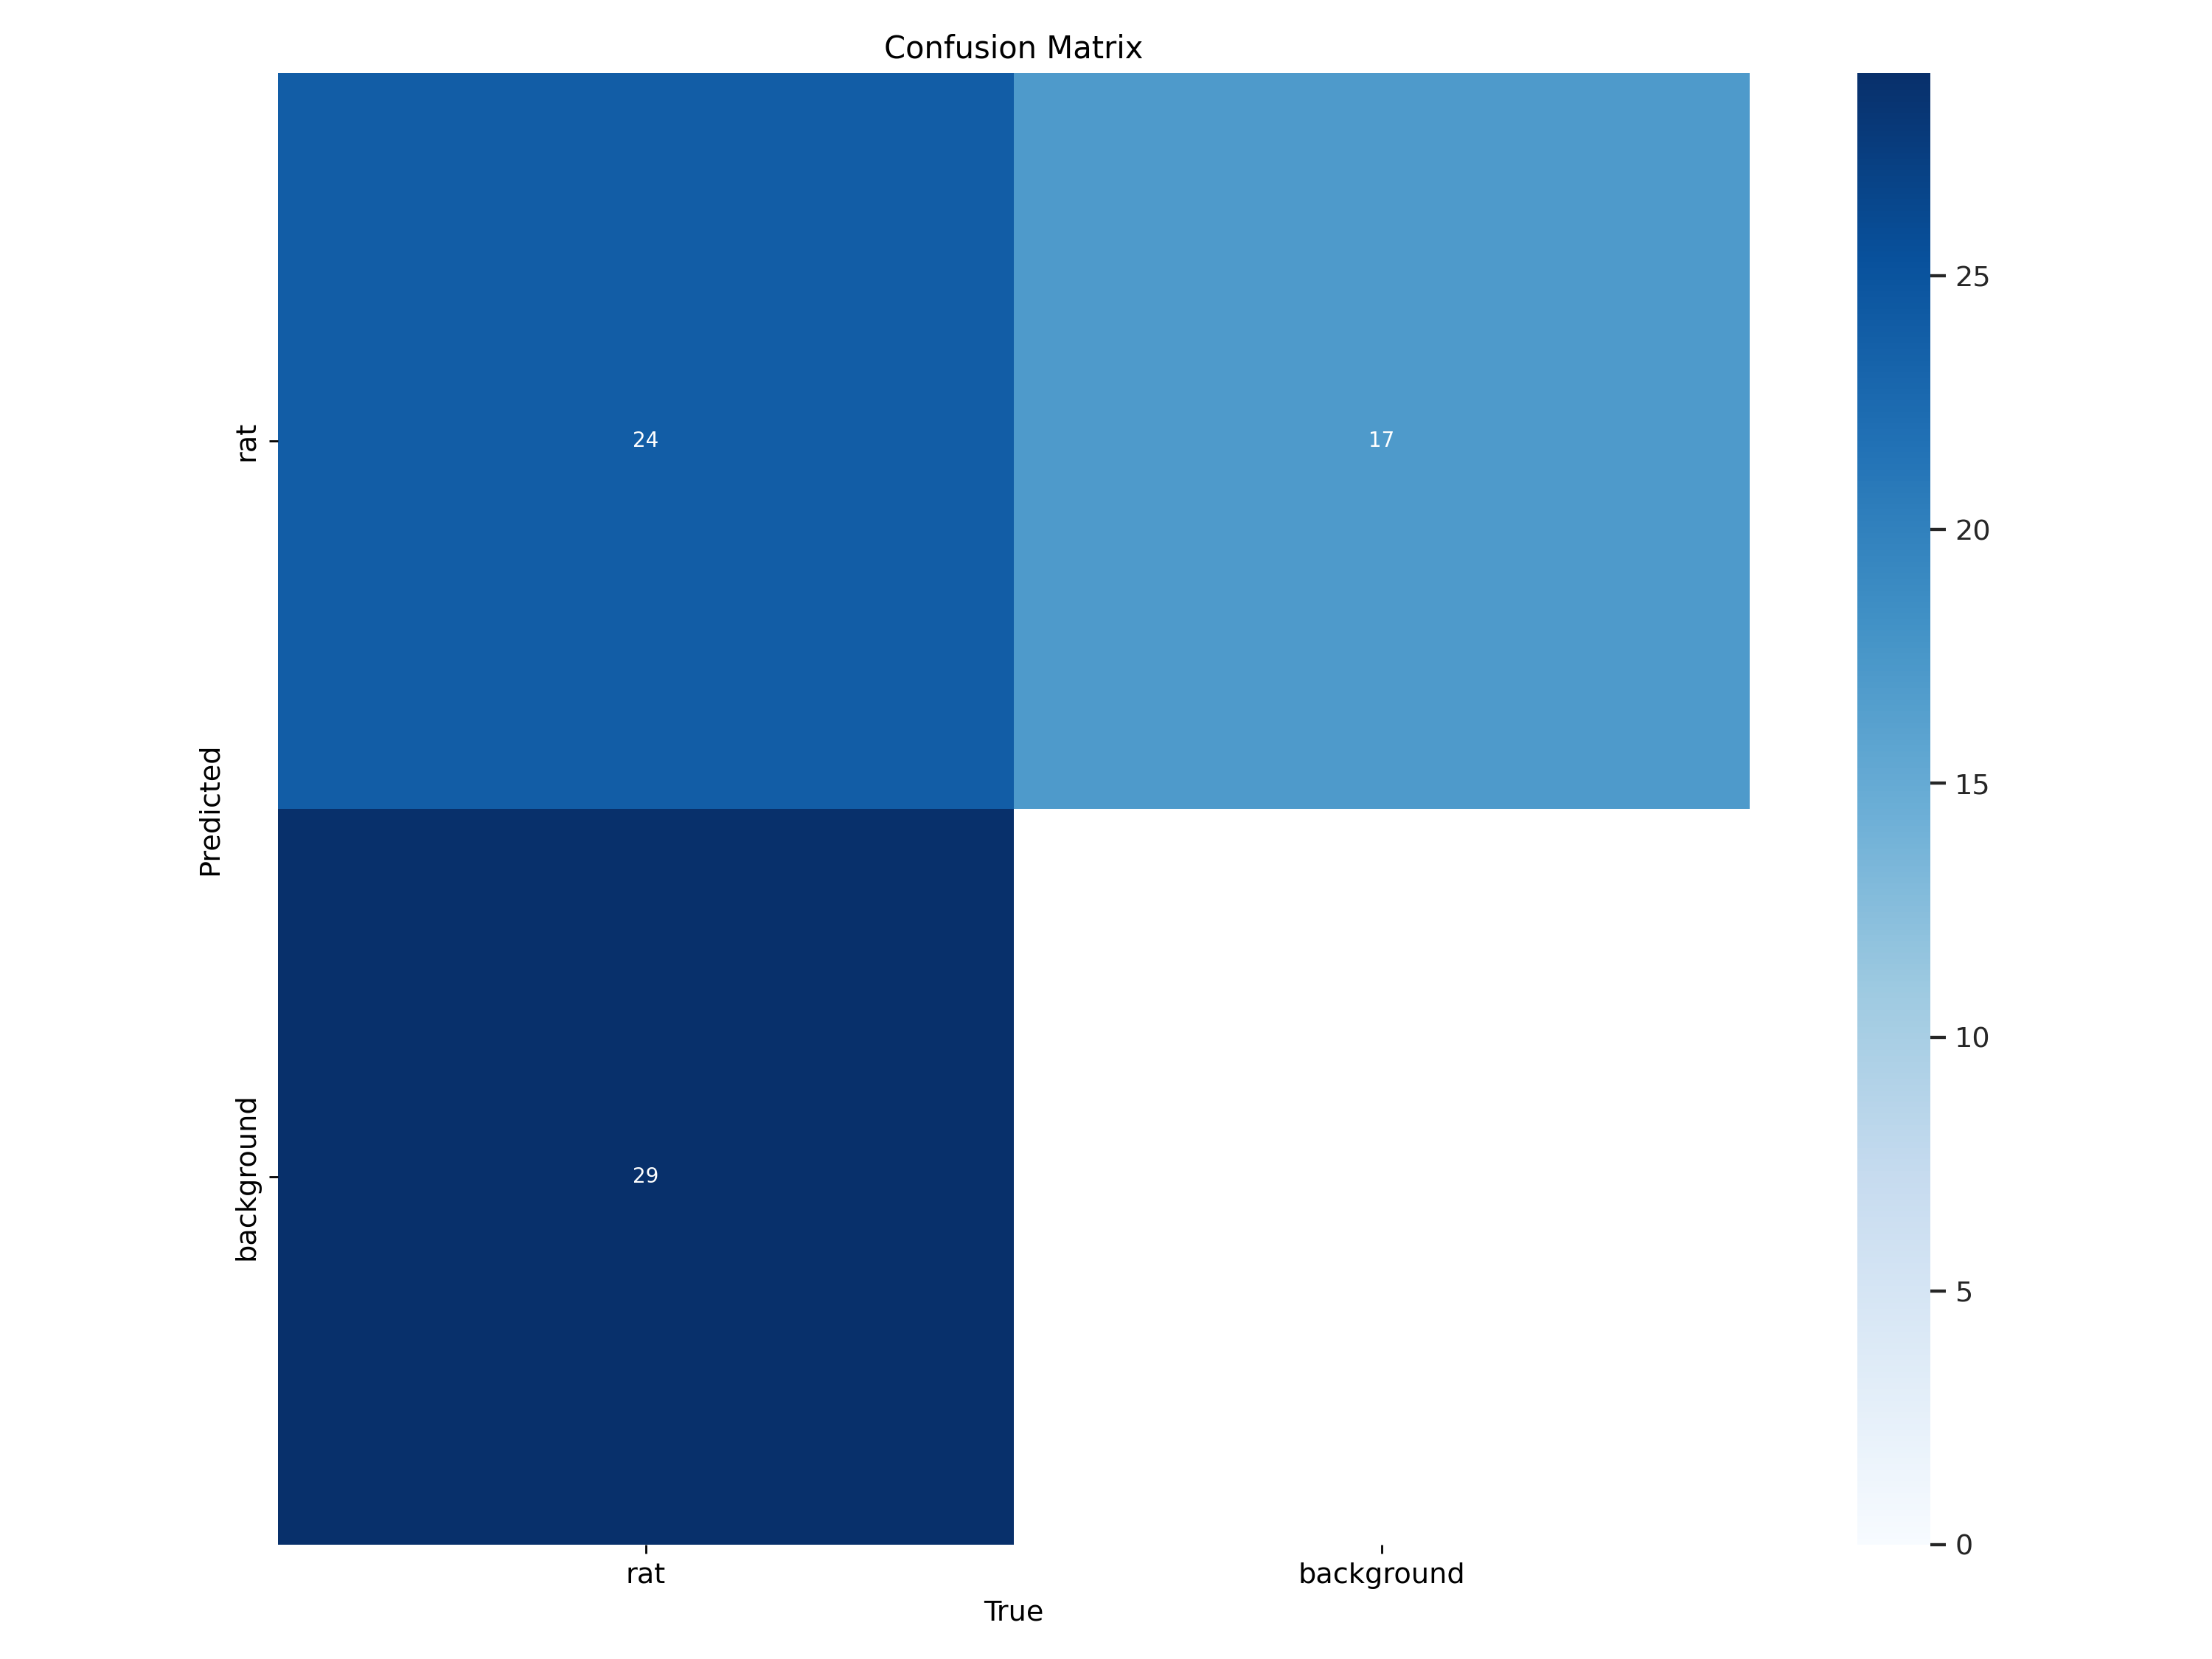

In [21]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'/content/runs/detect/yolov10_nano/confusion_matrix.png', width=600)

/content


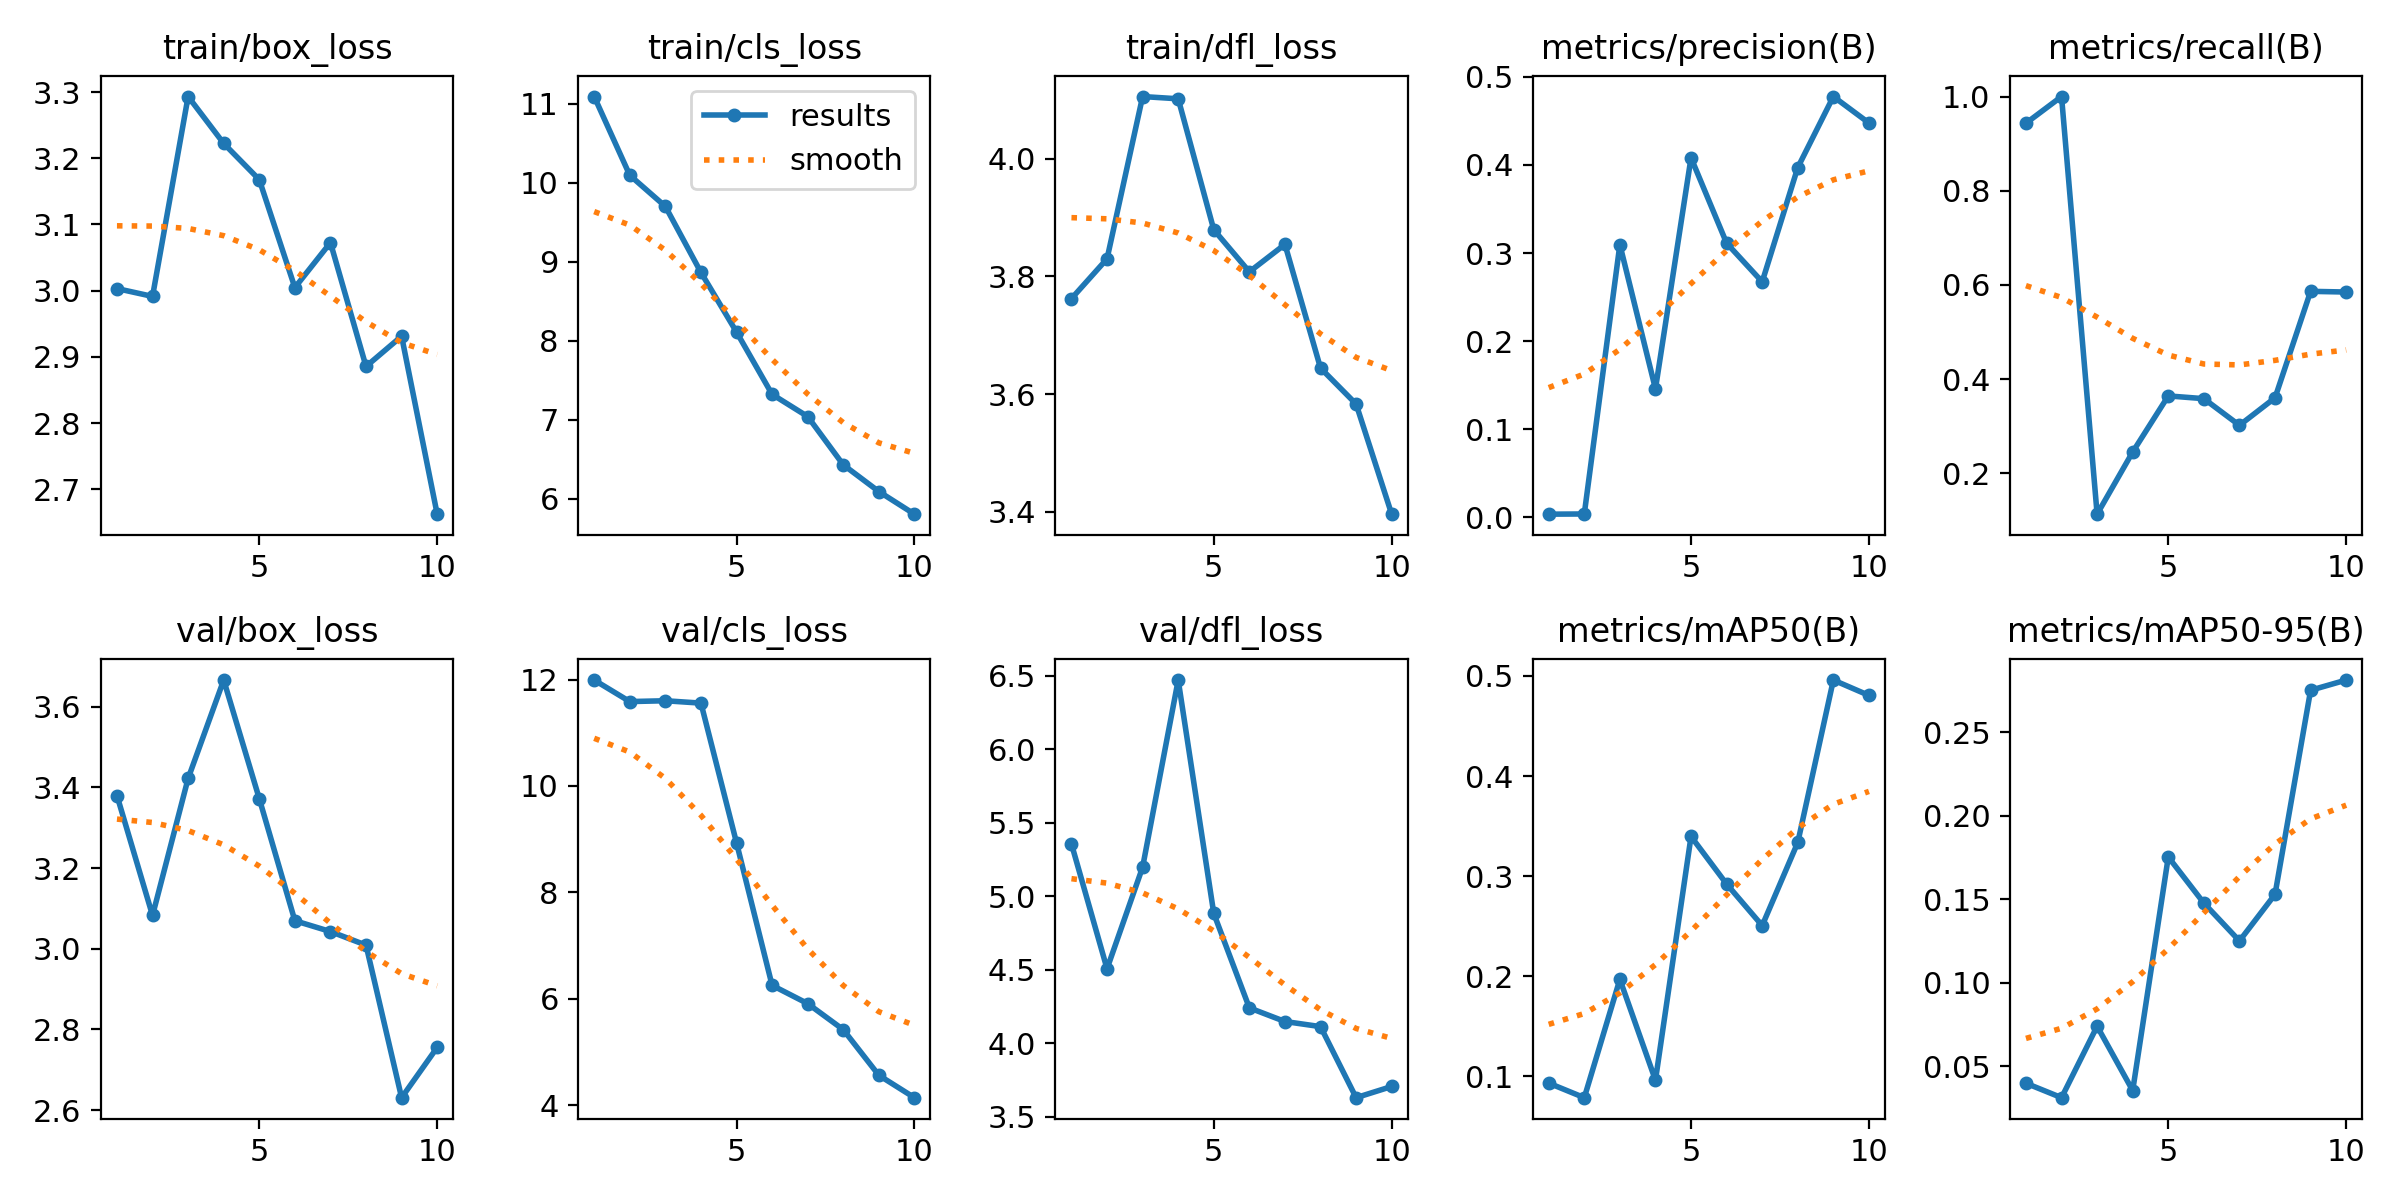

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{modelName}/results.png', width=600)

### Conclusions
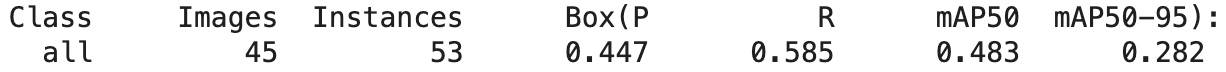

- The model correctly predicts 44.7% of bounding boxes and detects 58.5% of actual objects. The mAP50 score of 48.3% indicates moderate detection accuracy, while mAP50-95 at 28.2% suggests struggles with high-precision localization.
- Training and validation losses are decreasing, but validation loss is noticeably higher than training loss, suggesting a potential underfitting issue where the model is not fully learning complex patterns in the data.
- We will increase the training epochs, and experiment with a more advanced model (e.g., a larger YOLO version) to improve both precision and recall.

## YOLOv10 Nano - Epochs = 100

/content
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/datasets/ratsDetectionV3-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=yolov10_nano_100, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

train: Scanning /content/datasets/ratsDetectionV3-3/train/labels.cache... 353 images, 6 backgrounds, 0 corrupt: 100%|██████████| 353/353 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/ratsDetectionV3-3/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov10_nano_100/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov10_nano_100
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.12G      2.798      7.919      3.374          5        640: 100%|██████████| 23/23 [00:09<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         45         53    0.00378      0.962       0.12     0.0536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.05G      2.921      7.496      3.562          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         45         53    0.00267      0.679     0.0225     0.0068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.04G      3.143      6.868      3.728          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         45         53      0.089     0.0755     0.0452      0.012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.08G      3.198      6.322      3.714          5        640: 100%|██████████| 23/23 [00:08<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         45         53       0.18      0.113     0.0763     0.0206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.04G      3.329       6.14      3.732          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         45         53      0.184     0.0851     0.0589     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.04G      3.294      6.135      3.698          0        640: 100%|██████████| 23/23 [00:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         45         53   0.000108     0.0189   5.71e-05   1.71e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.05G      3.368      5.685      3.831          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         45         53     0.0364     0.0189    0.00992    0.00205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.04G      3.083       5.51      3.537          0        640: 100%|██████████| 23/23 [00:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         45         53      0.107      0.195     0.0665     0.0372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.06G      3.182      4.985      3.642          9        640: 100%|██████████| 23/23 [00:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         45         53      0.236      0.377      0.201     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.06G      3.306      4.941      3.672          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         45         53      0.306      0.208      0.189     0.0883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.07G      3.284      4.814      3.634          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         45         53      0.279       0.34      0.197     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.06G      3.308       4.67      3.695          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         45         53       0.38      0.264       0.23      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.06G      3.228      4.405      3.583          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         45         53      0.316      0.415      0.277      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.09G      3.292      4.433      3.646          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         45         53      0.402      0.419      0.315     0.0996



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.08G      3.234      4.336      3.534          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         45         53      0.285       0.34      0.264      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.06G      3.152       4.33      3.558          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.23it/s]

                   all         45         53      0.223      0.321       0.18     0.0613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.04G      3.217       3.99       3.63          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         45         53      0.307      0.453      0.266      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.04G      3.249      4.112       3.59          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         45         53      0.566      0.453      0.463      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.03G      3.056      3.878      3.434          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         45         53      0.392      0.365      0.293      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.09G      3.169      4.112      3.472          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         45         53       0.48      0.453        0.4      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.06G      3.074      3.669      3.414          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all         45         53      0.351      0.398      0.344      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.06G      2.994       3.68      3.373          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         45         53      0.481      0.611       0.45       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.07G          3      3.741      3.386          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         45         53      0.516      0.623      0.567      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.09G      3.007      3.507       3.43          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         45         53      0.621      0.434      0.493      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.06G      3.043      3.519      3.382          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         45         53      0.513      0.604      0.586      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.09G      2.952      3.478      3.332          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         45         53       0.59      0.543      0.524      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.05G      2.865      3.351      3.306          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         45         53      0.536      0.501      0.492      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.04G      2.882      3.355      3.284          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         45         53       0.48      0.528      0.498      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.06G      2.904      3.306      3.314          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         45         53      0.467      0.645      0.592      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.05G      2.975      3.552      3.336          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         45         53      0.579      0.623      0.604      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.05G      2.785       3.29      3.232          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         45         53      0.648      0.698      0.629      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.08G      2.769      3.455      3.223          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         45         53      0.585      0.698      0.657      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.08G      2.934      3.304      3.255          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         45         53      0.624      0.623       0.65      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.04G      2.715      3.376       3.17          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         45         53       0.55      0.623      0.639      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.08G      2.776      3.129      3.198          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         45         53      0.623      0.405      0.546      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.06G      2.792      3.264      3.194          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         45         53      0.651      0.547      0.605      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.04G      2.702       2.97       3.14          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         45         53      0.478      0.621      0.449       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.08G        2.7      3.018      3.126          6        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         45         53      0.826      0.537      0.712      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.05G      2.749      3.025      3.227          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         45         53      0.466      0.547      0.547      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.06G      2.694      2.961      3.113          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         45         53      0.632      0.642      0.632      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.06G      2.755      3.078      3.187          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         45         53      0.583      0.713      0.661      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.06G      2.721       3.08      3.165         12        640: 100%|██████████| 23/23 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         45         53      0.739      0.585      0.662      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.05G      2.601      2.878      3.065         14        640: 100%|██████████| 23/23 [00:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         45         53      0.667      0.717      0.748      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.08G      2.628      2.839      3.097          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         45         53      0.627      0.679      0.666      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.04G      2.605      2.814      3.037          7        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         45         53      0.691      0.528      0.623      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.08G      2.642      2.873       3.07          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         45         53       0.69      0.714      0.683      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.07G      2.624      2.729      3.085          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         45         53      0.657      0.698      0.726      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.06G      2.547      2.796      3.104          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         45         53       0.71      0.717      0.719      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.09G      2.494      2.728      3.064          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         45         53      0.628      0.796      0.787      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.06G      2.528      3.081       2.95          0        640: 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         45         53      0.657      0.736      0.631      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.05G      2.659      2.571      3.098          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         45         53      0.775      0.623      0.694      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.08G      2.625      3.253      3.141          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         45         53      0.705      0.812      0.808      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.09G      2.533      2.584      3.003          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         45         53      0.798      0.736      0.789      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.06G      2.489      2.498      2.919          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         45         53      0.673       0.74      0.743      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.03G      2.562      2.588      3.153          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         45         53      0.814      0.743      0.792      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.06G      2.504      2.641      3.012          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         45         53       0.73      0.604      0.641      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.06G      2.504       2.46      2.989          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         45         53      0.776      0.588      0.752      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.06G      2.416      2.447      2.929          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         45         53       0.76      0.717      0.746      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.05G      2.544       2.58      3.018          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         45         53      0.558      0.668      0.654      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.06G      2.496      2.426      2.964          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         45         53      0.739      0.755      0.767      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.04G      2.473      2.555      2.954          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         45         53      0.676      0.749      0.725      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.09G      2.339      2.501      2.905          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         45         53      0.714      0.736       0.77      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.05G      2.402      2.412      2.928          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         45         53       0.67      0.774      0.732      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.04G      2.315      2.218      2.843          4        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all         45         53      0.714       0.66        0.7      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.07G      2.292      2.415      2.823          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         45         53      0.638      0.811      0.725       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.08G      2.313      2.372      2.856          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         45         53      0.682      0.768      0.741      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.05G      2.391      2.394      2.951          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         45         53      0.761      0.792      0.772      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.06G      2.275      2.331      2.803          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         45         53      0.785       0.66       0.76      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.06G      2.258      2.274      2.773          4        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         45         53      0.692      0.792      0.791      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.05G      2.217      2.195      2.796          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         45         53      0.809      0.736      0.792      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.05G      2.194      2.227      2.789          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         45         53      0.729      0.717       0.74      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.06G      2.232      2.202      2.796          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]

                   all         45         53      0.726      0.717      0.733      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.05G      2.351      2.219      3.064          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         45         53      0.736      0.698      0.708       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.04G      2.245      2.298      2.794          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         45         53      0.666      0.792      0.686      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.05G      2.326      2.225      2.854          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         45         53      0.618      0.702      0.687      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.06G      2.171      2.095      2.723          4        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         45         53      0.779      0.731      0.769      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.06G      2.168      2.123      2.716          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         45         53      0.776      0.786      0.757      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.06G      2.145      2.073      2.734          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         45         53      0.828      0.634      0.755      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.05G      2.243      2.152      2.763          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         45         53      0.814      0.745      0.819      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.06G      2.164      2.092      2.708         11        640: 100%|██████████| 23/23 [00:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.26it/s]

                   all         45         53      0.815      0.774      0.854      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.06G      2.259      2.182      2.769          6        640: 100%|██████████| 23/23 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         45         53      0.815      0.849      0.852      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.06G      2.096      1.985      2.684          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         45         53      0.831       0.74      0.756      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.03G      2.114       2.04      2.687          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         45         53      0.792      0.679      0.744      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.08G          2      2.009      2.683          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         45         53      0.752      0.774      0.812      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.06G      2.126      2.016      2.699          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         45         53      0.832      0.774      0.819      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.06G      2.106      1.979       2.77          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         45         53      0.796      0.809      0.821      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.03G      2.038      2.016      2.671          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         45         53      0.813      0.737      0.823      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.06G      2.083      1.996      2.684          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         45         53      0.768      0.698      0.759      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.06G      2.189      2.119       2.77          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         45         53      0.852      0.763      0.829       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.06G      2.171      1.999       2.79          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

                   all         45         53      0.806      0.736      0.769      0.465


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.06G      1.976      1.905      2.765          1        640: 100%|██████████| 23/23 [00:09<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         45         53      0.799      0.774      0.761      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.04G      1.792      1.585       2.58          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         45         53      0.715      0.698      0.713      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.07G      1.736      1.535      2.552          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         45         53      0.802      0.774      0.786      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.04G      1.754      1.547      2.626          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]

                   all         45         53      0.889      0.679      0.782      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.05G      1.768      1.481      2.589          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         45         53       0.72      0.755      0.737      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.06G      1.755      1.512      2.512          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         45         53      0.662      0.792      0.715      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.04G      1.862      1.552      2.685          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         45         53      0.752      0.744      0.765      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.06G      1.922      1.428      2.809          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.51it/s]

                   all         45         53      0.698      0.828      0.769      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.03G      1.813      1.496      2.662          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         45         53      0.768      0.736      0.761      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.04G      1.775      1.458      2.585          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         45         53      0.765      0.736      0.757      0.468



100 epochs completed in 0.259 hours.
Optimizer stripped from runs/detect/yolov10_nano_100/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/yolov10_nano_100/weights/best.pt, 5.8MB

Validating runs/detect/yolov10_nano_100/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]


                   all         45         53      0.804      0.774      0.853      0.502
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/yolov10_nano_100
/content
/content


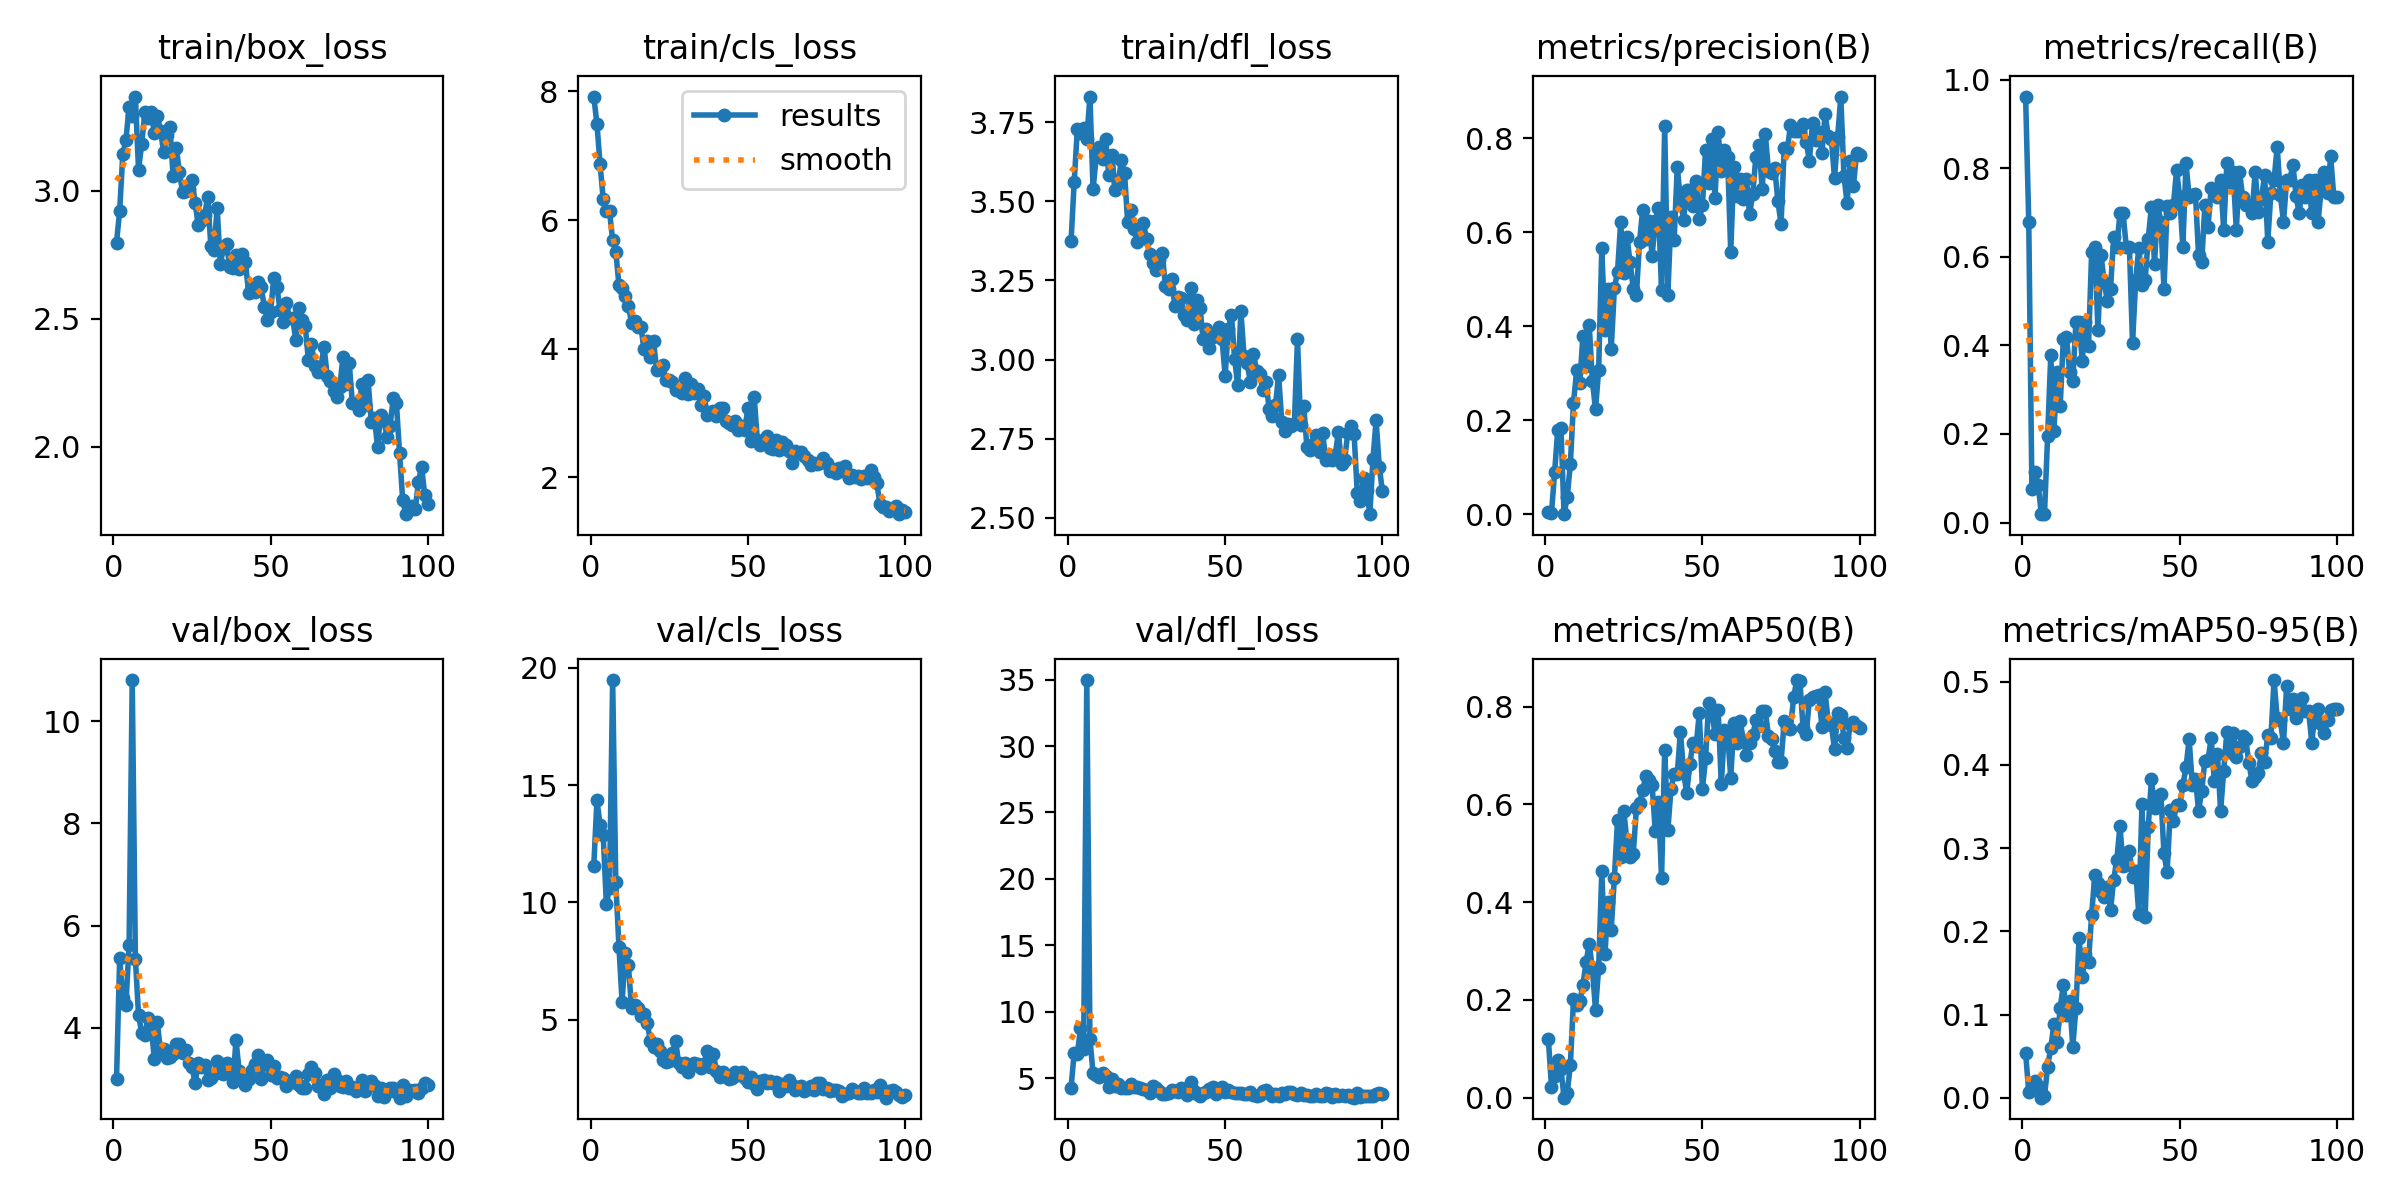

In [25]:
%cd {HOME}

# Load a model
model = YOLO("yolov10n.pt")
modelName="yolov10_nano_100"

# Train the model
results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640, project="runs/detect", name=modelName)


/content


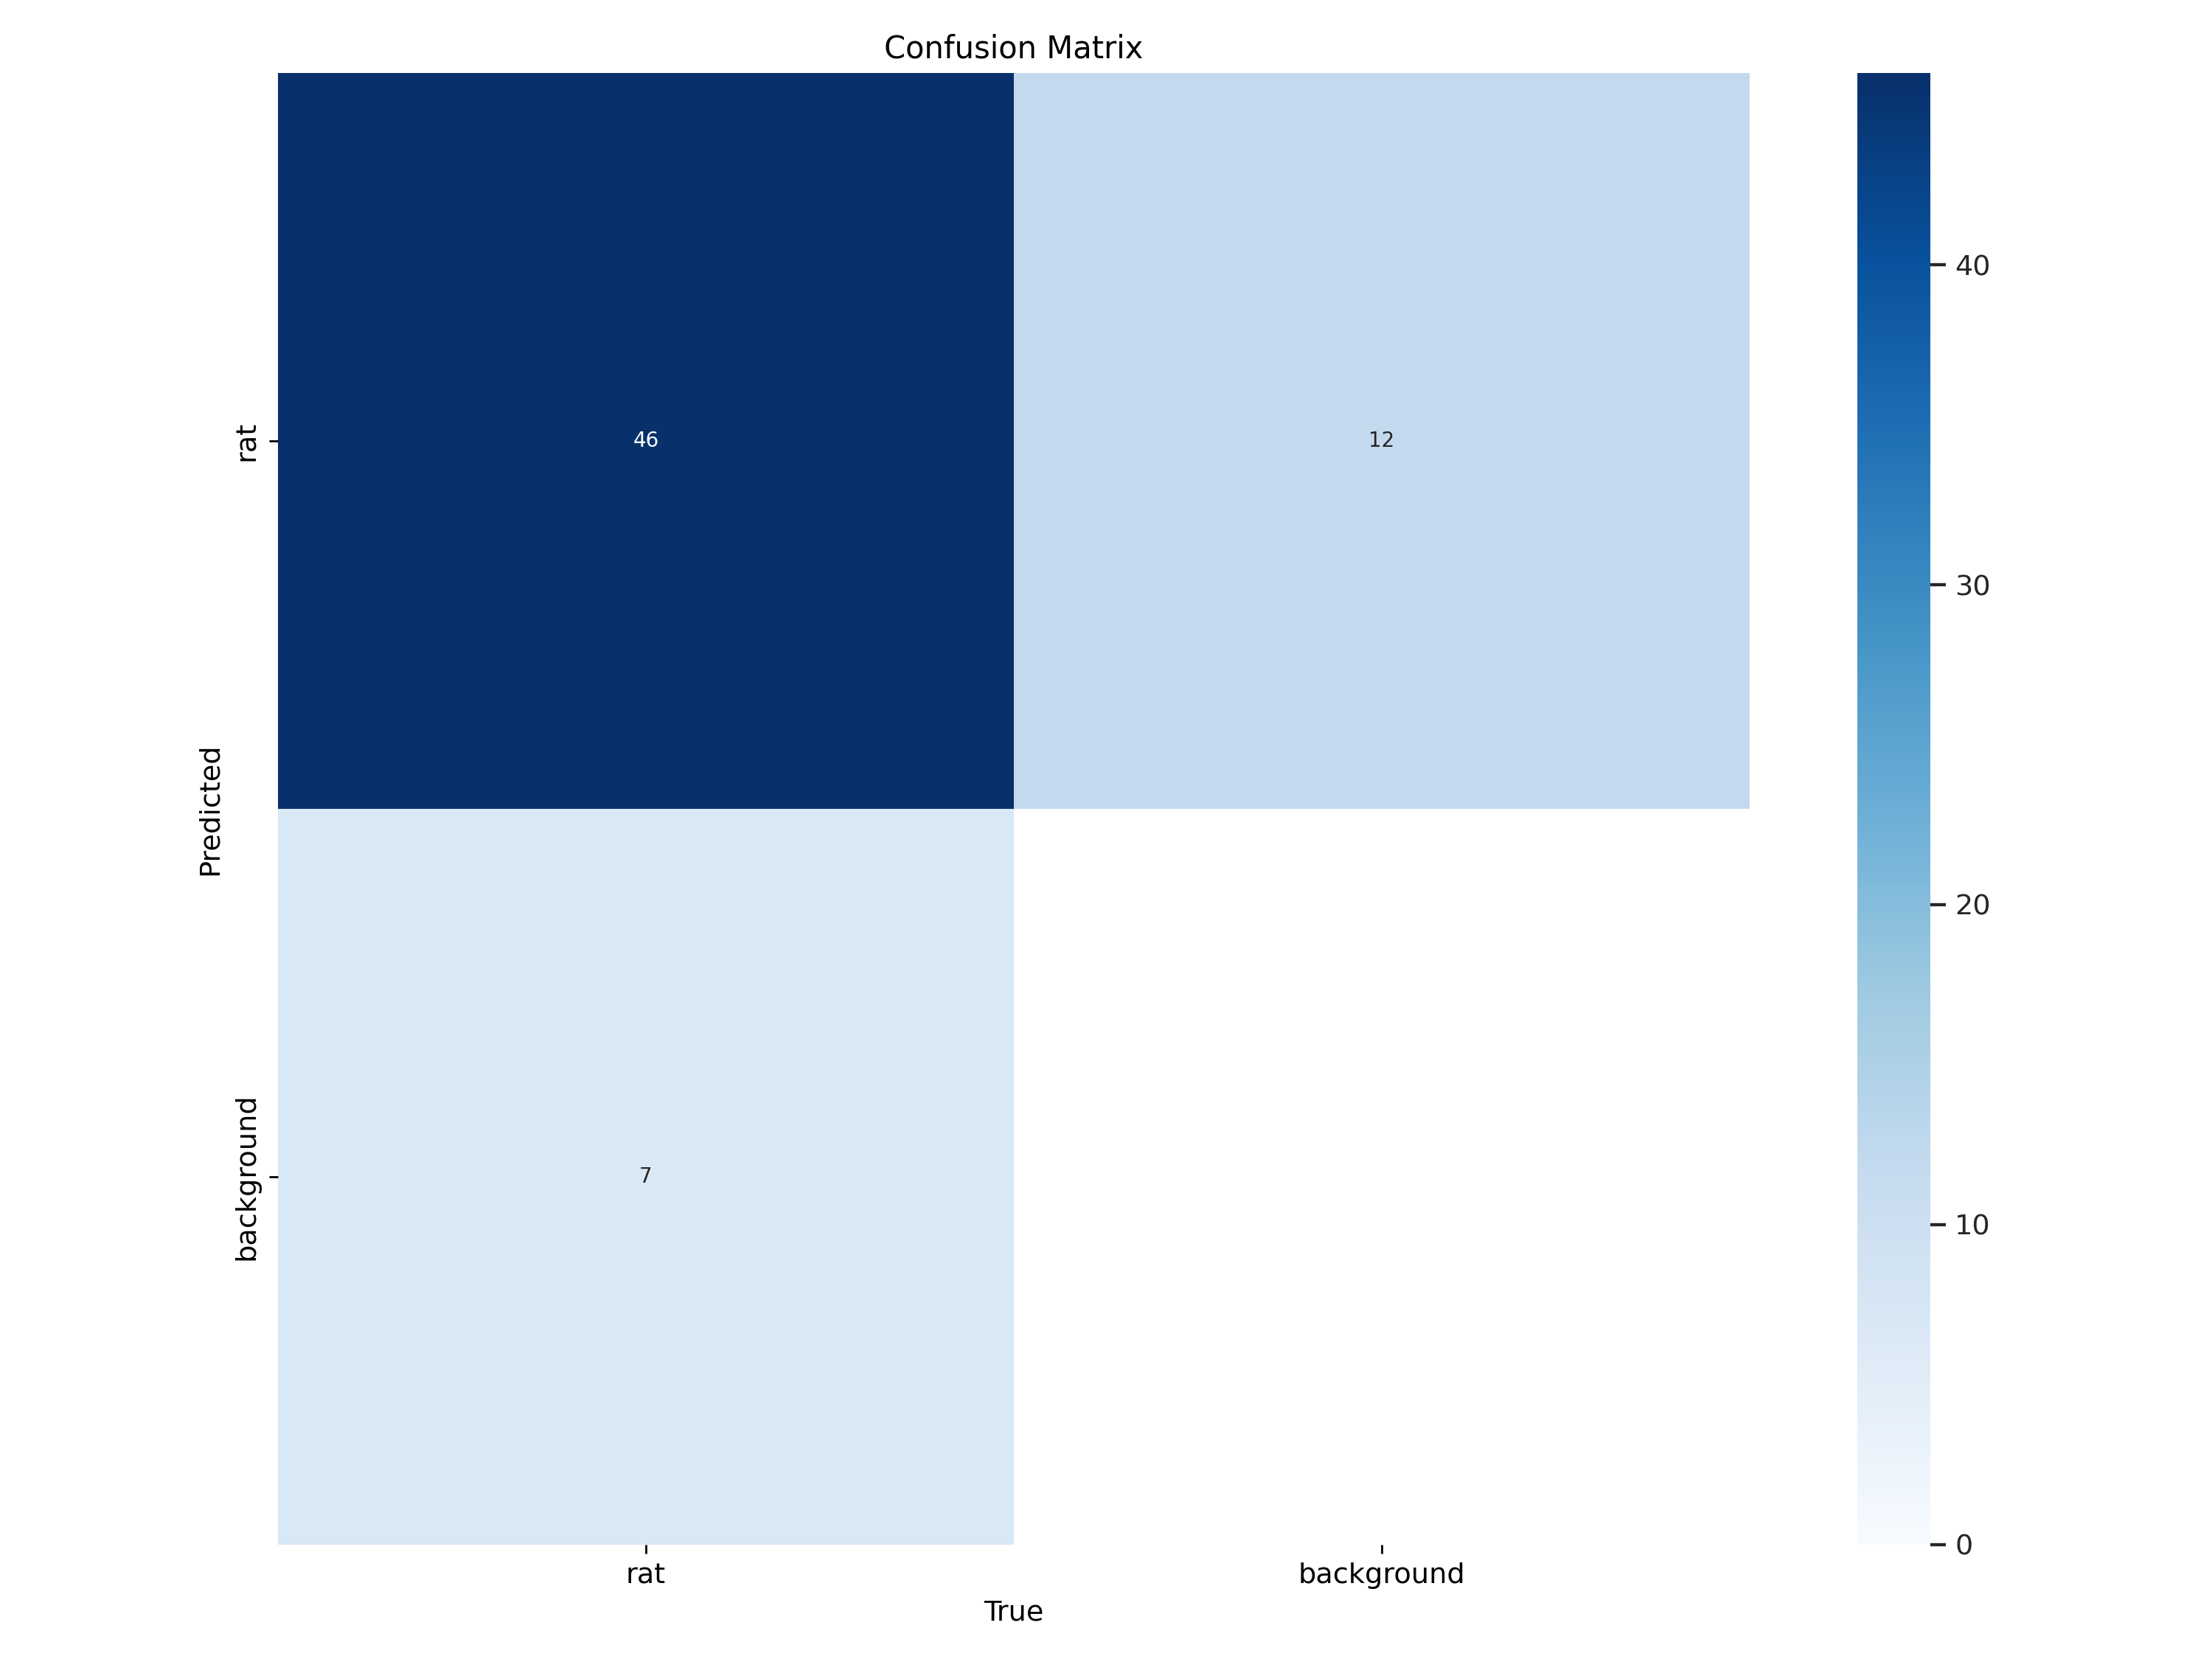

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{modelName}/confusion_matrix.png', width=600)

/content


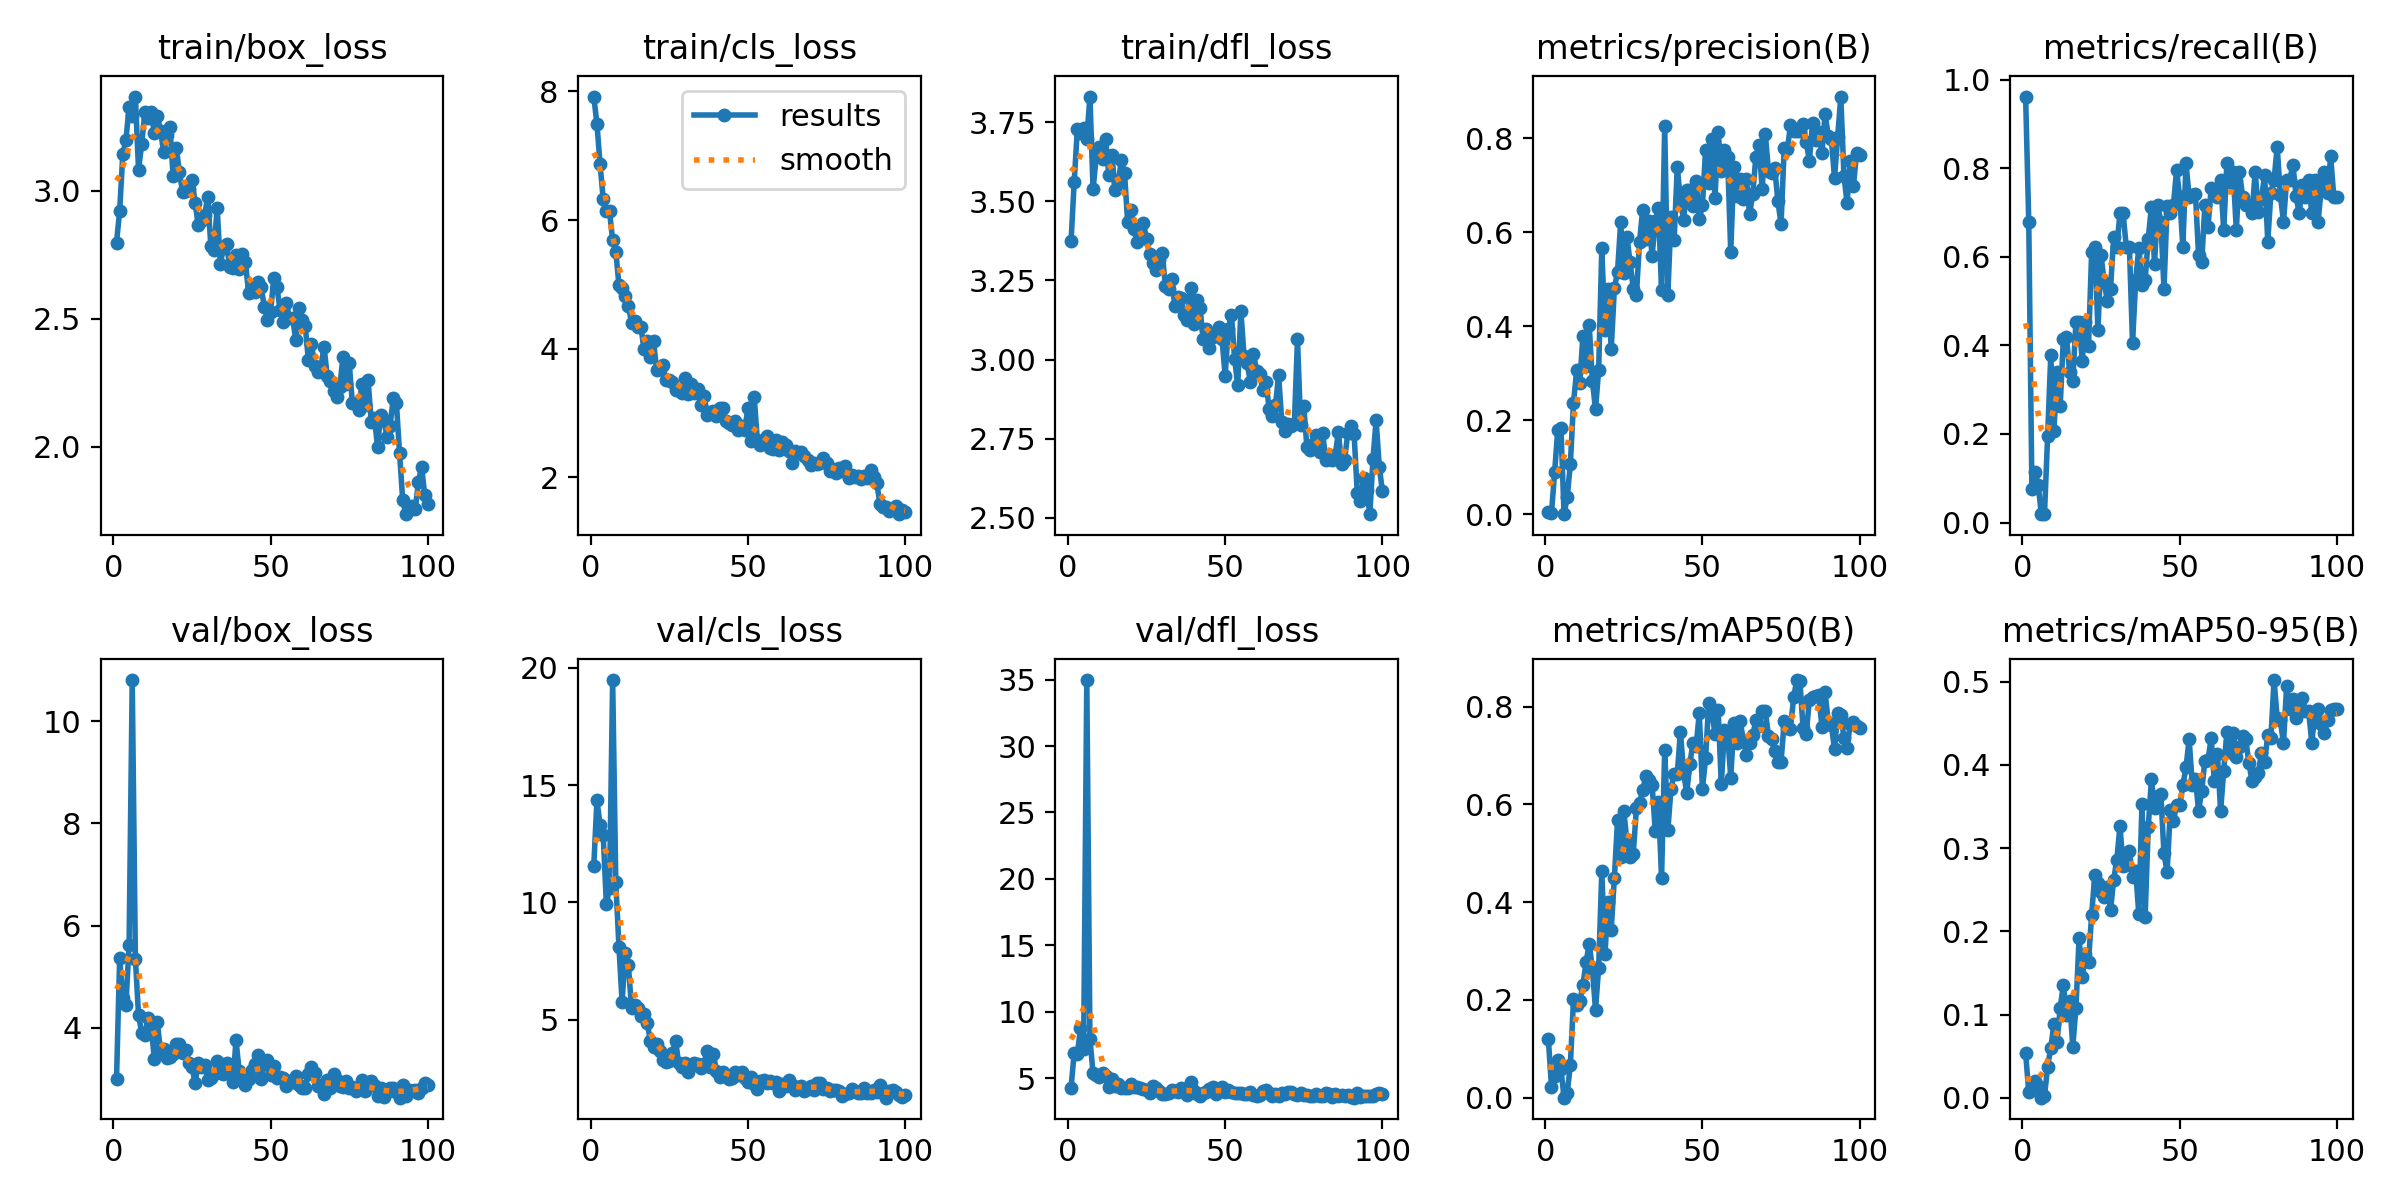

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{modelName}/results.png', width=600)

### Conclusions

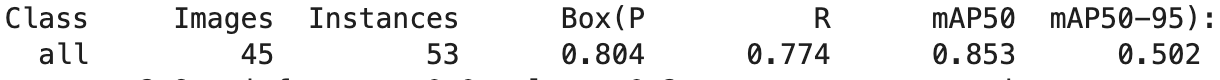
- Increasing the numbers of epochs from 10 to 100 improve the performance, from the graph we can see that 80.4% of the predicted bounding boxes are correct, 77.4% of the actual objects were detected, the model achieves 85.3% accuracy for IoU ≥ 0.5, indicating strong detection capability, but has room for improvement in detecting more precise bounding boxes.
- Good Results: The model is learning well, as training and validation losses are decreasing, and precision, recall, and mAP are steadily improving.
- No Significant Overfitting: Training and validation losses follow a similar downward trend, meaning the model generalizes well.
- The model is still improving as training loss decreases and precision, recall, and mAP continue to rise. Increasing the epochs could help given the model has not fully converged yet but is getting close.

## YOLOv10 Nano - Epochs = 100 - lr = 0.001

In [51]:
%cd {HOME}

# Load a model
model = YOLO("yolov10n.pt")
modelName="yolov10_nano_100"

# Train the model
results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640, project="runs/detect", name=modelName, lr0=0.001)


/content
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/datasets/ratsDetectionV3-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=yolov10_nano_1002, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

train: Scanning /content/datasets/ratsDetectionV3-3/train/labels.cache... 353 images, 6 backgrounds, 0 corrupt: 100%|██████████| 353/353 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/ratsDetectionV3-3/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov10_nano_1002/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov10_nano_1002
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.27G      2.798      7.919      3.374          5        640: 100%|██████████| 23/23 [00:10<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         45         53    0.00378      0.962       0.12     0.0536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       3.4G      2.921      7.496      3.562          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         45         53    0.00267      0.679     0.0225     0.0068



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.39G      3.143      6.868      3.728          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         45         53      0.089     0.0755     0.0452      0.012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.42G      3.198      6.322      3.714          5        640: 100%|██████████| 23/23 [00:09<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         45         53       0.18      0.113     0.0763     0.0206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.39G      3.329       6.14      3.732          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         45         53      0.184     0.0851     0.0589     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.39G      3.294      6.135      3.698          0        640: 100%|██████████| 23/23 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         45         53   0.000108     0.0189   5.71e-05   1.71e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       3.4G      3.368      5.685      3.831          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         45         53     0.0364     0.0189    0.00992    0.00205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.39G      3.083       5.51      3.537          0        640: 100%|██████████| 23/23 [00:09<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         45         53      0.107      0.195     0.0665     0.0372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.41G      3.182      4.985      3.642          9        640: 100%|██████████| 23/23 [00:08<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         45         53      0.236      0.377      0.201     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.41G      3.306      4.941      3.672          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         45         53      0.306      0.208      0.189     0.0883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.41G      3.284      4.814      3.634          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         45         53      0.279       0.34      0.197     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.41G      3.308       4.67      3.695          6        640: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         45         53       0.38      0.264       0.23      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.41G      3.228      4.405      3.583          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         45         53      0.316      0.415      0.277      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.44G      3.292      4.433      3.646          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         45         53      0.402      0.419      0.315     0.0996



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.43G      3.234      4.336      3.534          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         45         53      0.285       0.34      0.264      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.41G      3.152       4.33      3.558          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         45         53      0.223      0.321       0.18     0.0613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.39G      3.217       3.99       3.63          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         45         53      0.307      0.453      0.266      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.39G      3.249      4.112       3.59          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         45         53      0.566      0.453      0.463      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.38G      3.056      3.878      3.434          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         45         53      0.392      0.365      0.293      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.44G      3.169      4.112      3.472          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         45         53       0.48      0.453        0.4      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       3.4G      3.074      3.669      3.414          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         45         53      0.351      0.398      0.344      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.41G      2.994       3.68      3.373          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         45         53      0.481      0.611       0.45       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.41G          3      3.741      3.386          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         45         53      0.516      0.623      0.567      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.44G      3.007      3.507       3.43          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         45         53      0.621      0.434      0.493      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       3.4G      3.043      3.519      3.382          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         45         53      0.513      0.604      0.586      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.44G      2.952      3.478      3.332          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         45         53       0.59      0.543      0.524      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       3.4G      2.865      3.351      3.306          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         45         53      0.536      0.501      0.492      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.39G      2.882      3.355      3.284          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         45         53       0.48      0.528      0.498      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.41G      2.904      3.306      3.314          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         45         53      0.467      0.645      0.592      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       3.4G      2.975      3.552      3.336          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         45         53      0.579      0.623      0.604      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       3.4G      2.785       3.29      3.232          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         45         53      0.648      0.698      0.629      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.44G      2.769      3.455      3.223          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         45         53      0.585      0.698      0.657      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.41G      2.934      3.304      3.255          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

                   all         45         53      0.624      0.623       0.65      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.39G      2.715      3.376       3.17          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         45         53       0.55      0.623      0.639      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.43G      2.776      3.129      3.198          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         45         53      0.623      0.405      0.546      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.41G      2.792      3.264      3.194          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         45         53      0.651      0.547      0.605      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.39G      2.702       2.97       3.14          5        640: 100%|██████████| 23/23 [00:08<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         45         53      0.478      0.621      0.449       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.42G        2.7      3.018      3.126          6        640: 100%|██████████| 23/23 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         45         53      0.826      0.537      0.712      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       3.4G      2.749      3.025      3.227          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         45         53      0.466      0.547      0.547      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.41G      2.694      2.961      3.113          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         45         53      0.632      0.642      0.632      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       3.4G      2.755      3.078      3.187          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         45         53      0.583      0.713      0.661      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.41G      2.721       3.08      3.165         12        640: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         45         53      0.739      0.585      0.662      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       3.4G      2.601      2.878      3.065         14        640: 100%|██████████| 23/23 [00:07<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         45         53      0.667      0.717      0.748      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.41G      2.628      2.839      3.097          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         45         53      0.627      0.679      0.666      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.39G      2.605      2.814      3.037          7        640: 100%|██████████| 23/23 [00:08<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         45         53      0.691      0.528      0.623      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.41G      2.642      2.873       3.07          3        640: 100%|██████████| 23/23 [00:08<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         45         53       0.69      0.714      0.683      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       3.4G      2.624      2.729      3.085          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         45         53      0.657      0.698      0.726      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.41G      2.547      2.796      3.104          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         45         53       0.71      0.717      0.719      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.44G      2.494      2.728      3.064          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         45         53      0.628      0.796      0.787      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.41G      2.528      3.081       2.95          0        640: 100%|██████████| 23/23 [00:08<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         45         53      0.657      0.736      0.631      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       3.4G      2.659      2.571      3.098          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         45         53      0.775      0.623      0.694      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.41G      2.625      3.253      3.141          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all         45         53      0.705      0.812      0.808      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.44G      2.533      2.584      3.003          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         45         53      0.798      0.736      0.789      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.41G      2.489      2.498      2.919          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         45         53      0.673       0.74      0.743      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.38G      2.562      2.588      3.153          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         45         53      0.814      0.743      0.792      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.41G      2.504      2.641      3.012          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         45         53       0.73      0.604      0.641      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.41G      2.504       2.46      2.989          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         45         53      0.776      0.588      0.752      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.41G      2.416      2.447      2.929          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         45         53       0.76      0.717      0.746      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       3.4G      2.544       2.58      3.018          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         45         53      0.558      0.668      0.654      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.41G      2.496      2.426      2.964          1        640: 100%|██████████| 23/23 [00:09<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         45         53      0.739      0.755      0.767      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.39G      2.473      2.555      2.954          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         45         53      0.676      0.749      0.725      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.44G      2.339      2.501      2.905          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         45         53      0.714      0.736       0.77      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       3.4G      2.402      2.412      2.928          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         45         53       0.67      0.774      0.732      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.39G      2.315      2.218      2.843          4        640: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all         45         53      0.714       0.66        0.7      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.41G      2.292      2.415      2.823          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         45         53      0.638      0.811      0.725       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.42G      2.313      2.372      2.856          5        640: 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         45         53      0.682      0.768      0.741      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       3.4G      2.391      2.394      2.951          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         45         53      0.761      0.792      0.772      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.41G      2.275      2.331      2.803          4        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         45         53      0.785       0.66       0.76      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       3.4G      2.258      2.274      2.773          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         45         53      0.692      0.792      0.791      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       3.4G      2.217      2.195      2.796          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         45         53      0.809      0.736      0.792      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       3.4G      2.194      2.227      2.789          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         45         53      0.729      0.717       0.74      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.41G      2.232      2.202      2.796          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         45         53      0.726      0.717      0.733      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       3.4G      2.351      2.219      3.064          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         45         53      0.736      0.698      0.708       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.39G      2.245      2.298      2.794          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         45         53      0.666      0.792      0.686      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       3.4G      2.326      2.225      2.854          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         45         53      0.618      0.702      0.687      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.41G      2.171      2.095      2.723          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all         45         53      0.779      0.731      0.769      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.41G      2.168      2.123      2.716          3        640: 100%|██████████| 23/23 [00:08<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         45         53      0.776      0.786      0.757      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.41G      2.145      2.073      2.734          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         45         53      0.828      0.634      0.755      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       3.4G      2.243      2.152      2.763          5        640: 100%|██████████| 23/23 [00:09<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         45         53      0.814      0.745      0.819      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.41G      2.164      2.092      2.708         11        640: 100%|██████████| 23/23 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]

                   all         45         53      0.815      0.774      0.854      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.41G      2.259      2.182      2.769          6        640: 100%|██████████| 23/23 [00:07<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         45         53      0.815      0.849      0.852      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.41G      2.096      1.985      2.684          4        640: 100%|██████████| 23/23 [00:09<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         45         53      0.831       0.74      0.756      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.38G      2.114       2.04      2.687          5        640: 100%|██████████| 23/23 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         45         53      0.792      0.679      0.744      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.44G          2      2.009      2.683          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         45         53      0.752      0.774      0.812      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.41G      2.126      2.016      2.699          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         45         53      0.832      0.774      0.819      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.41G      2.106      1.979       2.77          3        640: 100%|██████████| 23/23 [00:09<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         45         53      0.796      0.809      0.821      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.38G      2.038      2.016      2.671          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         45         53      0.813      0.737      0.823      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.41G      2.083      1.996      2.684          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]

                   all         45         53      0.768      0.698      0.759      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.41G      2.189      2.119       2.77          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         45         53      0.852      0.763      0.829       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.41G      2.171      1.999       2.79          6        640: 100%|██████████| 23/23 [00:08<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53      0.806      0.736      0.769      0.465


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.38G      1.976      1.905      2.765          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         45         53      0.799      0.774      0.761      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.39G      1.792      1.585       2.58          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         45         53      0.715      0.698      0.713      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.41G      1.736      1.535      2.552          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         45         53      0.802      0.774      0.786      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.39G      1.754      1.547      2.626          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         45         53      0.889      0.679      0.782      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       3.4G      1.768      1.481      2.589          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         45         53       0.72      0.755      0.737      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.41G      1.755      1.512      2.512          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all         45         53      0.662      0.792      0.715      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.39G      1.862      1.552      2.685          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         45         53      0.752      0.744      0.765      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.41G      1.922      1.428      2.809          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         45         53      0.698      0.828      0.769      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.38G      1.813      1.496      2.662          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         45         53      0.768      0.736      0.761      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.39G      1.775      1.458      2.585          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         45         53      0.765      0.736      0.757      0.468



100 epochs completed in 0.266 hours.
Optimizer stripped from runs/detect/yolov10_nano_1002/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/yolov10_nano_1002/weights/best.pt, 5.8MB

Validating runs/detect/yolov10_nano_1002/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]


                   all         45         53      0.804      0.774      0.853      0.502
Speed: 0.2ms preprocess, 5.4ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/yolov10_nano_1002


/content


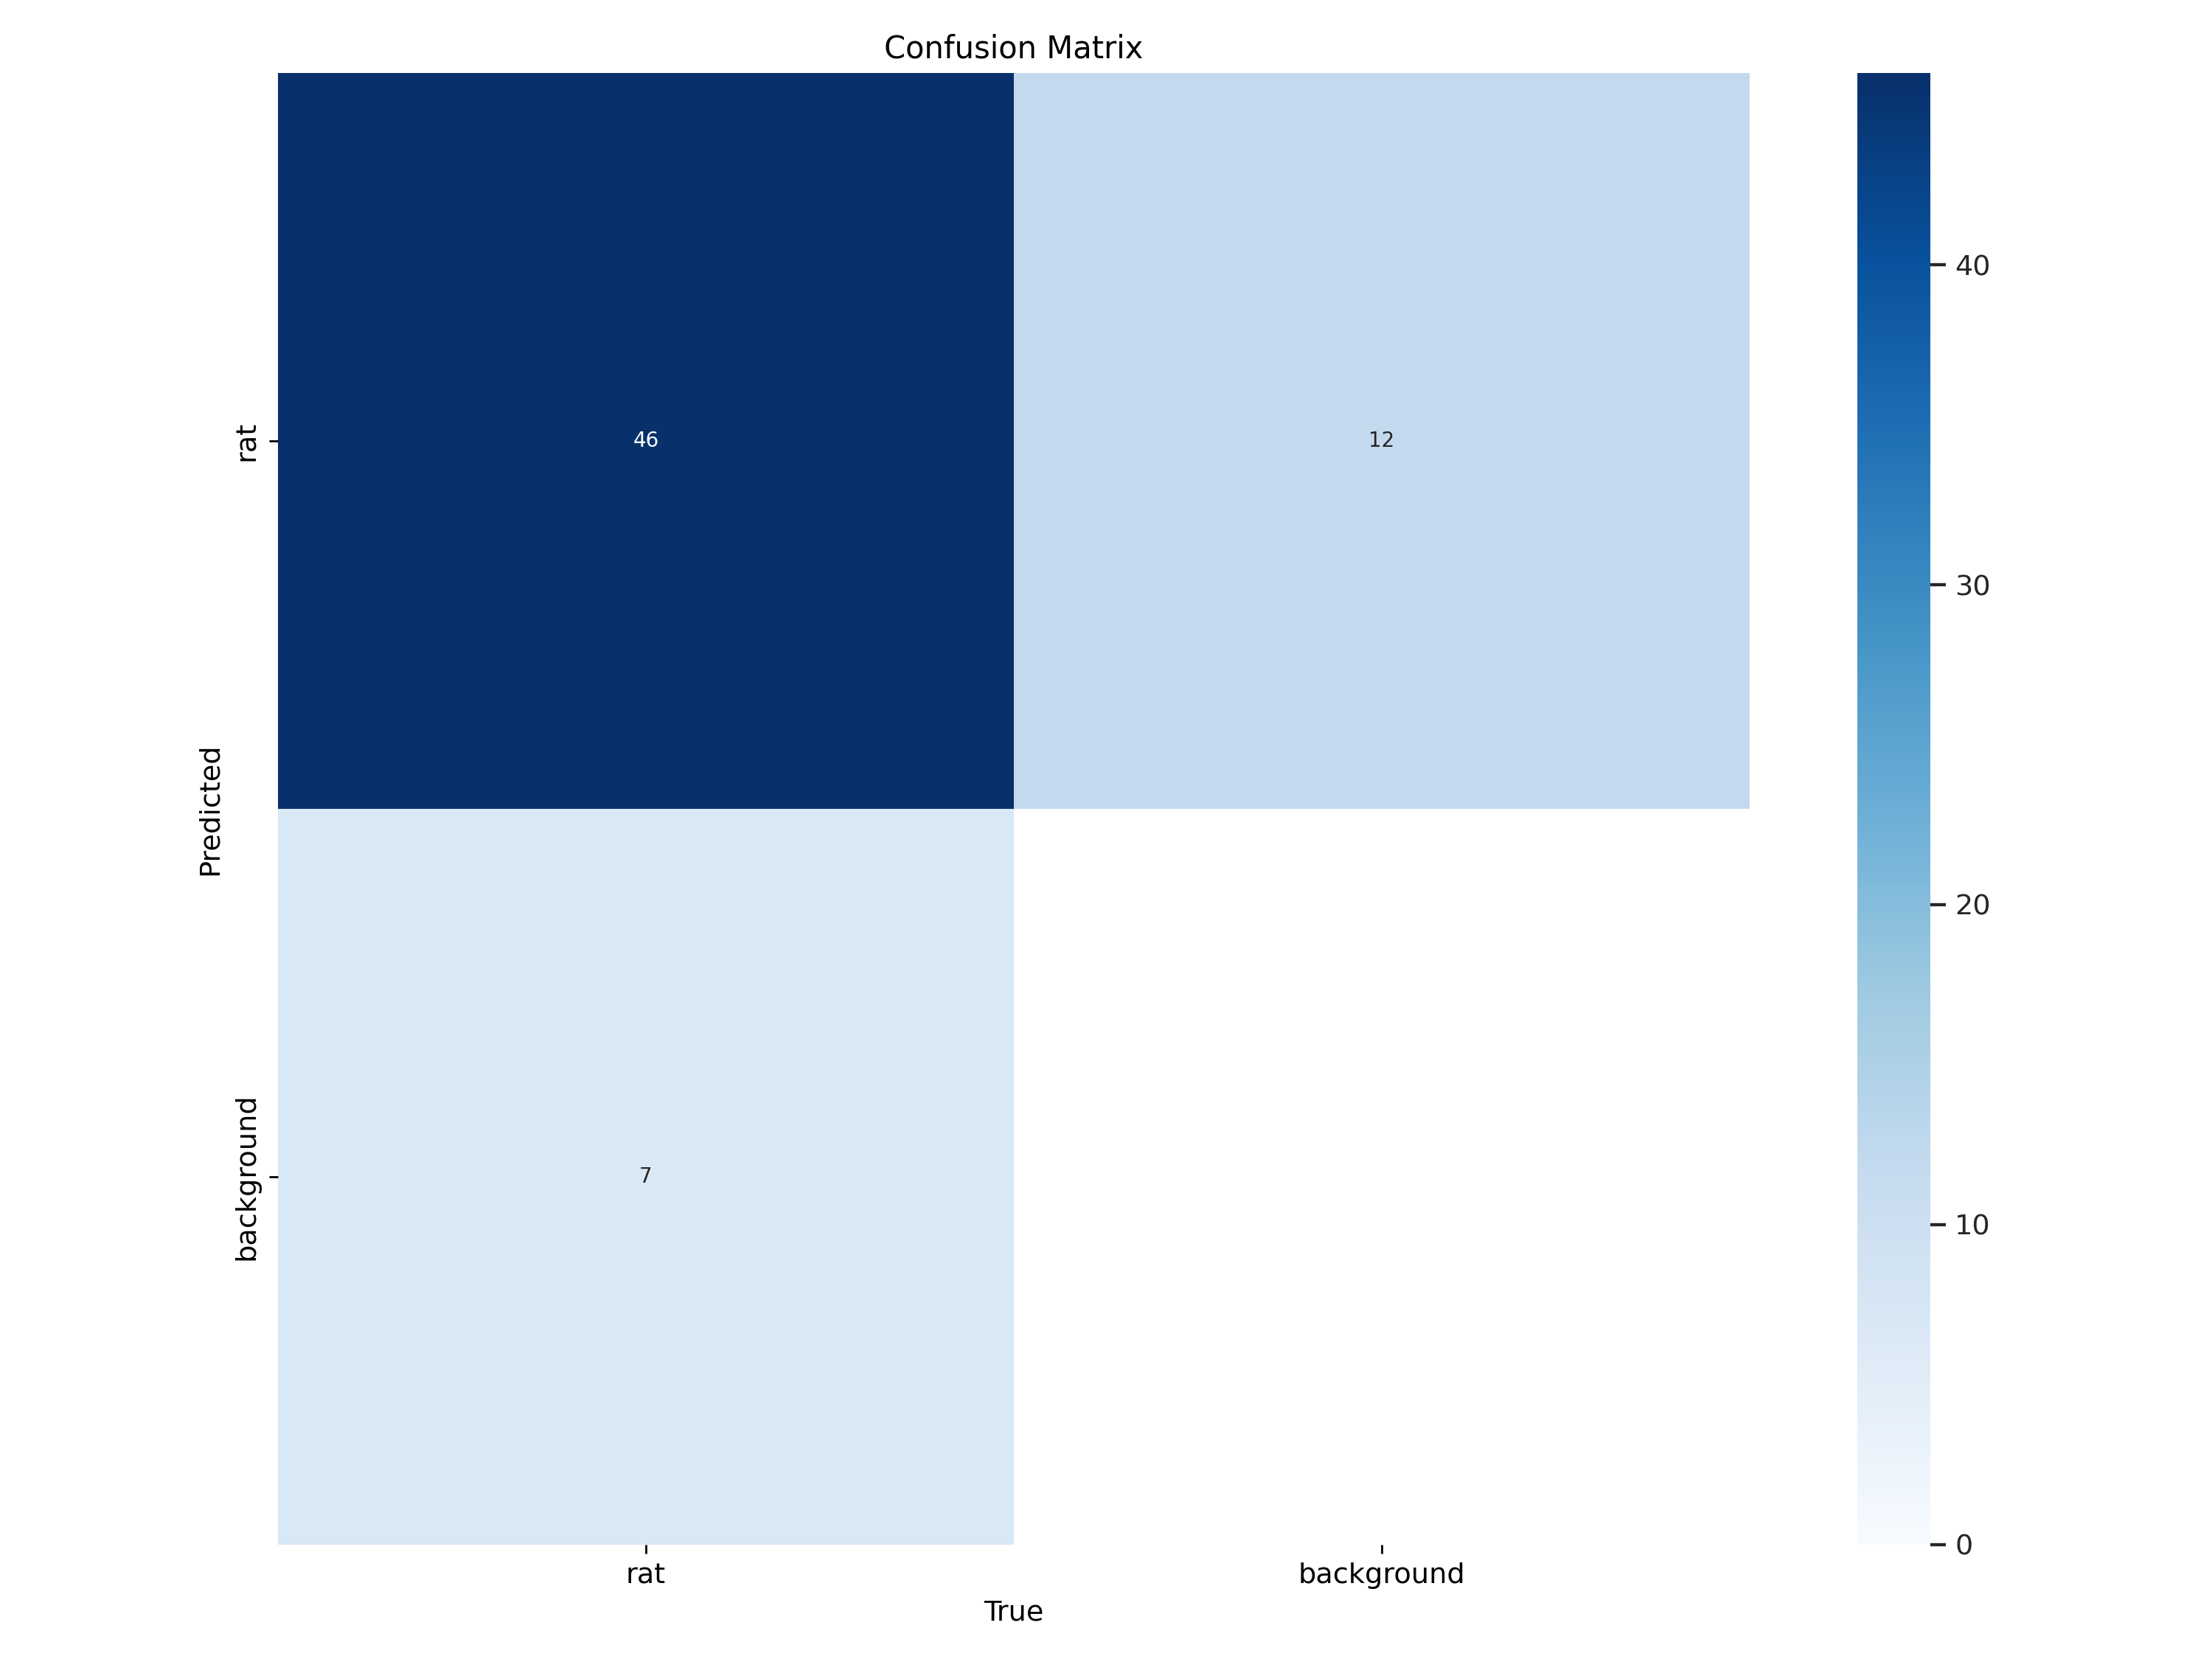

In [52]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{modelName}/confusion_matrix.png', width=600)

/content


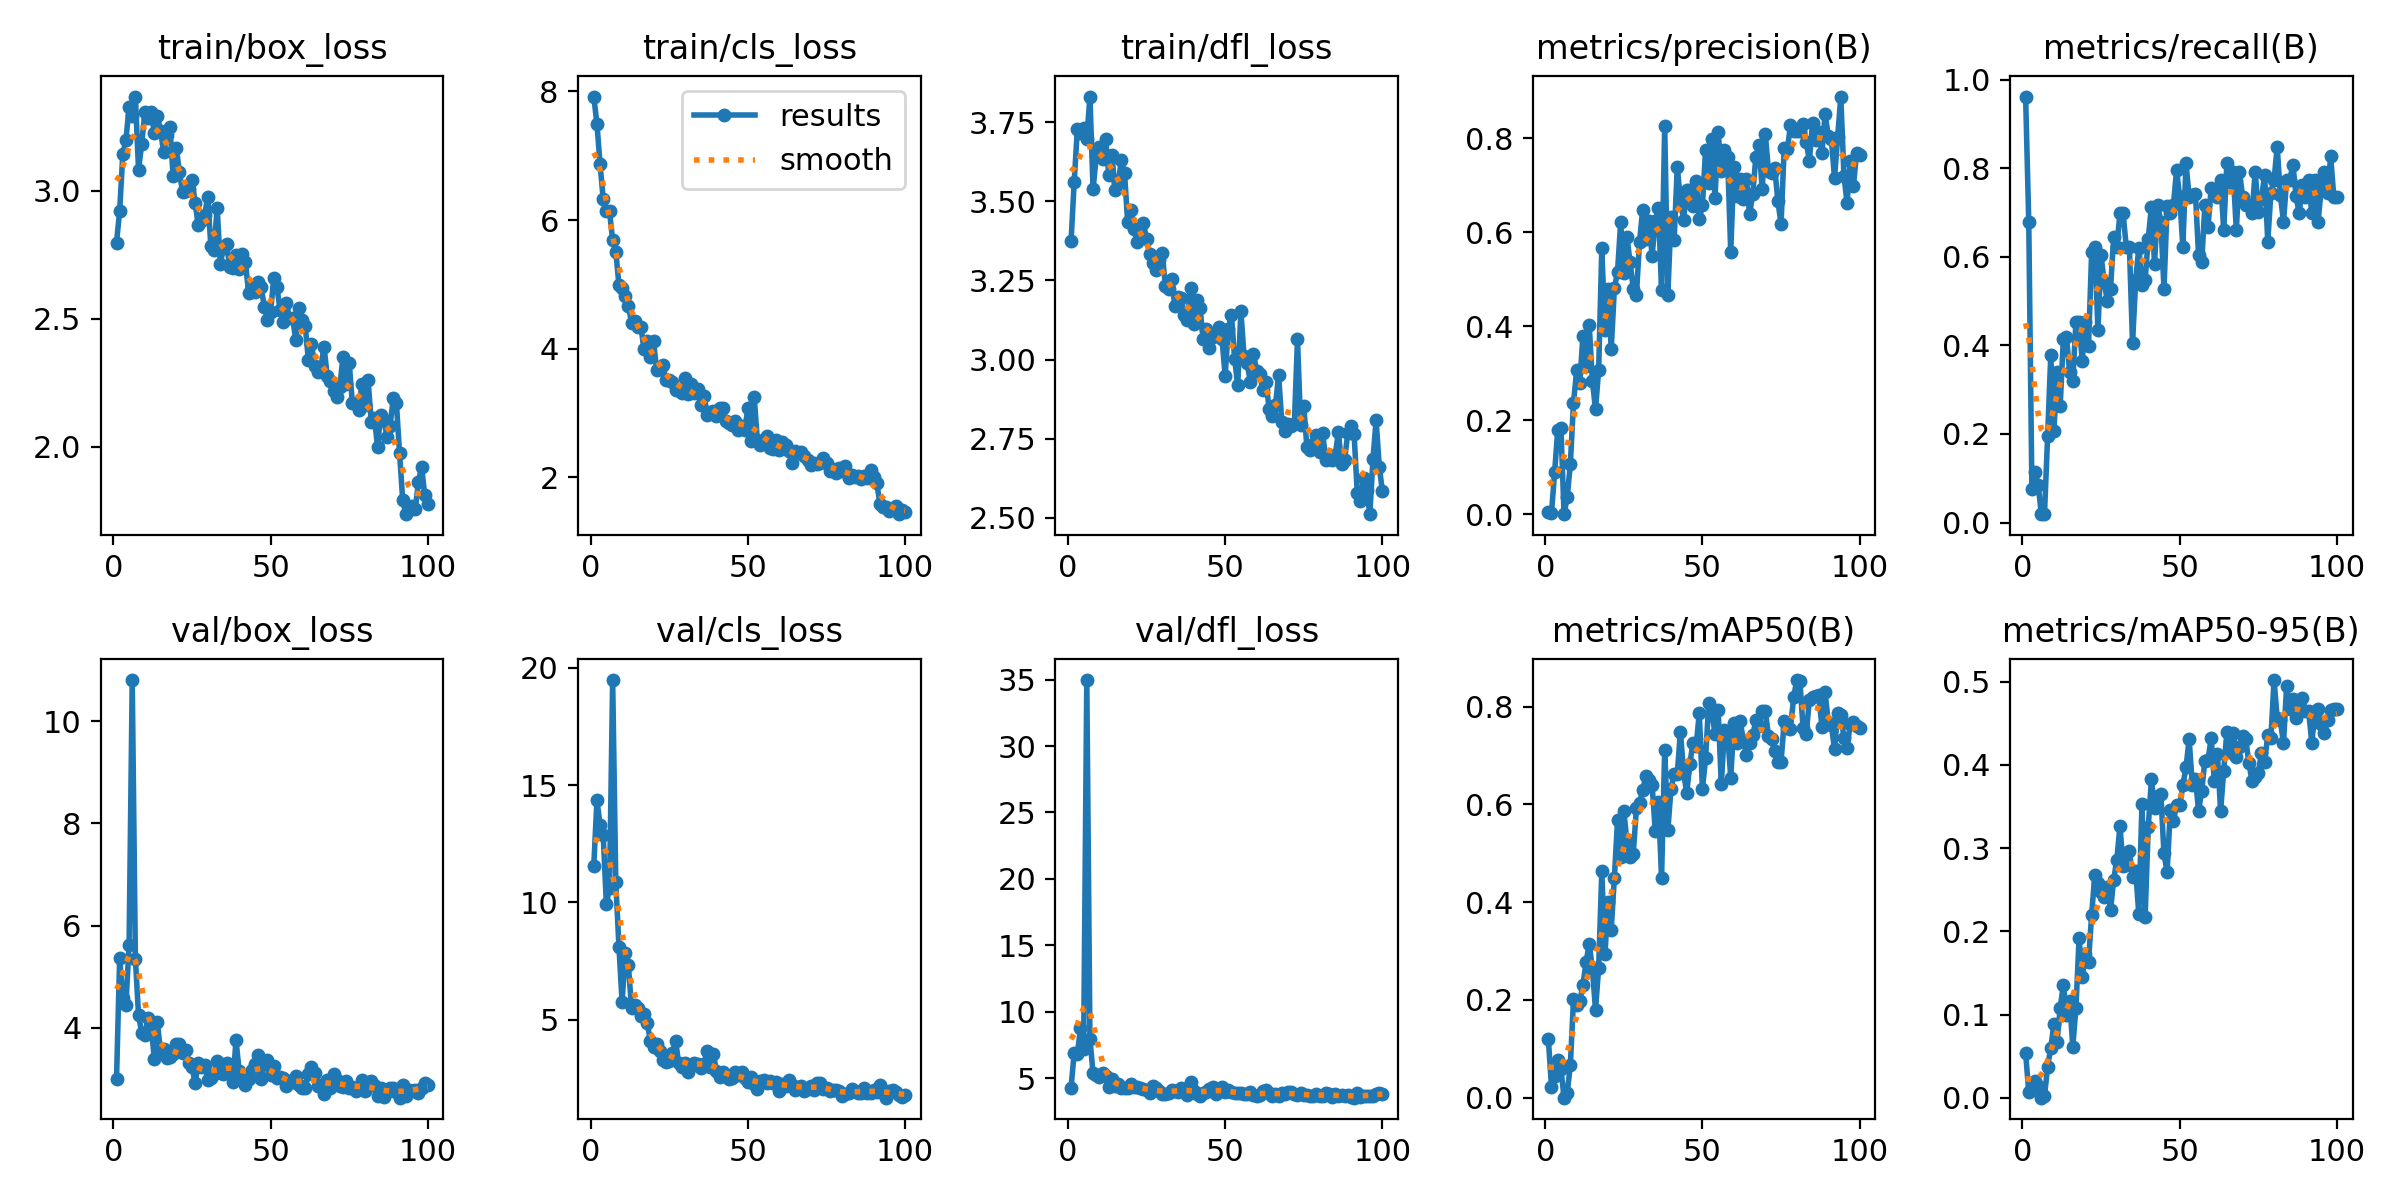

In [53]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{modelName}/results.png', width=600)

### Conclusions

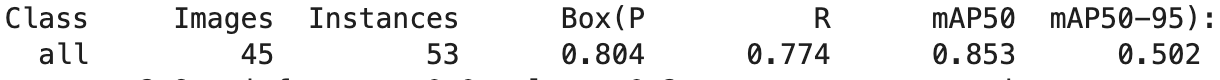

The learning rate (lr0=0.001) was ignored because the optimizer was set to "auto", which means YOLO automatically selects the best optimizer, learning rate, and momentum for training.

## YOLOv10 Nano - Epochs = 200

In [32]:
%cd {HOME}

# Load a model
model = YOLO("yolov10n.pt")
modelName="yolov10_nano_200"

# Train the model
results = model.train(data=f"{dataset.location}/data.yaml", epochs=200, imgsz=640, project="runs/detect", name=modelName)


/content
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/datasets/ratsDetectionV3-3/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=yolov10_nano_200, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

train: Scanning /content/datasets/ratsDetectionV3-3/train/labels.cache... 353 images, 6 backgrounds, 0 corrupt: 100%|██████████| 353/353 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/ratsDetectionV3-3/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov10_nano_200/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov10_nano_200
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      3.39G      2.798      7.919      3.374          5        640: 100%|██████████| 23/23 [00:13<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         45         53    0.00378      0.962       0.12     0.0536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.32G      2.923      7.597      3.565          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         45         53    0.00348      0.887     0.0372     0.0115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      3.31G      3.285      6.973      3.824          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         45         53    0.00252      0.642    0.00814    0.00187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.34G      3.205      6.382      3.699          5        640: 100%|██████████| 23/23 [00:11<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         45         53      0.027     0.0377      0.026    0.00774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.31G       3.33      6.056      3.769          3        640: 100%|██████████| 23/23 [00:08<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         45         53   0.000593      0.151    0.00279   0.000579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      3.31G      3.388      6.134      3.786          0        640: 100%|██████████| 23/23 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         45         53     0.0423     0.0189    0.00216   0.000635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      3.32G      3.472       5.62      3.848          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         45         53     0.0793       0.17     0.0633       0.02



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      3.31G      3.034      5.514      3.496          0        640: 100%|██████████| 23/23 [00:08<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         45         53      0.102      0.132     0.0739     0.0192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.33G      3.186      4.882      3.607          9        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         45         53      0.187      0.264      0.124     0.0401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.33G      3.296      4.706       3.62          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         45         53      0.437      0.245      0.268      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      3.33G      3.239      4.588      3.503          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         45         53      0.236      0.434      0.191     0.0555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      3.33G      3.229      4.626      3.601          6        640: 100%|██████████| 23/23 [00:08<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         45         53      0.303      0.415      0.302      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      3.33G      3.269      4.264       3.61          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         45         53      0.388      0.203      0.172     0.0512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      3.36G      3.286      4.454      3.668          3        640: 100%|██████████| 23/23 [00:08<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         45         53      0.419      0.394      0.297       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.35G      3.296        4.4      3.644          5        640: 100%|██████████| 23/23 [00:08<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         45         53       0.15      0.132     0.0863     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      3.33G      3.118       4.35      3.542          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         45         53      0.435      0.189      0.167     0.0541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      3.31G       3.21      4.107      3.637          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         45         53       0.42      0.453      0.367      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      3.31G       3.31      4.229      3.636          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]

                   all         45         53       0.36      0.377      0.287      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200       3.3G      3.149      4.053      3.518          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         45         53      0.356      0.283      0.309      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      3.36G      3.141      4.123      3.426          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         45         53      0.505      0.636      0.486      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      3.33G      3.077       3.81       3.49          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         45         53      0.756      0.468      0.556        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      3.33G      3.046       3.69      3.442          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         45         53      0.514      0.519      0.438      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      3.33G      3.188      3.876      3.501          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         45         53      0.681      0.547      0.635      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      3.36G      3.005      3.668      3.427          4        640: 100%|██████████| 23/23 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all         45         53       0.48      0.661      0.543      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      3.33G      3.144      3.612      3.495          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         45         53      0.441      0.528      0.397      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      3.36G      3.112      3.592      3.404          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         45         53      0.418      0.585       0.42      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      3.32G       2.95      3.475       3.36          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]

                   all         45         53      0.641      0.566      0.545      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      3.31G       2.98      3.463      3.363          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         45         53      0.561      0.623      0.608      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      3.33G      2.913      3.535      3.297          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         45         53       0.76      0.585      0.696      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      3.33G      3.044      3.622      3.379          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         45         53      0.635      0.658      0.666      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      3.32G      2.917      3.349      3.265          5        640: 100%|██████████| 23/23 [00:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         45         53      0.594      0.585      0.605      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      3.36G      2.886       3.39      3.283          1        640: 100%|██████████| 23/23 [00:09<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         45         53      0.572       0.58      0.566      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      3.34G      2.988       3.39      3.337          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         45         53      0.591      0.509      0.545      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      3.31G      2.848      3.512      3.325          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         45         53      0.544      0.541      0.549      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      3.35G      2.939      3.323      3.371          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         45         53      0.435      0.653      0.481      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      3.33G      2.877      3.497      3.307          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]


                   all         45         53      0.616      0.698      0.689      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      3.31G      2.842      3.227      3.207          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         45         53      0.663       0.66      0.687      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      3.34G      2.828      3.161      3.253          6        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         45         53      0.699      0.698      0.691      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      3.32G      2.829      3.142      3.253          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         45         53      0.746      0.566       0.63      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      3.33G      2.768      3.066      3.189          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         45         53       0.65      0.667       0.69      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      3.33G      2.785      3.231      3.257          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         45         53       0.61      0.755      0.733      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      3.34G      2.903      3.168      3.281         12        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         45         53      0.765      0.679      0.769      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      3.32G      2.766      3.011      3.146         14        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         45         53      0.738      0.698       0.73      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      3.34G      2.825      3.056      3.203          5        640: 100%|██████████| 23/23 [00:08<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         45         53      0.576       0.66      0.689      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      3.31G      2.772       2.98      3.176          7        640: 100%|██████████| 23/23 [00:08<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         45         53      0.671      0.654      0.632      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      3.34G      2.752      3.029      3.171          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         45         53      0.687      0.585      0.637      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      3.33G      2.785      2.889      3.231          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         45         53      0.777      0.642       0.73      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      3.33G      2.621      2.955      3.113          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         45         53      0.703      0.626        0.7      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      3.36G      2.669      2.895      3.142          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         45         53      0.755      0.604      0.703      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      3.33G      2.586      3.121      2.947          0        640: 100%|██████████| 23/23 [00:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         45         53      0.837      0.582      0.741      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      3.32G      2.738      2.825      3.123          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         45         53      0.717      0.679       0.72      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      3.34G       2.68      3.196      3.193          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         45         53      0.722      0.679      0.698      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      3.36G      2.714       2.91      3.146          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         45         53      0.621      0.717      0.649      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      3.33G       2.65      2.692      3.056          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         45         53      0.747      0.724      0.785      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200       3.3G      2.654      2.776      3.139          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         45         53      0.585      0.744      0.677        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      3.33G      2.616      2.907      3.124          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         45         53      0.575      0.612      0.571      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      3.33G      2.635      2.642      3.026          3        640: 100%|██████████| 23/23 [00:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         45         53      0.753      0.747      0.774      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      3.33G      2.589      2.729       3.03          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         45         53      0.601      0.642      0.652      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      3.32G      2.673      2.734       3.11          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         45         53      0.715      0.664      0.692      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      3.33G      2.566      2.613      3.026          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         45         53      0.648      0.729      0.693      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      3.31G       2.62      2.753      3.063          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         45         53      0.713      0.736      0.713      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      3.36G      2.535      2.805      3.036          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         45         53      0.825       0.66      0.757       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      3.32G       2.61      2.608      3.033          2        640: 100%|██████████| 23/23 [00:09<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         45         53      0.732      0.698      0.743       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      3.31G      2.475      2.467      2.957          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all         45         53      0.865       0.66      0.789      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      3.33G      2.458      2.576      2.924          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         45         53      0.701      0.664      0.726      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      3.34G      2.516      2.543      2.967          5        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         45         53      0.899      0.604      0.753      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      3.32G      2.648      2.573      3.135          1        640: 100%|██████████| 23/23 [00:09<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         45         53      0.653      0.755      0.698      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      3.33G      2.527      2.522      2.994          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         45         53      0.697      0.696      0.684      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      3.33G      2.499      2.497      2.945          4        640: 100%|██████████| 23/23 [00:07<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         45         53       0.79      0.736      0.756      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      3.33G      2.445      2.524      2.937          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         45         53      0.826      0.679      0.809        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      3.32G      2.424      2.468      2.942          1        640: 100%|██████████| 23/23 [00:09<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         45         53      0.772      0.679      0.756      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      3.33G       2.44      2.525      2.962          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         45         53       0.52      0.469      0.466      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      3.33G      2.522      2.491      3.134          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         45         53      0.768      0.717      0.728      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      3.31G      2.454      2.514      2.911          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         45         53       0.77       0.66       0.76      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      3.32G      2.477      2.377      2.958          4        640: 100%|██████████| 23/23 [00:09<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         45         53       0.78      0.734      0.792      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      3.33G      2.424      2.413       2.87          4        640: 100%|██████████| 23/23 [00:07<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         45         53      0.767      0.717       0.76      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      3.33G      2.413      2.425      2.872          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         45         53      0.643      0.748      0.745      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      3.33G      2.378      2.418      2.904          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         45         53      0.758      0.774      0.853      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      3.32G      2.457      2.479       2.94          5        640: 100%|██████████| 23/23 [00:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         45         53      0.723      0.691      0.726      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      3.33G      2.316      2.308      2.798         11        640: 100%|██████████| 23/23 [00:08<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         45         53      0.762      0.723      0.729      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      3.33G      2.491       2.42      2.948          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         45         53      0.776      0.719      0.746      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      3.33G      2.348      2.219      2.868          4        640: 100%|██████████| 23/23 [00:09<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         45         53       0.75      0.736      0.773      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200       3.3G      2.322      2.194      2.811          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         45         53      0.694      0.772      0.825      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      3.36G      2.291      2.315       2.85          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         45         53      0.759      0.849      0.766      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      3.33G      2.415      2.353      2.929          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         45         53      0.702      0.698      0.642        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      3.33G      2.358      2.341      2.942          3        640: 100%|██████████| 23/23 [00:09<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         45         53      0.611      0.698      0.688      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200       3.3G      2.179      2.145       2.77          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         45         53      0.761      0.661      0.697      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      3.33G      2.277      2.305      2.839          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         45         53      0.594      0.717       0.67       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      3.33G      2.464      2.341      2.925          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         45         53      0.755      0.717      0.796      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      3.33G      2.413      2.287       2.96          6        640: 100%|██████████| 23/23 [00:10<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         45         53      0.762      0.717      0.784       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200       3.3G      2.318      2.166      2.808          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         45         53      0.785      0.698      0.774      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      3.36G      2.252      2.133      2.784          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         45         53      0.787      0.811      0.836      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      3.33G      2.344      2.218      2.884          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         45         53      0.774      0.774      0.776      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      3.31G      2.374      2.224      2.818          3        640: 100%|██████████| 23/23 [00:09<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         45         53      0.809      0.721      0.793      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200       3.3G      2.271      2.138      2.848          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         45         53      0.756      0.774      0.718      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      3.34G      2.289      2.095      2.774          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         45         53      0.674      0.679      0.733       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      3.34G      2.317      2.114      2.823          3        640: 100%|██████████| 23/23 [00:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         45         53      0.767      0.774       0.79      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      3.33G      2.316      2.182      2.822          3        640: 100%|██████████| 23/23 [00:10<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]

                   all         45         53      0.808      0.713      0.801      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200       3.3G      2.278      2.129      2.797          8        640: 100%|██████████| 23/23 [00:07<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         45         53      0.692      0.792      0.783      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      3.37G      2.256      2.093      2.814          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         45         53       0.86      0.694      0.806      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      3.31G      2.238      2.024      2.756          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         45         53      0.776      0.786      0.783      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      3.33G      2.281      2.044      2.837          2        640: 100%|██████████| 23/23 [00:10<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         45         53      0.674      0.736      0.709      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      3.35G      2.241      2.146      2.875          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         45         53      0.813       0.74      0.759      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      3.36G      2.036      1.965      2.674          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         45         53      0.907      0.736      0.849      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      3.33G      2.175      1.963      2.695          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         45         53      0.772      0.765      0.785      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      3.31G       2.16      2.093      2.748          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         45         53      0.731      0.666      0.735      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      3.33G      2.064      1.969      2.669          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         45         53      0.819      0.792       0.81      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      3.36G      2.301      2.088      2.799          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         45         53      0.684      0.695      0.641      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      3.34G      2.161      1.999      2.743          2        640: 100%|██████████| 23/23 [00:10<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         45         53      0.824       0.66      0.725      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      3.31G       2.05      1.928      2.694          2        640: 100%|██████████| 23/23 [00:09<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         45         53      0.882      0.707      0.804      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      3.33G      2.305      2.187      2.774          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         45         53      0.858      0.796      0.852      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      3.34G      2.147      1.848      2.715          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         45         53      0.796      0.717      0.761      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      3.33G      2.065      1.942      2.674          1        640: 100%|██████████| 23/23 [00:09<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         45         53      0.886      0.733      0.778       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      3.36G      2.101      1.862      2.694          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all         45         53      0.844      0.817      0.846      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      3.32G      2.225       1.96      2.754          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         45         53      0.771      0.762      0.794      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      3.31G      2.076      1.881      2.638          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all         45         53      0.854      0.698      0.764      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      3.31G       2.18      1.859      2.762          2        640: 100%|██████████| 23/23 [00:10<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         45         53      0.724      0.679      0.685      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      3.33G       2.08       1.82      2.688          4        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         45         53      0.751       0.66      0.712      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      3.33G      2.162          2      2.734          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         45         53      0.795      0.657      0.714       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      3.33G       2.08      1.959      2.687          3        640: 100%|██████████| 23/23 [00:10<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         45         53      0.666      0.717      0.673      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      3.34G      2.079      1.832      2.689          3        640: 100%|██████████| 23/23 [00:08<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         45         53      0.826      0.717      0.795      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      3.33G      2.126      1.871      2.801          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         45         53      0.807      0.711      0.719      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      3.32G      1.974      1.921      2.629          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         45         53      0.781      0.739      0.745      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      3.33G      2.037      1.757      2.605          4        640: 100%|██████████| 23/23 [00:10<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         45         53      0.736      0.698       0.78      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      3.33G      2.245      2.034      2.931          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         45         53      0.808      0.679      0.738      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      3.33G      2.185      1.964      2.763          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         45         53      0.759      0.698      0.741      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      3.35G      2.171      2.055      2.762          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         45         53      0.774      0.717      0.769      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      3.34G      1.972      1.762      2.624          2        640: 100%|██████████| 23/23 [00:10<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         45         53      0.712      0.717      0.721       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      3.33G      2.122      1.848      2.717          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         45         53      0.803      0.736      0.748      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      3.33G      2.157      2.053      2.692          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         45         53       0.93       0.66      0.786      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      3.33G      1.987      1.713      2.635          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         45         53      0.724       0.79      0.774      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      3.33G      1.971       1.83      2.649          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         45         53      0.709      0.698      0.732      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      3.33G      1.947      1.855      2.623          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         45         53      0.823      0.736      0.816      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      3.31G      2.149      1.818      2.764          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         45         53      0.776      0.717      0.773      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      3.32G      1.916      1.598      2.587          3        640: 100%|██████████| 23/23 [00:10<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.62it/s]

                   all         45         53      0.835      0.698       0.77      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      3.33G      1.979      1.727      2.527          7        640: 100%|██████████| 23/23 [00:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all         45         53      0.734      0.782      0.743      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      3.31G      1.851      1.736      2.551          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         45         53       0.74      0.736      0.735      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      3.33G       1.95       1.85      2.626          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         45         53      0.772      0.703      0.739      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      3.32G      2.018      1.754      2.612          3        640: 100%|██████████| 23/23 [00:09<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         45         53       0.85       0.75      0.822      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      3.33G      1.976       1.71      2.574          6        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         45         53      0.794      0.792       0.77      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      3.33G      1.855      1.678      2.565          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         45         53      0.763      0.727       0.75      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      3.33G      1.995      1.872      2.607          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         45         53      0.836      0.772      0.777      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      3.32G      2.005      1.693      2.633          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         45         53      0.697      0.755      0.739      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      3.34G      1.858      1.583      2.548          3        640: 100%|██████████| 23/23 [00:08<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]

                   all         45         53      0.716      0.807      0.749      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      3.33G      1.974      1.636      2.573          5        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         45         53        0.8      0.753      0.799      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      3.31G       1.86      1.619      2.493          4        640: 100%|██████████| 23/23 [00:09<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         45         53      0.774      0.755      0.778      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      3.32G      1.899      1.667      2.523          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]

                   all         45         53      0.906      0.727      0.793      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      3.33G      1.931      1.621      2.608          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         45         53      0.856      0.792      0.799      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      3.31G      1.858      1.644      2.536          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         45         53      0.732      0.774      0.731      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      3.33G      1.933      1.813      2.592          7        640: 100%|██████████| 23/23 [00:09<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         45         53       0.79      0.709      0.736      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      3.32G      1.822      1.566      2.463          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         45         53      0.782      0.812      0.813      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      3.31G      1.814       1.89      2.502          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         45         53      0.773       0.83       0.84      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      3.31G       1.76       1.51      2.444          5        640: 100%|██████████| 23/23 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         45         53      0.845      0.774       0.82      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      3.31G      1.877      1.595      2.528          2        640: 100%|██████████| 23/23 [00:09<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         45         53      0.905      0.736      0.832      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      3.33G      1.862      1.708      2.523          7        640: 100%|██████████| 23/23 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.49it/s]

                   all         45         53      0.904      0.792      0.848      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      3.31G      1.839      1.599      2.498          3        640: 100%|██████████| 23/23 [00:08<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         45         53      0.792       0.86      0.799       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      3.31G      1.786      1.652      2.449          6        640: 100%|██████████| 23/23 [00:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         45         53       0.83      0.849      0.803      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      3.34G      1.735      1.537      2.447          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         45         53      0.862      0.827      0.827      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      3.36G      1.893      1.803      2.565          5        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         45         53      0.847      0.731      0.787      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      3.33G       1.78      1.653       2.52          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         45         53      0.794      0.755      0.766      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      3.31G      1.723      1.424      2.402          4        640: 100%|██████████| 23/23 [00:11<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         45         53      0.799       0.75      0.725      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      3.31G      1.746      1.488      2.452          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         45         53      0.925      0.696      0.792      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      3.32G      1.862       1.78      2.693          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         45         53       0.85      0.698      0.756      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      3.33G      1.778      1.467      2.583          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         45         53      0.742      0.774      0.802      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      3.33G      1.688      1.503      2.426          5        640: 100%|██████████| 23/23 [00:10<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         45         53       0.81      0.755      0.815      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      3.33G      1.757      1.547      2.447          7        640: 100%|██████████| 23/23 [00:06<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         45         53      0.822      0.695      0.778        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      3.32G      1.727      1.498      2.431          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         45         53      0.737      0.774      0.736      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      3.33G      1.924      1.919      2.622          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         45         53      0.801       0.76      0.808       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      3.31G      1.761      1.534      2.516          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         45         53      0.897      0.679      0.784      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      3.34G      1.796      1.629      2.535          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         45         53      0.809      0.811      0.831       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      3.32G      1.783      1.525      2.455          5        640: 100%|██████████| 23/23 [00:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         45         53      0.769      0.753      0.733      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      3.33G      1.745      1.479      2.443          7        640: 100%|██████████| 23/23 [00:10<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         45         53      0.768      0.811      0.766      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      3.31G      1.738      1.533      2.416          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         45         53      0.751      0.736      0.744      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      3.33G      1.572      1.409      2.329          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         45         53      0.735      0.792      0.754      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      3.32G      1.863       1.78      2.498          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]

                   all         45         53      0.671      0.809      0.725      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      3.33G      1.644      1.399      2.375          3        640: 100%|██████████| 23/23 [00:10<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         45         53      0.889      0.717      0.797       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      3.33G      1.742      1.576      2.411          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         45         53      0.886      0.731      0.811      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      3.33G       1.69      1.476      2.446          5        640: 100%|██████████| 23/23 [00:07<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         45         53      0.753      0.811       0.81       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      3.32G      1.752      1.595      2.477         12        640: 100%|██████████| 23/23 [00:09<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.44it/s]

                   all         45         53      0.798      0.792      0.808      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      3.33G      1.722      1.402       2.53          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         45         53      0.757      0.765      0.762      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      3.31G      1.629      1.376      2.369          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         45         53      0.823      0.755      0.801      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      3.33G      1.563       1.42      2.354          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         45         53      0.889      0.736      0.793      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200       3.3G      1.668      1.392      2.407          5        640: 100%|██████████| 23/23 [00:10<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         45         53      0.889      0.754       0.82      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      3.33G      1.577       1.38      2.395          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         45         53      0.838      0.783      0.793      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      3.31G      1.709      1.546      2.399         14        640: 100%|██████████| 23/23 [00:09<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all         45         53      0.781      0.808      0.772      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      3.33G      1.586        1.3      2.376          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         45         53      0.813      0.717      0.753       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      3.33G      1.571      1.386      2.343          5        640: 100%|██████████| 23/23 [00:10<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         45         53      0.789      0.778       0.76      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      3.33G       1.66      1.571      2.424         11        640: 100%|██████████| 23/23 [00:08<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         45         53      0.801      0.762      0.765      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      3.33G      1.556       1.32      2.314          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         45         53      0.755      0.811      0.791      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      3.31G      1.549      1.379      2.351          1        640: 100%|██████████| 23/23 [00:09<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         45         53      0.732      0.792      0.777      0.471


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      3.33G      1.352      1.084      2.199          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         45         53      0.841      0.698      0.779      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      3.31G      1.456      1.465      2.319          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all         45         53      0.872      0.717      0.784      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      3.33G      1.456      1.176      2.413          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         45         53       0.82      0.736       0.78      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      3.31G      1.384     0.9984       2.23          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         45         53      0.818      0.762      0.777      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      3.33G       1.41      0.986      2.226          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         45         53      0.734      0.792      0.771       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      3.31G       1.24     0.9087      2.137          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         45         53      0.765      0.698      0.758      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      3.31G      1.278      0.976      2.226          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all         45         53      0.663      0.774      0.721      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      3.31G      1.288     0.9314      2.168          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         45         53      0.727      0.754      0.727      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      3.32G      1.241     0.9225      2.167          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         45         53      0.697      0.736      0.723      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      3.31G      1.263     0.8328      2.174          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         45         53      0.713      0.736      0.726      0.469



200 epochs completed in 0.549 hours.
Optimizer stripped from runs/detect/yolov10_nano_200/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/yolov10_nano_200/weights/best.pt, 5.8MB

Validating runs/detect/yolov10_nano_200/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 285 layers, 2,694,806 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]


                   all         45         53      0.893      0.792      0.847      0.504
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/yolov10_nano_200


/content


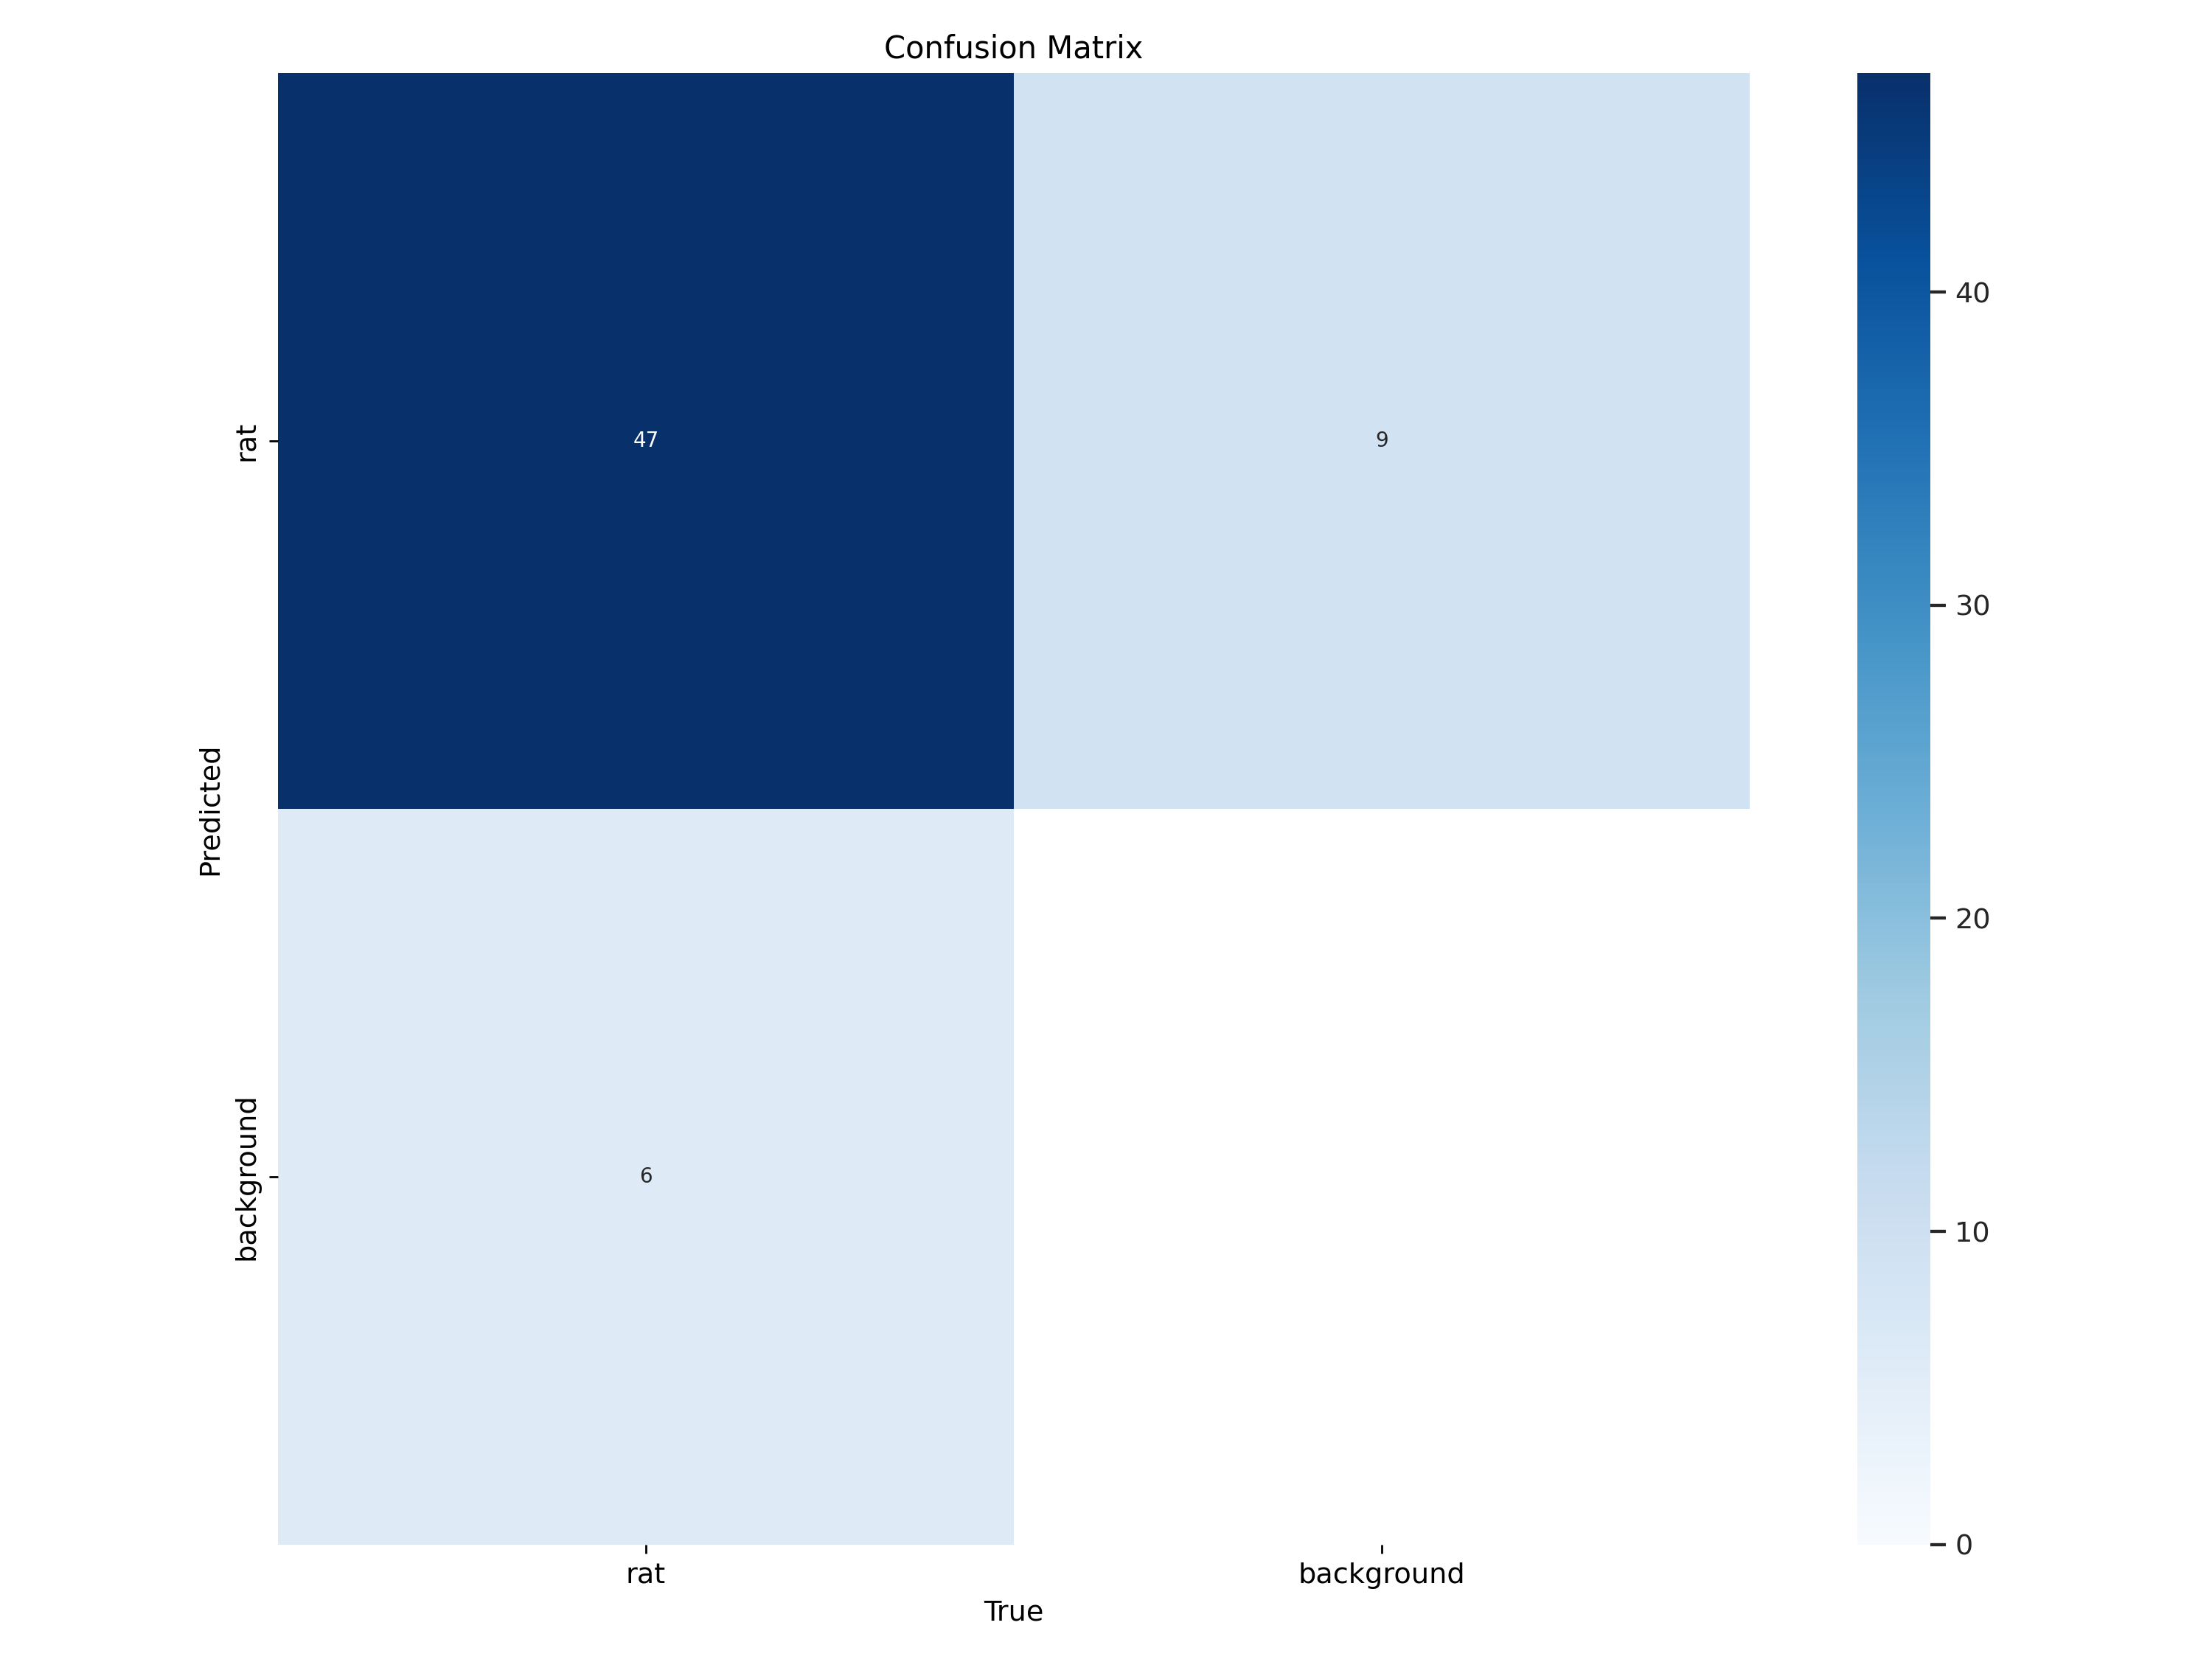

In [33]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{modelName}/confusion_matrix.png', width=600)

/content


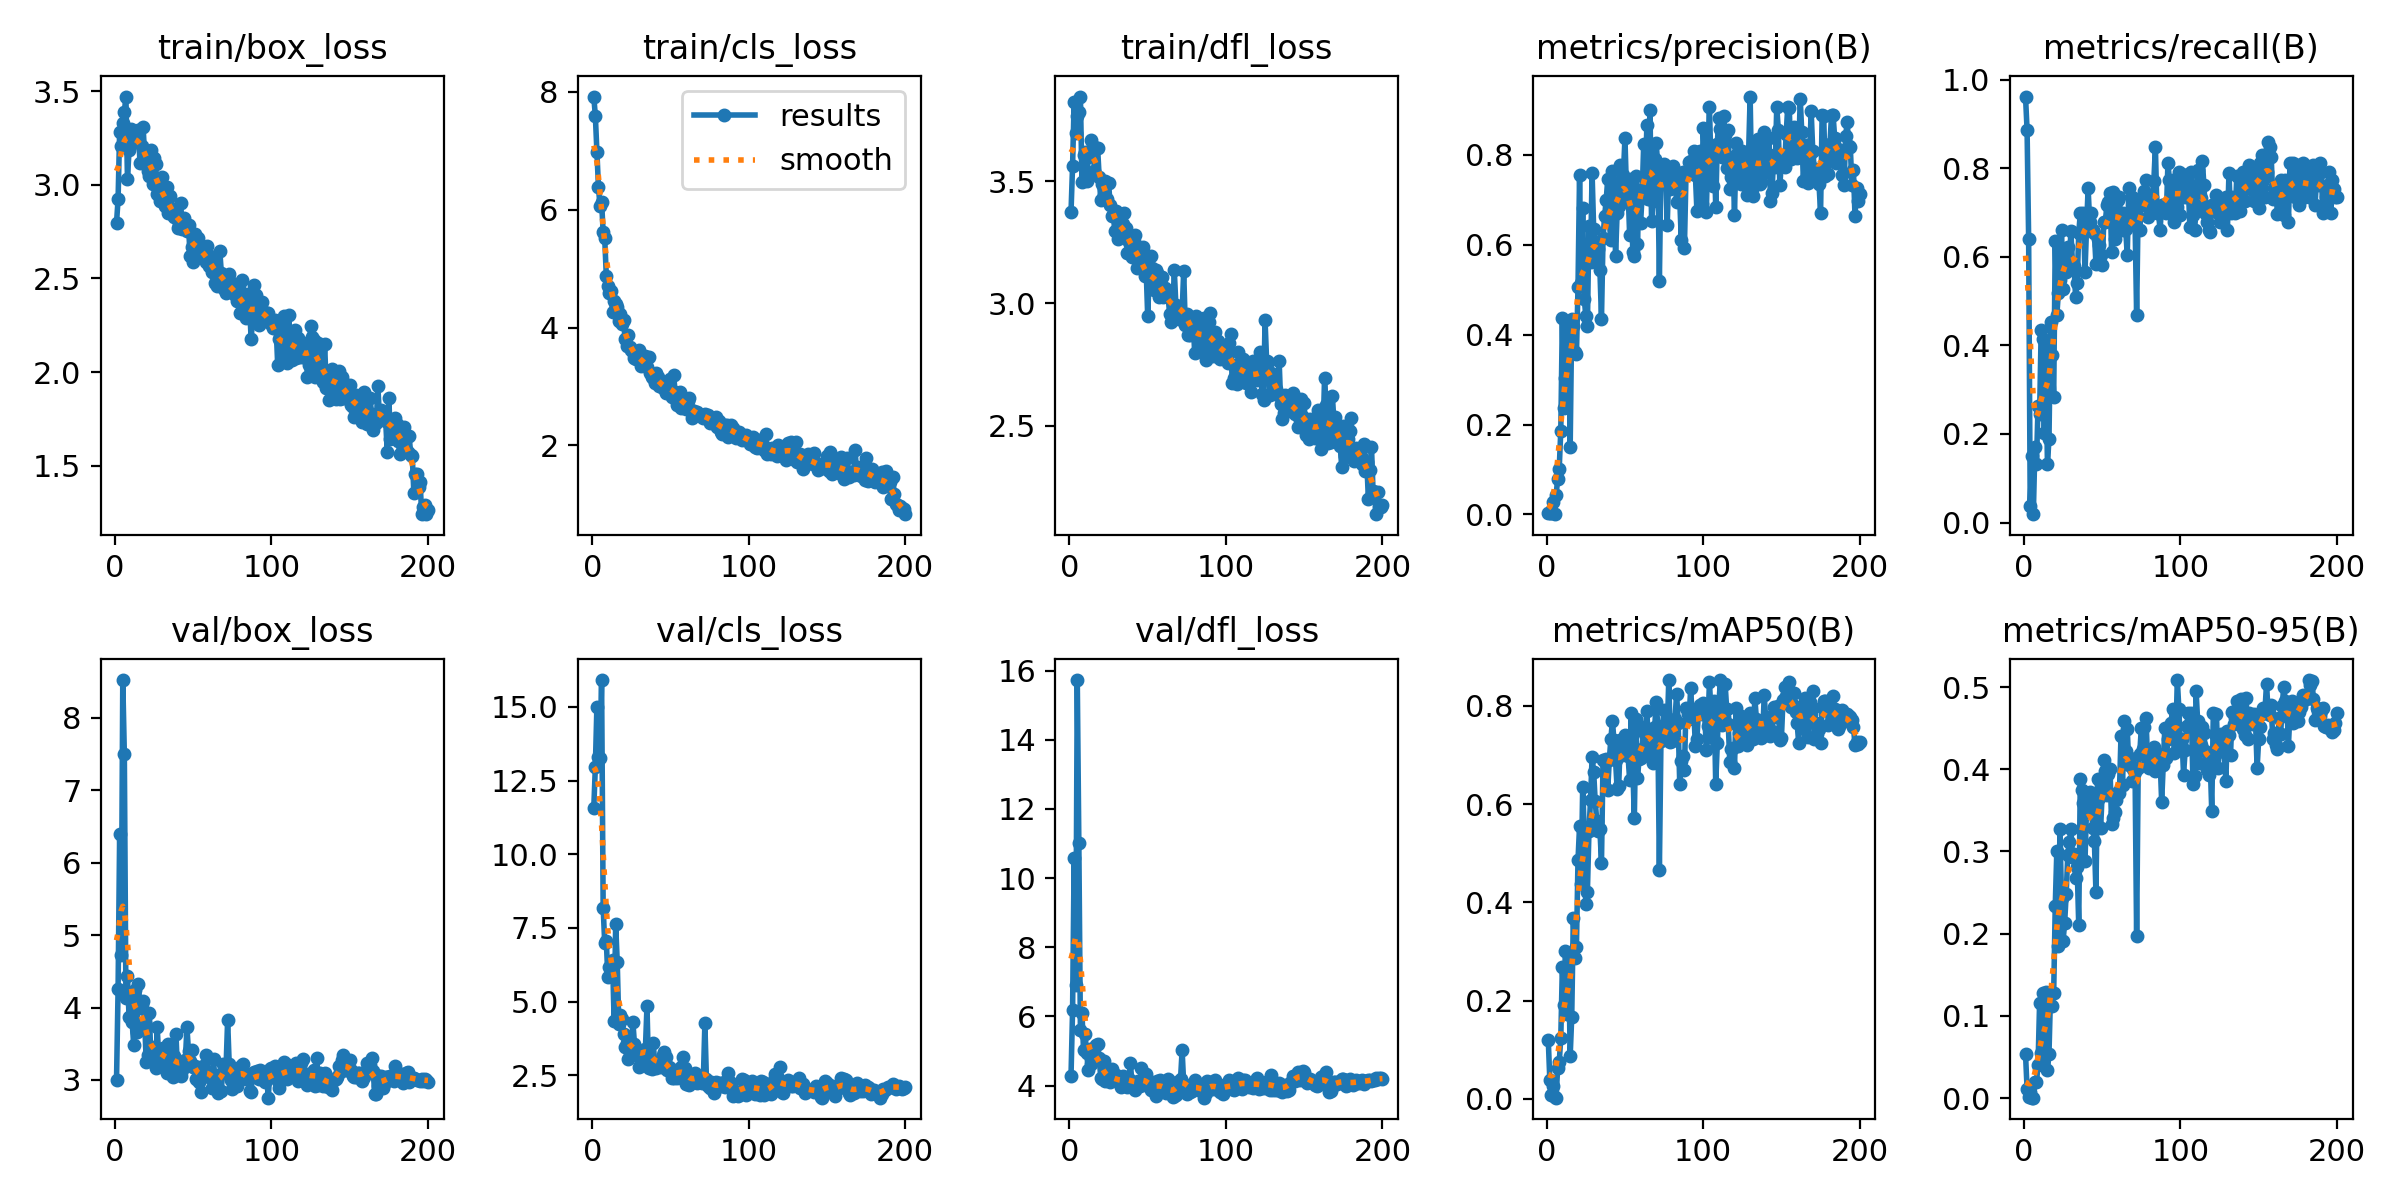

In [34]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{modelName}/results.png', width=600)

### Conclusions

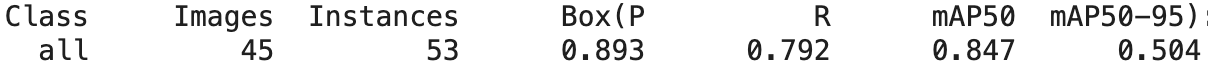
- Increasing the numbers of epochs from 100 to 200 improve the precision by almost 10%.
- No Significant Overfitting: Training and validation losses follow a similar downward trend, meaning the model generalizes well.
- We will try a more advanced models to try to improve the overall performance.

In [ ]:
model.val(data="dataset/data.yaml", split="test")

## YOLOv10 Medium - Epochs = 100

In [29]:
%cd {HOME}

# Load a model
modelyolov10m = YOLO("yolov10m.pt")
modelName="yolov10_m_100"

# Train the model
results = modelyolov10m.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640, project="runs/detect", name=modelName)


/content


100%|██████████| 32.1M/32.1M [00:00<00:00, 40.7MB/s]


Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=/content/datasets/ratsDetectionV3-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=yolov10_m_100, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning /content/datasets/ratsDetectionV3-3/train/labels.cache... 353 images, 6 backgrounds, 0 corrupt: 100%|██████████| 353/353 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/ratsDetectionV3-3/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov10_m_100/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov10_m_100
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       9.2G      3.176      8.142      3.956          5        640: 100%|██████████| 23/23 [00:16<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         45         53     0.0376      0.245     0.0227    0.00634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.09G      3.895      6.014      4.576          1        640: 100%|██████████| 23/23 [00:14<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         45         53     0.0376      0.245     0.0227    0.00634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.13G      4.299      5.946      4.787          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


                   all         45         53     0.0376      0.245     0.0227    0.00634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.07G      4.082      5.788       4.64          5        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         45         53     0.0376      0.245     0.0227    0.00634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.09G      4.038      5.806      4.616          3        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         45         53     0.0376      0.245     0.0227    0.00634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.13G      3.806      5.824      4.304          0        640: 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         45         53   0.000862       0.17   0.000601   0.000199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.12G      3.899      5.654      4.497          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         45         53   0.000296     0.0755    0.00016   5.16e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.14G      3.542      5.216      3.987          0        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all         45         53     0.0418      0.208     0.0235    0.00709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.12G      3.615      5.086      4.137          9        640: 100%|██████████| 23/23 [00:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         45         53     0.0803       0.17     0.0295    0.00637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.14G      3.618      5.073      4.192          2        640: 100%|██████████| 23/23 [00:14<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         45         53      0.375       0.17      0.163     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.08G       3.49      5.186      4.103          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         45         53      0.226       0.34      0.169     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.17G      3.613      5.053      4.197          6        640: 100%|██████████| 23/23 [00:13<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         45         53      0.174      0.226      0.124      0.033



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.11G      3.527      4.726      4.051          5        640: 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         45         53      0.296      0.491      0.324      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.17G      3.444      4.835      4.017          3        640: 100%|██████████| 23/23 [00:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         45         53      0.232      0.453       0.25     0.0891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       9.1G      3.467       4.62      3.993          5        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         45         53      0.304      0.377      0.284     0.0988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.12G      3.401      4.586      3.975          1        640: 100%|██████████| 23/23 [00:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         45         53      0.204       0.17      0.121     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.09G      3.284      4.488      3.942          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         45         53      0.298      0.377      0.286      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.12G      3.482      4.583      4.031          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53       0.27      0.509      0.263      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.09G      3.393      4.335      4.037          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         45         53      0.429      0.472      0.365      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.19G      3.388      4.494      3.826          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         45         53      0.445      0.468      0.367      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.11G      3.298      4.197      3.911          3        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         45         53      0.589      0.377      0.475      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.15G      3.182      4.287      3.778          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         45         53      0.463      0.439      0.404      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.11G      3.381      4.327      3.928          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         45         53      0.399      0.491      0.389      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.18G      3.224      3.951       3.77          4        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         45         53      0.524      0.472      0.474      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       9.1G      3.234       4.07      3.864          3        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         45         53      0.454      0.528      0.461       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.17G      3.179        4.1      3.735          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         45         53      0.471      0.434      0.356      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.12G      3.121      3.865      3.755          3        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         45         53      0.634      0.396      0.404       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.14G      3.059      3.854      3.624          1        640: 100%|██████████| 23/23 [00:14<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         45         53      0.595       0.61      0.555      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.11G      2.969      3.698      3.578          1        640: 100%|██████████| 23/23 [00:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         45         53       0.54      0.453      0.496      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.14G      3.165      3.958      3.756          2        640: 100%|██████████| 23/23 [00:15<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         45         53      0.418      0.302      0.299      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.12G       3.04      3.882      3.596          5        640: 100%|██████████| 23/23 [00:14<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53      0.465      0.585      0.495      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.18G      2.986      3.843      3.595          1        640: 100%|██████████| 23/23 [00:14<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         45         53      0.475      0.472      0.399      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.08G      3.136      3.808      3.728          4        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         45         53      0.554      0.509      0.514      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.07G      3.045      3.787      3.696          4        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53      0.472      0.509       0.49      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.08G      3.007      3.649      3.585          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         45         53      0.407      0.642      0.455      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.16G      3.027      3.763      3.616          4        640: 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         45         53      0.491      0.434      0.455      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.09G      2.966      3.686      3.617          5        640: 100%|██████████| 23/23 [00:13<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53      0.387      0.491      0.337      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.11G      2.966      3.671      3.625          6        640: 100%|██████████| 23/23 [00:13<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         45         53      0.785      0.481      0.589      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.06G      3.055      3.562      3.661          1        640: 100%|██████████| 23/23 [00:14<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53      0.458      0.509      0.532      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.16G      2.976      3.427      3.618          5        640: 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         45         53       0.48      0.642      0.531      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.11G      2.978       3.61      3.681          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         45         53      0.592      0.566      0.595      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.15G      2.901       3.58       3.56         12        640: 100%|██████████| 23/23 [00:14<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         45         53      0.579      0.509      0.581      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.11G      2.866      3.346       3.48         14        640: 100%|██████████| 23/23 [00:14<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         45         53      0.725      0.604      0.695      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.12G       2.96      3.382      3.571          5        640: 100%|██████████| 23/23 [00:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         45         53      0.652      0.636      0.676      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.08G      2.914      3.317      3.518          7        640: 100%|██████████| 23/23 [00:14<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         45         53       0.64       0.47      0.567      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.11G      2.924      3.409       3.57          3        640: 100%|██████████| 23/23 [00:14<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         45         53      0.525      0.566      0.546      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.07G      2.769      3.202      3.468          3        640: 100%|██████████| 23/23 [00:14<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         45         53      0.652      0.566      0.595      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.16G      2.764      3.302      3.508          1        640: 100%|██████████| 23/23 [00:14<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         45         53      0.747      0.528      0.629       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.13G      2.863      3.184      3.572          2        640: 100%|██████████| 23/23 [00:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         45         53      0.665      0.396      0.478      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       9.1G      2.746       3.38      3.325          0        640: 100%|██████████| 23/23 [00:13<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         45         53      0.766      0.642      0.699      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.06G      2.827      3.068      3.417          2        640: 100%|██████████| 23/23 [00:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         45         53      0.733      0.519      0.631      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.14G       2.75      3.526      3.511          1        640: 100%|██████████| 23/23 [00:14<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         45         53      0.693      0.566      0.614      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.13G      2.826      3.131      3.455          3        640: 100%|██████████| 23/23 [00:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         45         53      0.814      0.623      0.746      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.15G      2.734      2.978      3.386          3        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         45         53      0.665      0.509      0.624      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.04G      2.793      2.998      3.536          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         45         53      0.606      0.736      0.707       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.15G       2.73      3.143       3.38          4        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         45         53      0.612      0.623      0.637       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.11G      2.763      2.993       3.43          3        640: 100%|██████████| 23/23 [00:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         45         53       0.62       0.66      0.683      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.14G      2.673      2.929      3.311          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         45         53      0.752      0.566      0.715      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.12G      2.741      2.935      3.369          3        640: 100%|██████████| 23/23 [00:13<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         45         53      0.754      0.642      0.703      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.15G       2.68      2.935      3.376          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         45         53      0.744      0.659      0.744      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.08G      2.662      2.936      3.323          3        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         45         53      0.749      0.642      0.718      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.17G      2.645      2.755      3.376          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         45         53      0.725      0.597      0.708      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.11G      2.697      2.882      3.356          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53      0.799      0.604      0.722      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.13G      2.495      2.692      3.205          4        640: 100%|██████████| 23/23 [00:14<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         45         53      0.716      0.698      0.736       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.08G      2.575      2.672       3.23          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         45         53      0.716      0.698       0.72      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.11G      2.527      2.742      3.188          5        640: 100%|██████████| 23/23 [00:13<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         45         53        0.8      0.698      0.749      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.11G      2.623      2.714      3.269          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         45         53      0.724      0.594      0.665      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       9.1G      2.507      2.735      3.174          4        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         45         53      0.731      0.679      0.745      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.11G      2.518      2.701      3.185          4        640: 100%|██████████| 23/23 [00:13<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         45         53      0.838      0.566      0.719      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.14G      2.613      2.744      3.324          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         45         53      0.918      0.623      0.798      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.11G      2.415      2.653      3.139          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53      0.825      0.679      0.764      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.11G      2.453      2.664      3.182          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         45         53      0.778      0.727      0.756      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       9.1G      2.574       2.59      3.416          1        640: 100%|██████████| 23/23 [00:14<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         45         53      0.801      0.623      0.698      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.13G      2.432      2.792      3.132          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.66it/s]

                   all         45         53      0.719       0.66      0.684      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.06G      2.527      2.591      3.219          4        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         45         53      0.756      0.736      0.752      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.16G      2.444      2.492      3.144          4        640: 100%|██████████| 23/23 [00:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         45         53      0.825      0.712      0.773      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.11G      2.459      2.527      3.124          3        640: 100%|██████████| 23/23 [00:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         45         53      0.701      0.664      0.696       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.14G      2.377      2.473      3.086          5        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         45         53      0.868      0.743      0.782      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.06G      2.458      2.519      3.133          5        640: 100%|██████████| 23/23 [00:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53      0.809      0.736      0.765      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.16G      2.352      2.386      3.026         11        640: 100%|██████████| 23/23 [00:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         45         53      0.686      0.741      0.745      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.11G      2.426       2.47       3.08          6        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53        0.8      0.774      0.792      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.14G      2.365      2.363      3.075          4        640: 100%|██████████| 23/23 [00:13<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         45         53      0.756      0.736      0.762      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.04G      2.367      2.295       3.03          5        640: 100%|██████████| 23/23 [00:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         45         53      0.786      0.698      0.731      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.18G       2.33      2.535      3.067          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         45         53      0.806      0.706      0.764      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.11G      2.359       2.41      3.061          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53      0.768      0.689      0.786      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       9.1G      2.315      2.281       3.06          3        640: 100%|██████████| 23/23 [00:14<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         45         53      0.707      0.775       0.76      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       9.1G        2.2      2.261      2.969          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         45         53      0.821       0.66      0.757      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.15G      2.264      2.302      3.007          2        640: 100%|██████████| 23/23 [00:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         45         53      0.807      0.698      0.734      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.12G      2.429      2.473       3.14          3        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53      0.827      0.721      0.814      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.14G      2.343      2.235      3.095          6        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         45         53      0.817      0.757       0.83      0.461


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       9.1G      2.156      1.928      3.016          1        640: 100%|██████████| 23/23 [00:14<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         45         53      0.866      0.642      0.796      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.13G      1.979      1.969      2.836          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         45         53      0.869      0.736      0.829      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.07G      1.979      1.936      2.856          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         45         53      0.802      0.717      0.779      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.07G      2.075      1.759       2.99          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53      0.831      0.717      0.777      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.06G      2.009      1.628      2.894          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         45         53      0.747      0.736      0.767      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.15G      1.944      1.577      2.818          4        640: 100%|██████████| 23/23 [00:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         45         53      0.784      0.683      0.736      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.09G      2.011      1.716      2.855          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         45         53      0.823      0.698      0.791      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.14G      2.018      1.647       2.93          2        640: 100%|██████████| 23/23 [00:13<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         45         53      0.728      0.792       0.81      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.05G      1.958      1.716      2.884          1        640: 100%|██████████| 23/23 [00:13<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all         45         53      0.733      0.778      0.821      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.13G      1.912      1.595      2.816          3        640: 100%|██████████| 23/23 [00:13<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         45         53       0.76      0.736      0.794      0.472



100 epochs completed in 0.561 hours.
Optimizer stripped from runs/detect/yolov10_m_100/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/yolov10_m_100/weights/best.pt, 33.5MB

Validating runs/detect/yolov10_m_100/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10m summary (fused): 369 layers, 16,451,542 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]


                   all         45         53      0.843      0.711      0.792      0.479
Speed: 0.2ms preprocess, 12.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/yolov10_m_100


/content


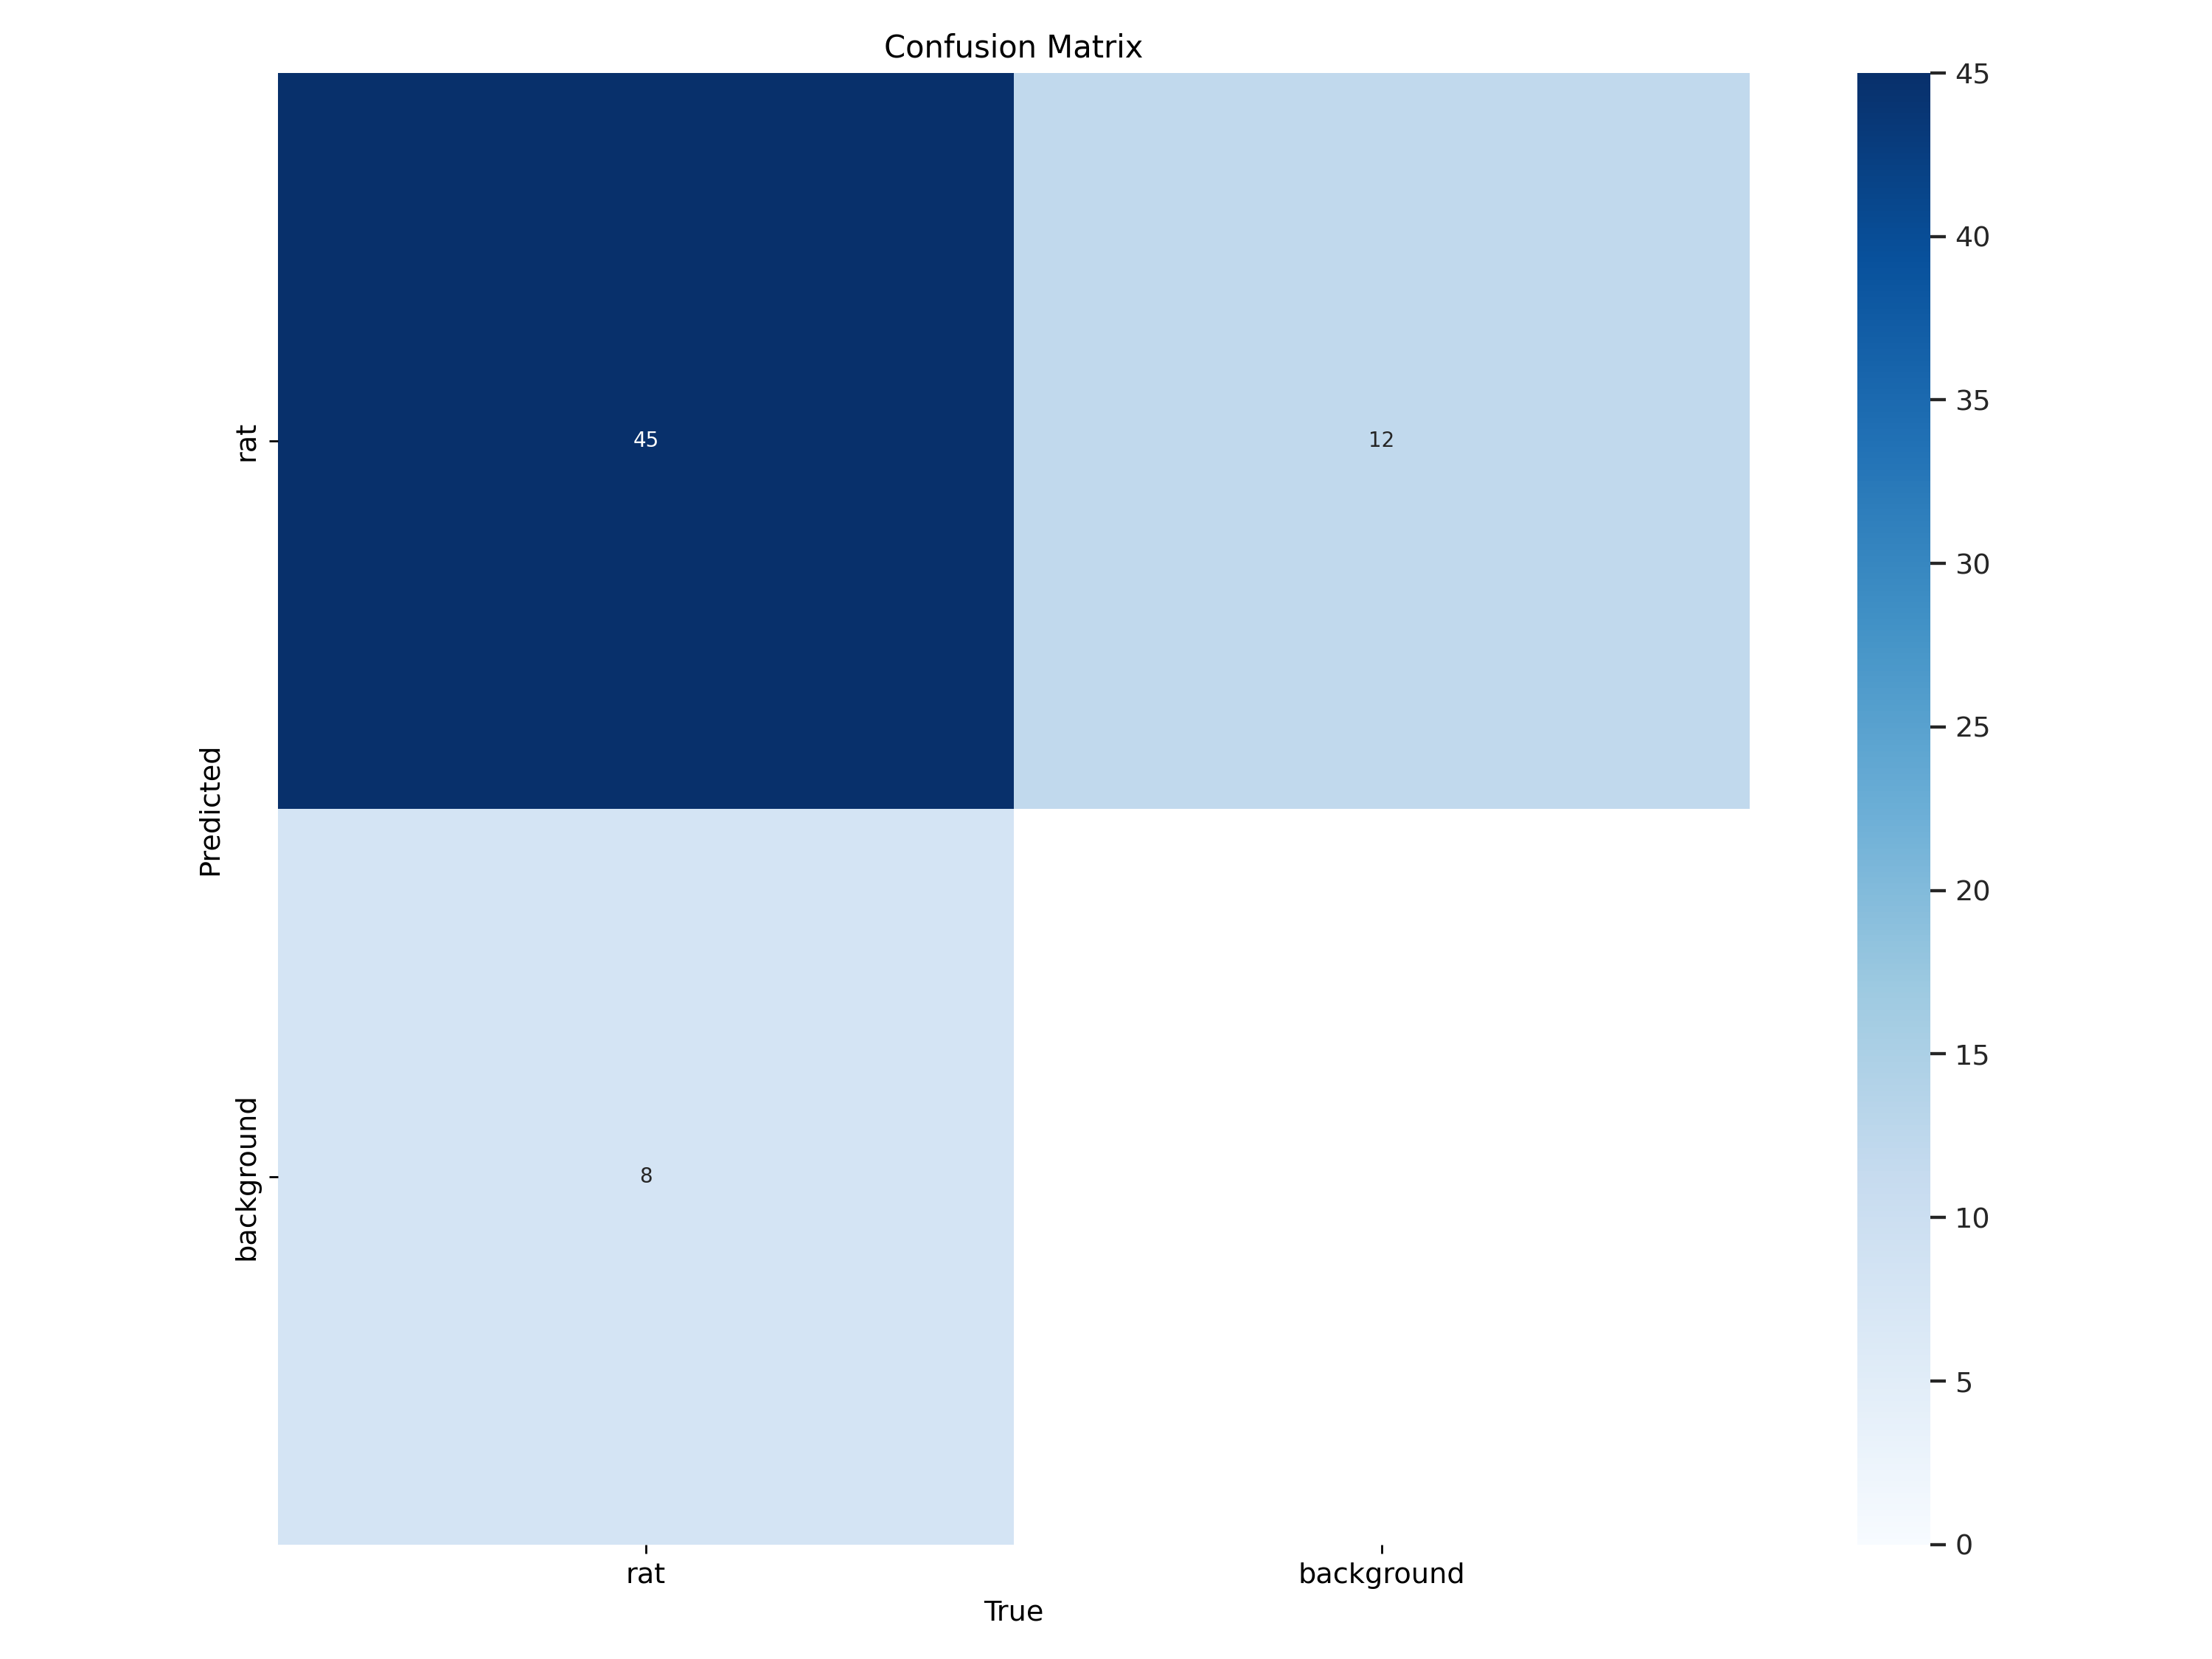

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{modelName}/confusion_matrix.png', width=600)

/content


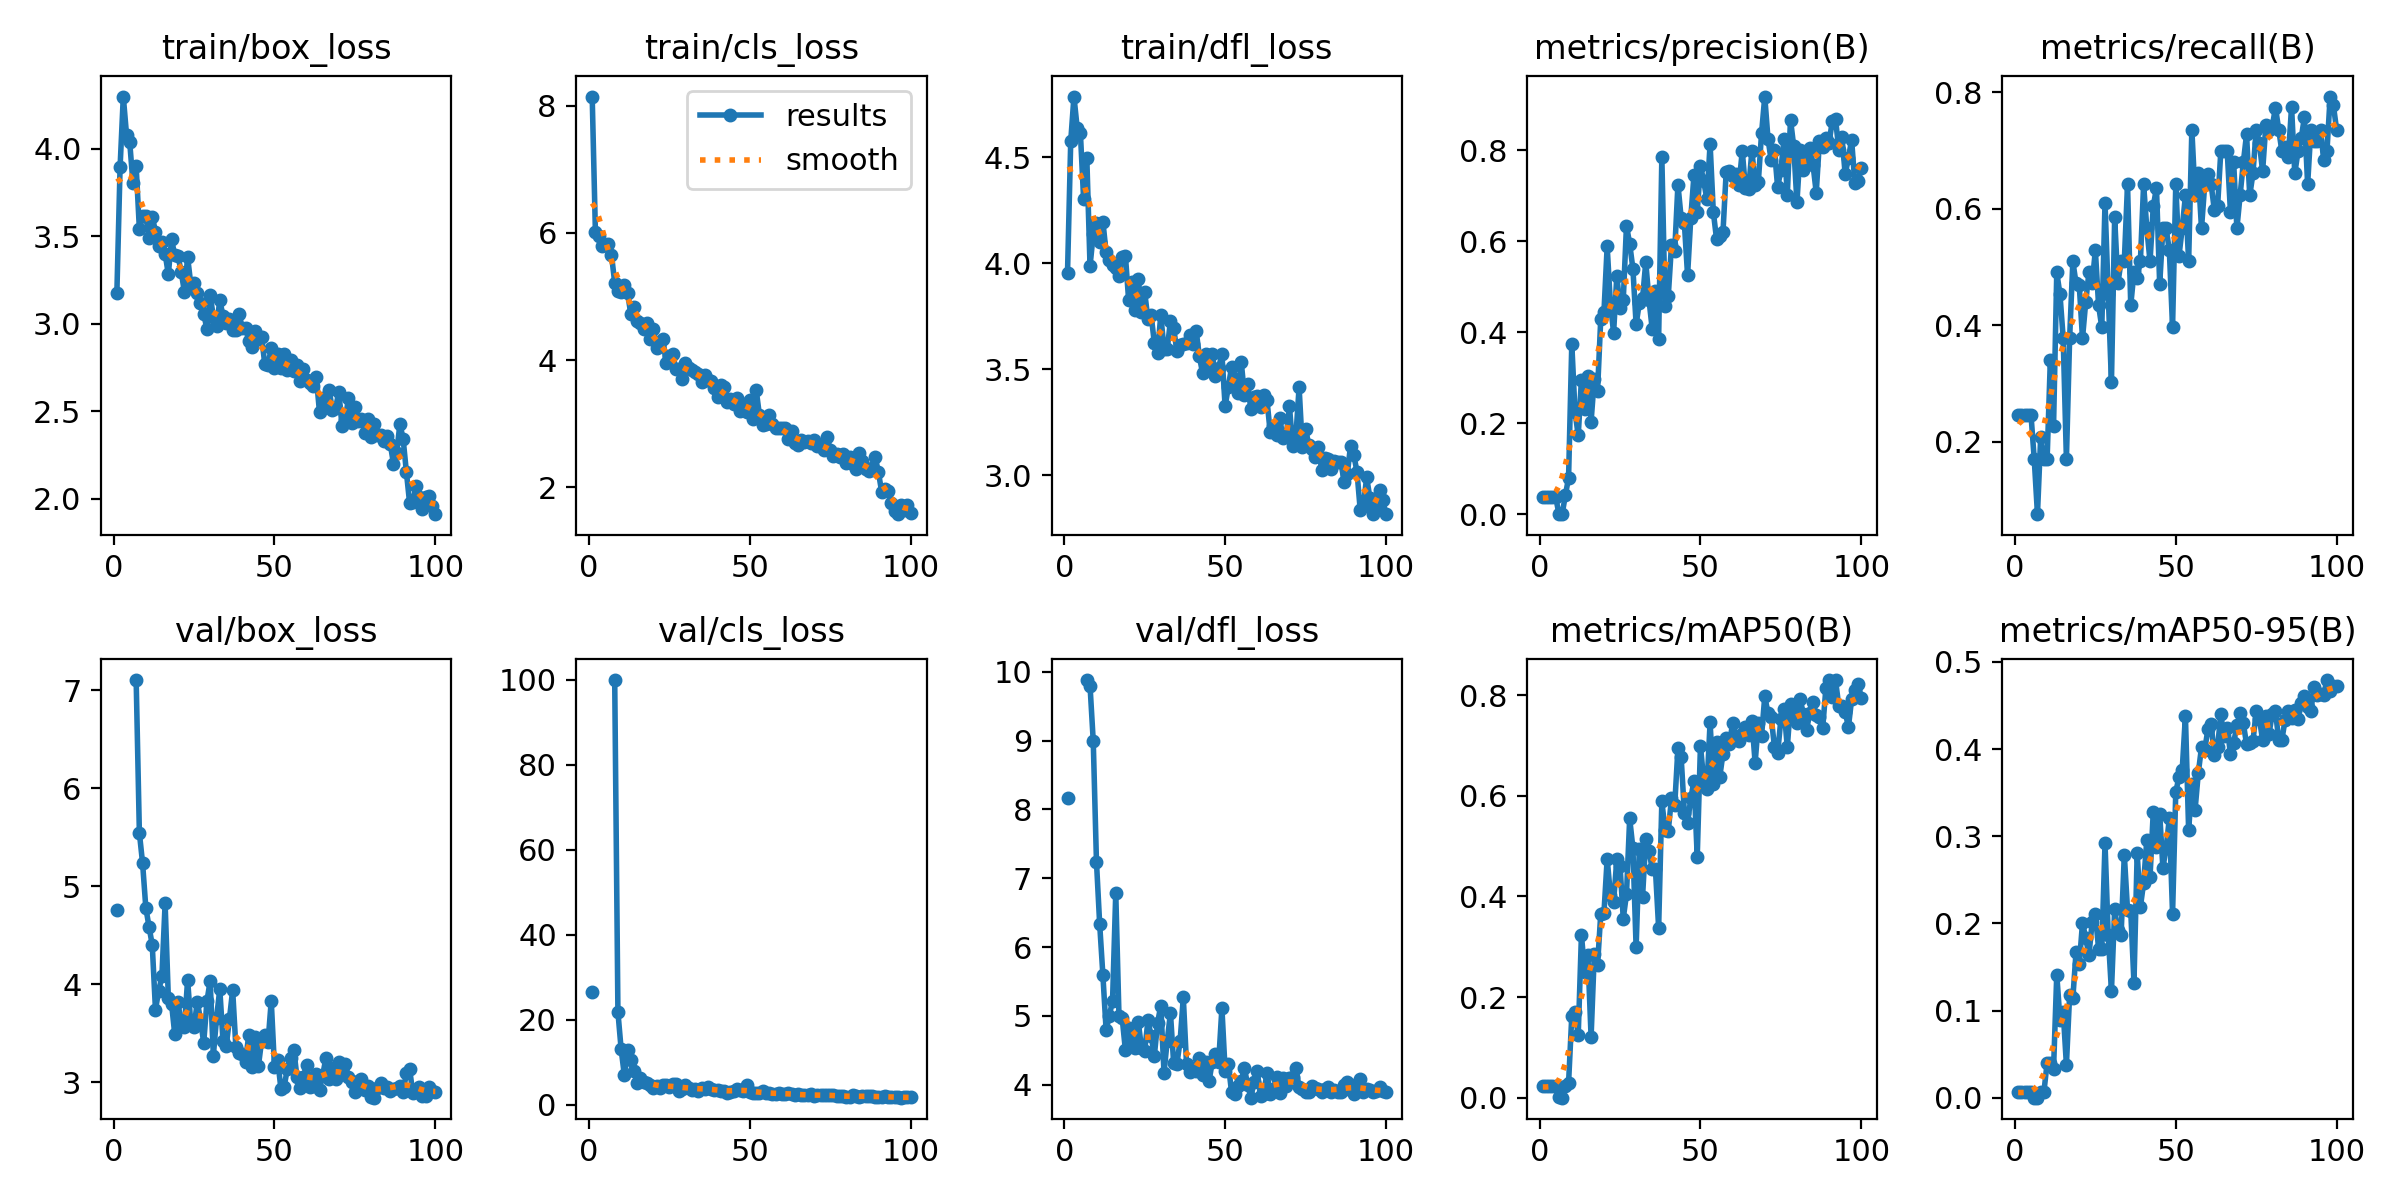

In [31]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{modelName}/results.png', width=600)

### Conclusions


- The medium version of YOLO doesnt show a significant improvement over the Nano version.
- Good Results: The model is learning well, as training and validation losses are decreasing, and precision, recall, and mAP are steadily improving.
- No Significant Overfitting: Training and validation losses follow a similar downward trend, meaning the model generalizes well.
- The model is still improving as training loss decreases and precision, recall, and mAP continue to rise, but validation loss is stabilizing. Increasing the epochs could help given the model has not fully converged yet but is getting close.
- We will try a more advanced model with a higher number of epochs.

In [ ]:
model.val(data="dataset/data.yaml", split="test")

## YOLOv11 Nano - Epochs = 200

In [36]:
!pip install -U ultralytics

In [40]:
%cd {HOME}

# Load a model
model = YOLO("yolo11n.pt")
modelName="yolov11_nano_200"

# Train the model
results = model.train(data=f"{dataset.location}/data.yaml", epochs=200, imgsz=640, project="runs/detect", name=modelName)


/content
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/ratsDetectionV3-3/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=yolov11_nano_200, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

train: Scanning /content/datasets/ratsDetectionV3-3/train/labels.cache... 353 images, 6 backgrounds, 0 corrupt: 100%|██████████| 353/353 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/ratsDetectionV3-3/valid/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov11_nano_200/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov11_nano_200
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.78G      1.447      2.783      1.682          5        640: 100%|██████████| 23/23 [00:08<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         45         53    0.00363      0.925      0.136     0.0557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.67G      1.606      2.554      1.842          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         45         53      0.498      0.226      0.306      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.64G      1.657      2.324      1.876          2        640: 100%|██████████| 23/23 [00:07<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         45         53      0.061     0.0566     0.0568     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.68G      1.754      2.293      1.929          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         45         53      0.164      0.321      0.139     0.0389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.65G      1.754      2.294      1.971          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         45         53     0.0391     0.0943     0.0234    0.00625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.65G      1.727      2.577      1.906          0        640: 100%|██████████| 23/23 [00:06<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         45         53      0.142      0.189     0.0918     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.66G      1.796      2.276          2          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         45         53      0.192      0.358      0.143     0.0494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.65G        1.6        2.5      1.833          0        640: 100%|██████████| 23/23 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         45         53       0.37      0.396       0.25     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.67G      1.668       2.07      1.881          9        640: 100%|██████████| 23/23 [00:06<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         45         53      0.144      0.358      0.111     0.0262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.65G      1.651       1.99      1.886          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         45         53      0.387      0.528      0.355      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.67G      1.645      2.045      1.865          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         45         53      0.332      0.434       0.29       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.67G      1.641      1.953      1.865          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         45         53      0.576      0.509      0.518      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.65G      1.603      1.837      1.804          5        640: 100%|██████████| 23/23 [00:07<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         45         53      0.329      0.509      0.313       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.68G      1.631      1.932      1.852          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.54it/s]

                   all         45         53      0.569      0.604      0.518      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.67G      1.668      1.892      1.858          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         45         53      0.354      0.528      0.408      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.67G      1.628      1.918      1.844          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         45         53      0.472      0.585      0.525      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.65G      1.573      1.736      1.812          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all         45         53      0.661      0.442      0.552      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.71G      1.613      1.805      1.831          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         45         53      0.384      0.434      0.318      0.098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.64G      1.611       1.76      1.826          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         45         53      0.524      0.686       0.57       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.68G      1.571      1.751      1.753          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         45         53      0.656      0.509      0.563      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.65G      1.542      1.621       1.77          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         45         53      0.581      0.717      0.705      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.67G       1.53      1.648      1.755          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         45         53      0.733      0.528      0.611      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.67G      1.541      1.662      1.766          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         45         53      0.771      0.585      0.709      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.68G      1.512      1.567      1.751          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         45         53      0.764      0.698      0.684      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.65G      1.528      1.518      1.735          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         45         53      0.517      0.472      0.476      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.68G      1.486      1.521      1.687          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         45         53      0.586      0.604      0.617      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.64G      1.465      1.525      1.732          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         45         53      0.676      0.698       0.72      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.65G       1.41      1.491      1.654          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         45         53      0.742      0.736      0.745      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.67G      1.445      1.612      1.683          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         45         53      0.838      0.682      0.832      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.65G      1.493      1.534      1.723          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         45         53       0.78      0.669      0.732      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.64G      1.404      1.481      1.635          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         45         53      0.686      0.658      0.678      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.68G      1.418      1.512      1.643          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         45         53      0.625      0.585      0.606      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.67G      1.527      1.526      1.729          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         45         53      0.735      0.755      0.765      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.65G      1.399      1.528       1.67          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         45         53      0.595      0.491      0.491      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.67G      1.424      1.515      1.667          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         45         53      0.787      0.698       0.77      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.65G      1.419      1.445       1.67          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         45         53      0.664      0.755      0.789      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.65G      1.349       1.39      1.603          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         45         53      0.654      0.717      0.715      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.68G      1.382      1.378      1.631          6        640: 100%|██████████| 23/23 [00:07<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         45         53      0.751      0.566      0.657      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.64G      1.445       1.43      1.697          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         45         53       0.71       0.74      0.737      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.67G      1.314      1.352      1.585          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         45         53      0.714      0.801      0.753      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.65G      1.371      1.436      1.647          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         45         53      0.741      0.717      0.809      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.67G      1.404      1.439      1.657         12        640: 100%|██████████| 23/23 [00:06<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         45         53      0.632      0.649      0.678      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.65G       1.33       1.33      1.583         14        640: 100%|██████████| 23/23 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         45         53      0.638       0.66      0.652      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.67G      1.355      1.328      1.609          5        640: 100%|██████████| 23/23 [00:07<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.74it/s]

                   all         45         53      0.695      0.558      0.589      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.65G      1.377      1.374      1.614          7        640: 100%|██████████| 23/23 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         45         53      0.506      0.619      0.484      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.67G       1.39      1.362       1.62          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         45         53      0.548      0.664       0.57      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.66G      1.341      1.309      1.607          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         45         53      0.597      0.642      0.622      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.67G      1.347      1.414      1.663          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]

                   all         45         53      0.821      0.694      0.811      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.68G      1.252      1.263      1.572          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         45         53      0.808      0.679      0.775      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.65G      1.282      1.495      1.514          0        640: 100%|██████████| 23/23 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         45         53      0.779      0.717      0.801      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.67G      1.359      1.217       1.61          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         45         53      0.738      0.639       0.66      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.67G      1.321      1.585      1.641          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         45         53      0.647      0.774      0.746      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.68G      1.287      1.252      1.556          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         45         53      0.811       0.66      0.727      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.68G      1.265      1.186      1.523          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         45         53      0.862      0.679      0.865      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.64G      1.353      1.232      1.705          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         45         53      0.843      0.812      0.909      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.68G      1.294       1.22       1.55          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         45         53      0.789      0.704      0.797      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.65G      1.318      1.194      1.557          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         45         53      0.699      0.792      0.801      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.67G      1.248        1.2      1.525          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         45         53      0.762      0.725      0.773      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.64G      1.286      1.207       1.55          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         45         53      0.761      0.782      0.801      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.65G      1.261      1.207      1.548          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         45         53      0.749      0.849      0.832      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.65G      1.258      1.197      1.556          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         45         53      0.721      0.774       0.77      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.68G      1.225      1.209       1.53          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         45         53      0.828      0.623      0.789      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.64G      1.217      1.141      1.491          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         45         53      0.756      0.643      0.724      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.67G      1.198      1.079      1.474          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]

                   all         45         53      0.829      0.755      0.807      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.67G      1.232      1.222      1.484          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         45         53      0.706      0.792       0.77      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.68G      1.198      1.101       1.47          5        640: 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         45         53      0.876      0.802      0.845      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.66G      1.257      1.096      1.546          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         45         53      0.843       0.66      0.739      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.67G      1.187      1.144      1.467          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all         45         53      0.723      0.604      0.685      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.65G      1.229      1.139      1.484          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         45         53      0.948      0.694      0.815      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.65G      1.177      1.098      1.468          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         45         53      0.834      0.755      0.813      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.64G      1.119      1.058      1.436          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         45         53      0.757      0.679      0.723      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.67G      1.158      1.056      1.456          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         45         53      0.835      0.764        0.8      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.65G      1.224      1.106      1.569          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all         45         53      0.697      0.679      0.701      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.65G      1.187      1.204      1.477          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         45         53      0.803      0.769      0.834      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.64G      1.195      1.077      1.484          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         45         53      0.768      0.736      0.763      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.68G      1.186      1.047      1.473          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         45         53      0.768      0.736       0.74      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.65G      1.129      1.007      1.427          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         45         53      0.802      0.792      0.805      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.65G      1.129      1.072      1.443          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         45         53      0.653      0.781      0.771      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.64G      1.152      1.076      1.447          5        640: 100%|██████████| 23/23 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         45         53      0.742      0.815      0.819      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.65G      1.149      1.068      1.423         11        640: 100%|██████████| 23/23 [00:06<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         45         53      0.823       0.66      0.765      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.65G      1.171      1.041      1.452          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         45         53      0.695      0.775       0.76      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.65G      1.148     0.9861      1.434          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         45         53       0.75      0.642      0.699        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.64G       1.12      0.973      1.402          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         45         53       0.72      0.849      0.823       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.68G      1.106      1.029      1.433          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all         45         53      0.767      0.774      0.839      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.65G      1.138       1.05      1.427          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         45         53      0.845      0.722      0.811      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.67G      1.123      1.009      1.453          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         45         53      0.867      0.741      0.844      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.63G      1.052     0.9661      1.385          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         45         53      0.844      0.612      0.767      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.65G      1.122      1.004      1.419          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         45         53       0.92       0.83      0.891      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.67G      1.106      1.049      1.397          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         45         53      0.864      0.838      0.889      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.65G      1.152      1.064      1.457          6        640: 100%|██████████| 23/23 [00:07<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         45         53      0.842      0.802      0.888      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.64G      1.106     0.9412      1.378          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         45         53      0.779      0.774      0.797      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.68G        1.1     0.9817      1.395          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         45         53       0.83      0.792      0.852       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.65G      1.144     0.9869      1.477          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         45         53      0.841      0.697      0.808      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.65G      1.144     0.9804      1.404          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         45         53      0.778      0.792      0.812      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.64G      1.074     0.9604      1.408          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         45         53      0.793      0.792      0.857       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.67G        1.1     0.9333        1.4          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         45         53      0.806      0.782      0.838      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.67G      1.079     0.9374      1.388          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         45         53      0.766      0.755      0.786      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.67G      1.117      0.958      1.399          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         45         53      0.835      0.763      0.795      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.64G      1.055     0.9272      1.368          8        640: 100%|██████████| 23/23 [00:06<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         45         53      0.781      0.674      0.758      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.68G      1.101     0.9225      1.416          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         45         53      0.829      0.821      0.819      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.63G      1.049     0.8629      1.369          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         45         53       0.83      0.736      0.777      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.65G       1.11     0.9322      1.419          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         45         53      0.773      0.771      0.745      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.67G      1.129      1.082      1.457          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         45         53      0.781      0.792      0.801      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.68G     0.9833     0.8512      1.329          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all         45         53       0.77      0.823      0.819      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.68G       1.04     0.8651      1.339          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         45         53      0.802      0.843      0.844      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.63G       1.07     0.9629      1.374          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]

                   all         45         53       0.86      0.808      0.823      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.66G      1.048     0.8965       1.37          3        640: 100%|██████████| 23/23 [00:08<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         45         53      0.823       0.79      0.824      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200       2.7G      1.129     0.9541      1.425          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         45         53      0.843      0.712      0.767      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.67G      1.007     0.8692      1.338          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]


                   all         45         53      0.902      0.695      0.816      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.65G      1.022     0.9044      1.364          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         45         53      0.857      0.736      0.836      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.67G      1.131     0.9761       1.39          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         45         53      0.895      0.808      0.877      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.68G     0.9981     0.8377      1.335          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all         45         53      0.855      0.755      0.796      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.65G     0.9929      0.882      1.339          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         45         53      0.737      0.849      0.803      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.68G     0.9986     0.8246      1.349          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         45         53      0.814      0.792      0.836      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.67G      1.055      0.875      1.346          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         45         53      0.856      0.783      0.785      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.65G       1.04     0.9024      1.327          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]


                   all         45         53      0.774      0.849      0.788      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.65G      1.006     0.8617      1.344          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         45         53      0.804      0.853      0.866      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.68G      0.968     0.8079      1.319          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         45         53      0.891      0.774      0.883      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.67G      1.032     0.8988      1.375          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         45         53      0.863      0.712      0.815      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.68G       1.04     0.8491      1.351          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         45         53       0.94      0.881      0.926      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.68G       1.03     0.8219      1.358          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         45         53      0.845      0.825      0.851      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.65G      1.055     0.8572      1.427          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         45         53      0.822      0.869      0.893      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.64G       0.95     0.8158      1.315          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         45         53      0.829       0.83      0.882      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.68G     0.9972       0.81      1.312          4        640: 100%|██████████| 23/23 [00:08<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         45         53      0.879      0.824      0.872      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.67G      1.081     0.8221      1.476          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         45         53      0.798      0.774      0.826       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.65G      1.047     0.8659      1.385          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         45         53      0.865      0.755      0.853      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.67G      1.114     0.8617      1.509          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         45         53        0.9      0.849      0.907      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.67G     0.9251     0.7512      1.288          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         45         53      0.795       0.83      0.821      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.65G      1.026     0.7896      1.399          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         45         53      0.867      0.792      0.853      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.65G      1.084      1.017      1.395          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         45         53      0.873      0.777      0.867      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.67G     0.9779      0.801      1.317          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         45         53      0.687       0.83      0.824      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.65G     0.9673     0.8144      1.345          2        640: 100%|██████████| 23/23 [00:08<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         45         53      0.871      0.774      0.826      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.67G     0.9444     0.8201      1.304          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         45         53      0.904       0.83      0.862      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.65G      1.017     0.8094      1.349          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         45         53      0.784      0.868      0.844      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.64G     0.9136     0.7321       1.27          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         45         53      0.832      0.755      0.824      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.67G     0.9558     0.7519      1.245          7        640: 100%|██████████| 23/23 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         45         53      0.787      0.835      0.826      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.65G      0.921     0.7475      1.286          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         45         53      0.814      0.825      0.842      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.65G     0.8996     0.8408      1.247          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         45         53      0.951       0.83      0.903      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.66G      1.009     0.8043      1.321          3        640: 100%|██████████| 23/23 [00:06<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all         45         53      0.832       0.83      0.847       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.67G     0.9623     0.7841      1.286          6        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         45         53      0.893      0.791      0.859      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.68G     0.9136     0.7497      1.285          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         45         53      0.827      0.906      0.921      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.67G     0.9161     0.7212      1.267          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         45         53      0.788      0.811      0.816      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.67G     0.9631     0.7999      1.306          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         45         53      0.871      0.792      0.873      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.68G     0.8775     0.7138      1.252          3        640: 100%|██████████| 23/23 [00:08<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         45         53      0.775      0.736      0.784       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.67G     0.9218     0.7301      1.254          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         45         53      0.911      0.811      0.844      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.65G     0.8695     0.7156       1.22          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         45         53      0.821      0.781      0.846      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.64G     0.9033     0.7268      1.243          6        640: 100%|██████████| 23/23 [00:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         45         53      0.769      0.878       0.83      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.67G       0.95     0.7083       1.29          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         45         53      0.926      0.706      0.816      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.63G      0.895     0.7113       1.26          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         45         53      0.911      0.769      0.862      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.65G     0.9091     0.7518      1.266          7        640: 100%|██████████| 23/23 [00:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         45         53       0.81      0.811      0.842      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.64G     0.8668      0.721      1.223          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         45         53       0.94      0.755      0.848      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.65G     0.9139     0.7955      1.284          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all         45         53      0.889      0.755      0.815      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.65G     0.8074      0.666      1.185          5        640: 100%|██████████| 23/23 [00:07<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         45         53      0.898      0.755      0.808      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.67G     0.8927     0.6931      1.266          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         45         53      0.908      0.774      0.805      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.67G     0.8724     0.7334      1.233          7        640: 100%|██████████| 23/23 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         45         53      0.894      0.811      0.838      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.63G     0.8715     0.7064      1.225          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         45         53      0.847      0.832       0.82      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.65G     0.8682     0.7104      1.222          6        640: 100%|██████████| 23/23 [00:05<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         45         53      0.803       0.83      0.828      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.68G     0.8238     0.6705      1.195          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         45         53      0.913      0.811      0.871      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.67G     0.8754     0.7706      1.243          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         45         53      0.924      0.792      0.861      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.67G     0.8542      0.717      1.248          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         45         53      0.821      0.863      0.853      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.63G     0.8167       0.64      1.177          4        640: 100%|██████████| 23/23 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         45         53      0.818      0.906       0.87      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.65G     0.8497     0.6844      1.228          6        640: 100%|██████████| 23/23 [00:06<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all         45         53      0.877      0.792      0.856      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.67G     0.9245     0.8873      1.327          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         45         53      0.932      0.771      0.839      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.67G     0.8402     0.6772      1.255          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         45         53      0.932      0.772      0.818      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.65G     0.8111     0.6534      1.212          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         45         53      0.846      0.755      0.797      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.67G     0.8464     0.6781      1.217          7        640: 100%|██████████| 23/23 [00:06<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         45         53      0.871      0.774      0.808      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.66G     0.8416     0.6621      1.224          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         45         53      0.868      0.747      0.827      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.67G     0.9163     0.9875      1.295          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         45         53      0.926      0.736      0.837      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.63G     0.8411     0.7121      1.243          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         45         53      0.878      0.816      0.864      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.67G     0.8532     0.6998      1.257          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         45         53      0.931      0.768      0.862      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.64G     0.8591     0.6877      1.229          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]


                   all         45         53       0.94      0.881        0.9      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.65G     0.8322     0.6467      1.202          7        640: 100%|██████████| 23/23 [00:07<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         45         53      0.841      0.868      0.852       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.65G     0.8263     0.6572      1.192          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         45         53      0.872      0.811      0.831       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.65G     0.7613     0.6309       1.17          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         45         53      0.907      0.734      0.819      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.66G     0.8805     0.7579      1.241          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         45         53      0.907      0.732      0.801      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.67G      0.782     0.6062      1.168          3        640: 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         45         53      0.889      0.792       0.81      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200       2.7G     0.8402     0.7136      1.198          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]

                   all         45         53      0.911      0.772      0.795      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.65G     0.8024     0.6173      1.183          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         45         53      0.856      0.792      0.797      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.65G     0.8267     0.6712      1.204         12        640: 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         45         53      0.868      0.774      0.794      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.65G     0.7486     0.6002       1.17          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         45         53       0.92      0.792       0.83      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.67G     0.7646     0.6137      1.152          4        640: 100%|██████████| 23/23 [00:06<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         45         53      0.924      0.792      0.836       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.68G     0.7545     0.6146      1.159          3        640: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         45         53      0.911      0.768      0.824      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.63G     0.8216     0.6275      1.201          5        640: 100%|██████████| 23/23 [00:06<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         45         53      0.933      0.789      0.818      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.67G     0.7676     0.6194      1.191          2        640: 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all         45         53      0.923      0.774      0.825      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.65G     0.7937     0.6452      1.177         14        640: 100%|██████████| 23/23 [00:08<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         45         53      0.916      0.755       0.83      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.67G     0.7761     0.5711      1.179          2        640: 100%|██████████| 23/23 [00:06<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         45         53      0.893      0.791      0.807      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.67G     0.7331     0.6314      1.148          5        640: 100%|██████████| 23/23 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all         45         53      0.929      0.774      0.823      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.65G     0.8371     0.7423      1.216         11        640: 100%|██████████| 23/23 [00:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         45         53      0.883      0.774      0.826      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.67G       0.74     0.5883      1.143          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         45         53      0.879      0.822       0.85      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.63G      0.743     0.5967      1.168          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         45         53      0.865       0.83      0.836      0.538


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.69G     0.6354     0.5625      1.082          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         45         53      0.878      0.812      0.844      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.63G     0.7099     0.8228      1.137          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         45         53       0.82      0.849      0.827      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.67G     0.6872     0.5152      1.199          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         45         53      0.879      0.811      0.819      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.63G     0.6373     0.5238      1.082          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         45         53      0.866      0.811      0.822      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.67G     0.7053     0.4809      1.109          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         45         53      0.879      0.826      0.816      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.65G     0.6301     0.6894      1.072          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         45         53      0.875       0.83      0.816      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.63G     0.6485     0.4762      1.149          1        640: 100%|██████████| 23/23 [00:08<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         45         53      0.882      0.843      0.825      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.63G     0.6154     0.4439      1.058          1        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         45         53        0.9      0.848      0.829      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.66G     0.5794     0.4271      1.059          1        640: 100%|██████████| 23/23 [00:06<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         45         53        0.9      0.845      0.829       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.65G     0.5937     0.4081      1.064          1        640: 100%|██████████| 23/23 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         45         53       0.87      0.849      0.834       0.54



200 epochs completed in 0.466 hours.
Optimizer stripped from runs/detect/yolov11_nano_200/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolov11_nano_200/weights/best.pt, 5.5MB

Validating runs/detect/yolov11_nano_200/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]


                   all         45         53       0.94      0.881        0.9      0.568
Speed: 0.4ms preprocess, 4.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/yolov11_nano_200


/content


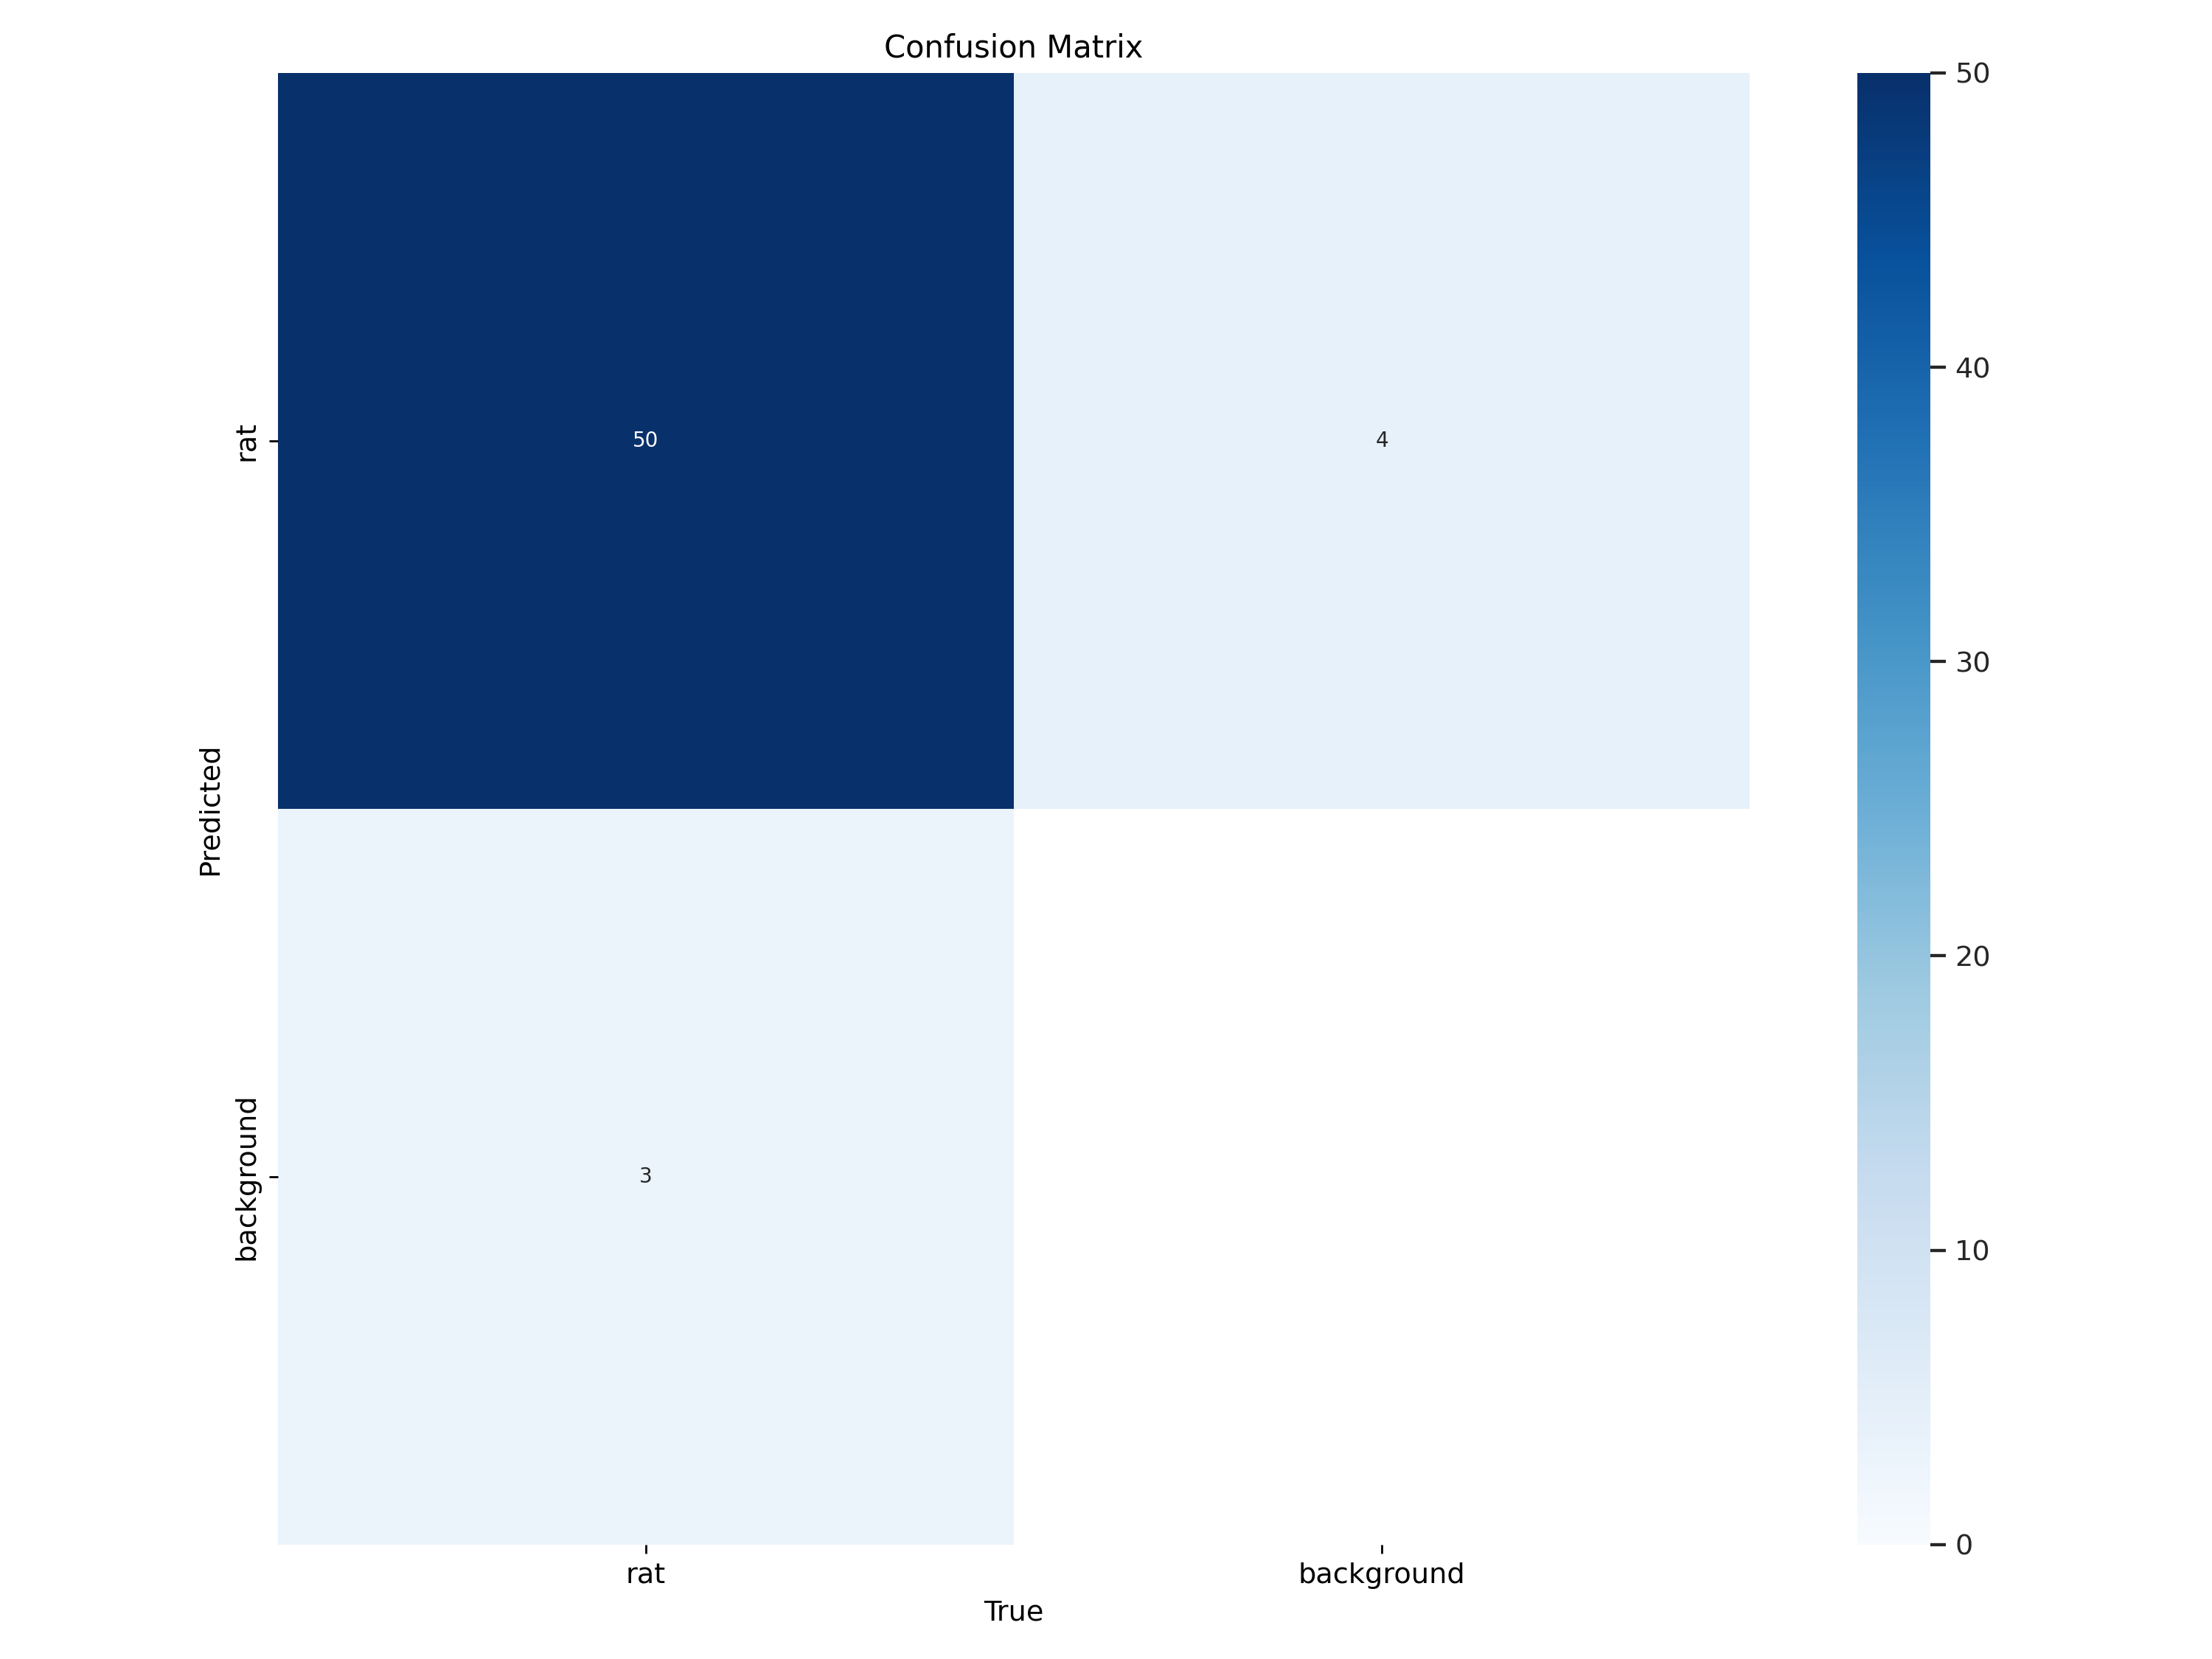

In [41]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{modelName}/confusion_matrix.png', width=600)

/content


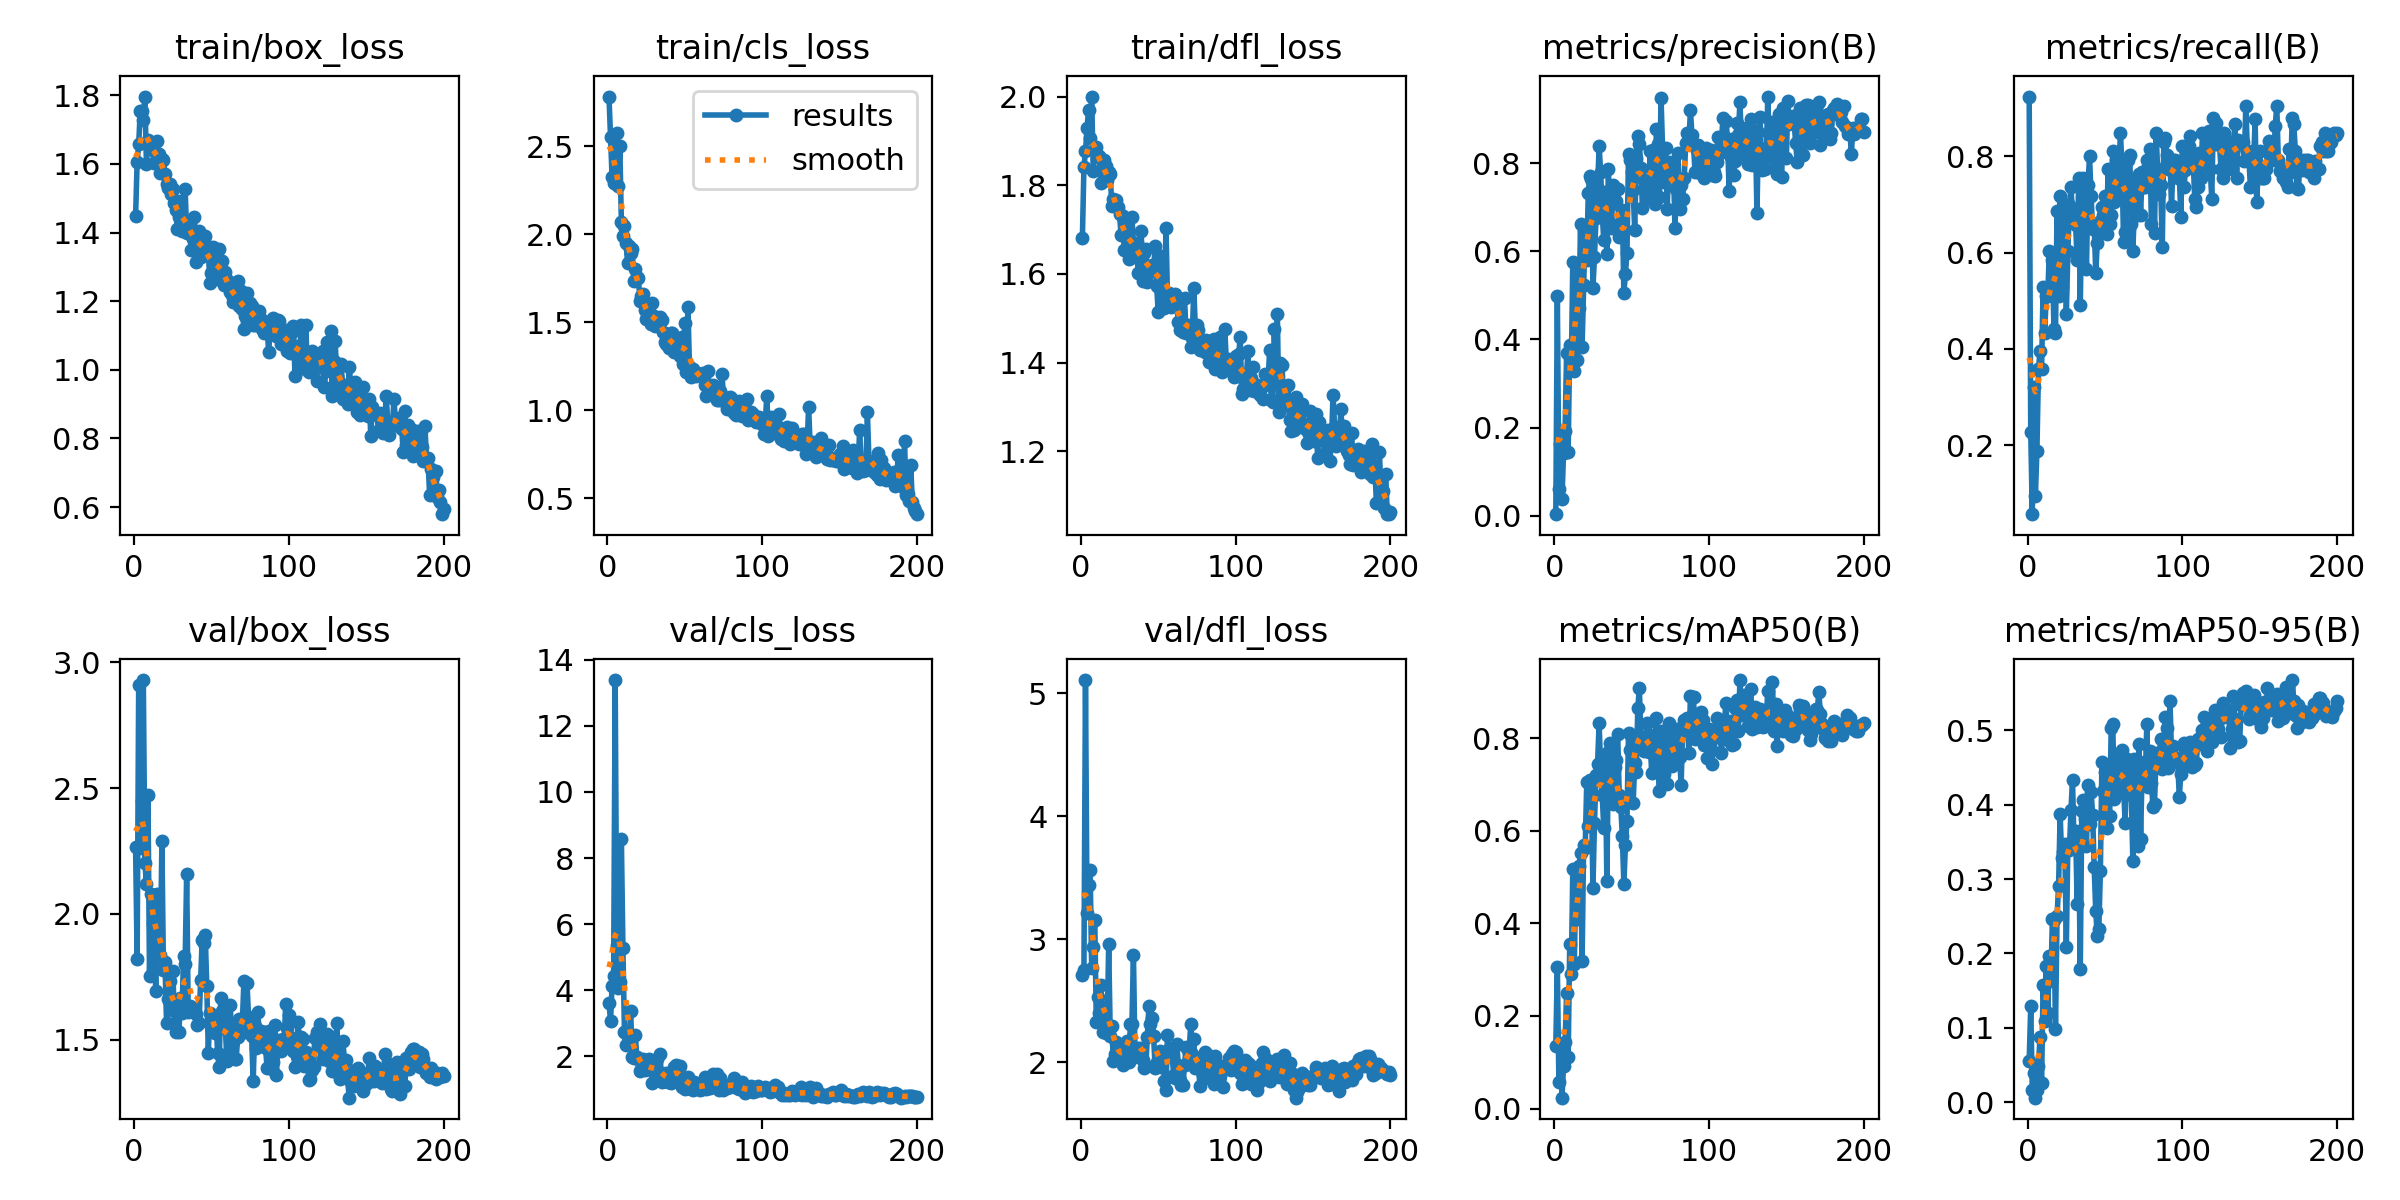

In [42]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/{modelName}/results.png', width=600)

### Conclusions

YOLOv10 Nano - epoch: 200
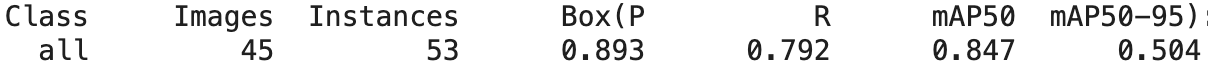

YOLOv11 Nano - epoch: 200

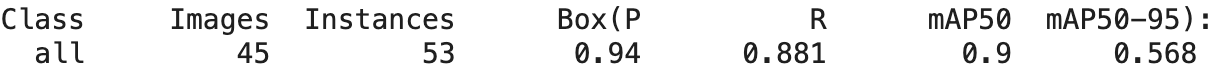


- With the same number of epochs (200) YOLOV11 improve the precision by 5% and the recall by 9% this is the best model found so far.
- No Significant Overfitting: Training and validation losses follow a similar downward trend, meaning the model generalizes well.
- We will try a more advanced models to try to improve the overall performance.

#Validate the best model on the test dataset

In [46]:
metrics = model.val(data=f"{dataset.location}/data.yaml", split="test")

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/datasets/ratsDetectionV3-3/test/labels.cache... 45 images, 0 backgrounds, 0 corrupt: 100%|██████████| 45/45 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


                   all         45         58      0.781      0.739      0.774      0.448
Speed: 5.3ms preprocess, 14.1ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/yolov11_nano_2004


YOLOv11 Nano - epoch: 200 Test set
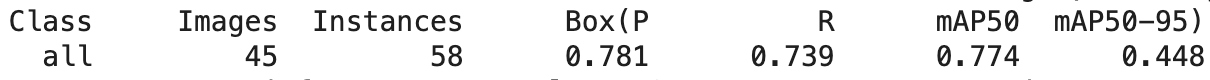

YOLOv11 Nano - epoch: 200 Validation set
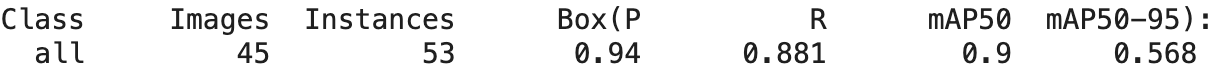

The model performs well on the validation set but struggles to maintain the same level of performance on the test set, indicating some overfitting.

#Final Takeaways

- GroundingDINO is a powerful tool for automatic annotation; however, manual review and adjustment of incorrect annotations are essential to prevent training and validation errors.
- Roboflow provides an intuitive interface for manual annotation and includes additional preprocessing features. While these capabilities were not utilized in this project, they could be valuable for future improvements.
- It was demonstrated that using more advanced models and increasing the number of epochs significantly enhances model performance.
- The Nano version is more lightweight and efficient for training. While training 100 epochs on the Medium model took 33 minutes, the Nano model completed 200 epochs in the same 33-minute timeframe.
- The best-performing model was YOLOv11-nano trained for 200 epochs. With a precision of 94% and a recall of 88%.
- The model performed well during training and validation but struggled on the test dataset, showing signs of overfitting. To improve generalization, techniques like regularization, data augmentation, or balancing the dataset could help.


33 min to train yolov-m with 100 epochs

33 min to train yolov-n with 200 epochs

28 min to train yolov-n with 200 epochs